<a href="https://www.kaggle.com/code/dataranch/house-price-model-comparison-feature-importance?scriptVersionId=106524262" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**House Price Model Comparison + Feature Importance 📊**</div>
- Preprocessing
    - Detect continuous and categorical variables.
    - Normalize and impute data.
    

- For every target variable in the dataset:
    - Compare performance on 27 models + a TabNet model.
    - Output model performance and processed data in CSV format for every dataset.
    - Save plots + CSVs of XGBoost Feature Importances.
    - Save best performing FastAI model.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.3 MB/s eta 0:00:00
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86

In [3]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 20.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tfx-bsl 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.

In [4]:
!pip install fast-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 943.6 kB/s eta 0:00:00


In [5]:
!pip install fastai

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,

In [6]:
#A program that takes a csv and trains models on it. Streamlined model selection.
#==============================================================================

#LazyPredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
#Baysian Optimization
from bayes_opt import BayesianOptimization
#Pandas stack
import pandas as pd
import numpy as np
#FastAI
from fastai.tabular.all import *
from fastai.tabular.core import *
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
#System
import os
import sys
import traceback
#Fit an xgboost model
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
#Random
import random

#TabNet
from fast_tabnet.core import *

import shutil

In [7]:
#Project Variables
#===================================================================================================
PROJECT_NAME = 'housepriceprediction-cleaned-dataset'
VARIABLE_FILES = False
#Maximum amount of rows to take
SAMPLE_COUNT = 2000
FASTAI_LEARNING_RATE = 1e-1
AUTO_ADJUST_LEARNING_RATE = False
#Set to True automatically infer if variables are categorical or continuous
ENABLE_BREAKPOINT = True
#When trying to declare a column a continuous variable, if it fails, convert it to a categorical variable
CONVERT_TO_CAT = False
REGRESSOR = True
SEP_DOLLAR = True
SEP_PERCENT = True
SHUFFLE_DATA = True

In [8]:
input_dir = f'../input/{PROJECT_NAME}'
param_dir = f'/kaggle/working/{PROJECT_NAME}'
TARGET = ''
PARAM_DIR = param_dir
print(f'param_dir: {param_dir}')
if not os.path.exists(param_dir):
    os.makedirs(param_dir)
#rename any file in param_dir/file that ends with csv to data.csv
for file in os.listdir(input_dir):
    if file.endswith('.csv'):
        print('CSV!')
        if 'classification_results' not in file and 'regression_results' not in file:
            #os.rename(f'{input_dir}/{file}', f'{param_dir}/data.csv')
            shutil.copy(f'{input_dir}/{file}', f'{param_dir}/data.csv')
        #os.rename(f'{param_dir}/{file}', f'{param_dir}/data.csv')
try:
    df = pd.read_csv(f'{param_dir}/data.csv', nrows=SAMPLE_COUNT)
except:
    print(f'Please place a file named data.csv in {param_dir}')
    #sys.exit()

param_dir: /kaggle/working/housepriceprediction-cleaned-dataset
CSV!


In [9]:
df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [10]:
df.isna().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

<AxesSubplot:>

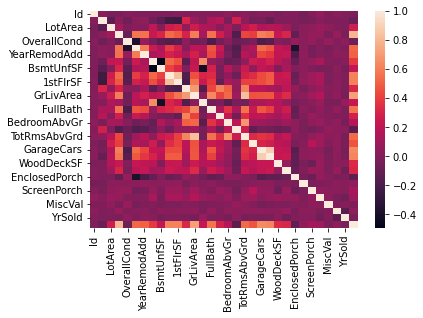

In [11]:
sns.heatmap(df.corr())

In [12]:
df.head().style.background_gradient(cmap = "inferno")

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,856,854,1710,1,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,1262,0,1262,0,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,920,866,1786,1,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,961,756,1717,1,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,1145,1053,2198,1,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [13]:
df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
Id,1460.00,730.50,421.61,1.00,365.75,730.50,1095.25,1460.00
MSSubClass,1460.00,56.90,42.30,20.00,20.00,50.00,70.00,190.00
LotArea,1460.00,10516.83,9981.26,1300.00,7553.50,9478.50,11601.50,215245.00
OverallQual,1460.00,6.10,1.38,1.00,5.00,6.00,7.00,10.00
OverallCond,1460.00,5.58,1.11,1.00,5.00,5.00,6.00,9.00
YearBuilt,1460.00,1971.27,30.20,1872.00,1954.00,1973.00,2000.00,2010.00
YearRemodAdd,1460.00,1984.87,20.65,1950.00,1967.00,1994.00,2004.00,2010.00
BsmtFinSF1,1460.00,443.64,456.10,0.00,0.00,383.50,712.25,5644.00
BsmtUnfSF,1460.00,567.24,441.87,0.00,223.00,477.50,808.00,2336.00
TotalBsmtSF,1460.00,1057.43,438.71,0.00,795.75,991.50,1298.25,6110.00


In [14]:
#remove 'Time' as it's a leaky feature
del(df['Id'])

Target Variable: SalePrice
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']
30
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch

  5%|▍         | 2/42 [00:00<00:06,  5.84it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7894502977954239, 'Adjusted R-Squared': 0.7652491825994956, 'RMSE': 41944.73833741701, 'Time taken': 0.22672748565673828}
{'Model': 'BaggingRegressor', 'R-Squared': 0.8380725941322038, 'Adjusted R-Squared': 0.8194602486301583, 'RMSE': 36784.11849414502, 'Time taken': 0.13024544715881348}
{'Model': 'BayesianRidge', 'R-Squared': 0.7526622191968677, 'Adjusted R-Squared': 0.7242325892194962, 'RMSE': 45461.67193660426, 'Time taken': 0.022650480270385742}


 12%|█▏        | 5/42 [00:00<00:02, 13.73it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.7512398792444623, 'Adjusted R-Squared': 0.7226467619162396, 'RMSE': 45592.200433327846, 'Time taken': 0.054381370544433594}
{'Model': 'DummyRegressor', 'R-Squared': -0.016058814735062876, 'Adjusted R-Squared': -0.1328471842448402, 'RMSE': 92142.414, 'Time taken': 0.02248382568359375}
{'Model': 'ElasticNet', 'R-Squared': 0.7283754120055823, 'Adjusted R-Squared': 0.6971541949947297, 'RMSE': 47641.42, 'Time taken': 0.025920629501342773}


 17%|█▋        | 7/42 [00:00<00:03, 11.49it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.10436460745992071, 'Adjusted R-Squared': 0.0014180106162333672, 'RMSE': 86509.9, 'Time taken': 0.18727850914001465}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.6909497631732484, 'Adjusted R-Squared': 0.6554267474460356, 'RMSE': 50817.66595414824, 'Time taken': 0.03626871109008789}


 21%|██▏       | 9/42 [00:01<00:06,  4.88it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8237654670990602, 'Adjusted R-Squared': 0.8035086242368832, 'RMSE': 38374.76064234422, 'Time taken': 0.7786123752593994}
{'Model': 'GammaRegressor', 'R-Squared': 0.7277630295938486, 'Adjusted R-Squared': 0.6964714238000381, 'RMSE': 47695.09578123014, 'Time taken': 0.026845932006835938}


 26%|██▌       | 11/42 [00:01<00:05,  5.19it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -3.0734055704172096, 'Adjusted R-Squared': -3.541613107246774, 'RMSE': 184492.6207880301, 'Time taken': 0.30971360206604004}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7047502160423182, 'Adjusted R-Squared': 0.6708134592655732, 'RMSE': 49670.09241038932, 'Time taken': 0.038602352142333984}


 31%|███       | 13/42 [00:02<00:06,  4.56it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8439778942293927, 'Adjusted R-Squared': 0.8260443188534609, 'RMSE': 36107.15258867477, 'Time taken': 0.5073175430297852}


 33%|███▎      | 14/42 [00:03<00:08,  3.21it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.8077808648362866, 'Adjusted R-Squared': 0.7856867113691931, 'RMSE': 40077.30255627587, 'Time taken': 0.7024743556976318}


 38%|███▊      | 16/42 [00:03<00:06,  3.92it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.7468209255702046, 'Adjusted R-Squared': 0.717719882532297, 'RMSE': 45995.365855413926, 'Time taken': 0.24288201332092285}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7671249995010708, 'Adjusted R-Squared': 0.7403577580644123, 'RMSE': 44112.492, 'Time taken': 0.1134183406829834}
{'Model': 'KernelRidge', 'R-Squared': -3.095876746721432, 'Adjusted R-Squared': -3.5666671773790677, 'RMSE': 185000.8, 'Time taken': 0.049735307693481445}
{'Model': 'Lars', 'R-Squared': 0.7525053206512955, 'Adjusted R-Squared': 0.724057656358341, 'RMSE': 45476.08894026385, 'Time taken': 0.027590513229370117}


 48%|████▊     | 20/42 [00:03<00:03,  6.54it/s]

{'Model': 'LarsCV', 'R-Squared': 0.7325253430514687, 'Adjusted R-Squared': 0.7017811296091088, 'RMSE': 47276.0837501508, 'Time taken': 0.13611984252929688}
{'Model': 'Lasso', 'R-Squared': 0.7525328905974267, 'Adjusted R-Squared': 0.7240883952637975, 'RMSE': 45473.555, 'Time taken': 0.10176753997802734}


 50%|█████     | 21/42 [00:04<00:03,  5.60it/s]

{'Model': 'LassoCV', 'R-Squared': 0.7517098237648733, 'Adjusted R-Squared': 0.7231707230481921, 'RMSE': 45549.113, 'Time taken': 0.2632763385772705}
{'Model': 'LassoLars', 'R-Squared': 0.7522394281443877, 'Adjusted R-Squared': 0.7237612014943173, 'RMSE': 45500.51068827105, 'Time taken': 0.06875872611999512}


 60%|█████▉    | 25/42 [00:04<00:02,  7.57it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.7517733722647607, 'Adjusted R-Squared': 0.7232415759733539, 'RMSE': 45543.28548761319, 'Time taken': 0.2447648048400879}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7437943908582754, 'Adjusted R-Squared': 0.7143454702672725, 'RMSE': 46269.46634454433, 'Time taken': 0.06325721740722656}
{'Model': 'LinearRegression', 'R-Squared': 0.752505429322323, 'Adjusted R-Squared': 0.7240577775202912, 'RMSE': 45476.08, 'Time taken': 0.05442929267883301}
{'Model': 'LinearSVR', 'R-Squared': -4.2757946317604745, 'Adjusted R-Squared': -4.882207807824897, 'RMSE': 209963.65031036103, 'Time taken': 0.030350685119628906}


 67%|██████▋   | 28/42 [00:07<00:07,  1.83it/s]

{'Model': 'MLPRegressor', 'R-Squared': -4.223216808527225, 'Adjusted R-Squared': -4.823586556633803, 'RMSE': 208914.7965613463, 'Time taken': 3.2016961574554443}
{'Model': 'NuSVR', 'R-Squared': -0.04132131014225737, 'Adjusted R-Squared': -0.16101341475631004, 'RMSE': 93280.8622339756, 'Time taken': 0.19036412239074707}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7107005339762605, 'Adjusted R-Squared': 0.6774477217896238, 'RMSE': 49167.03167798033, 'Time taken': 0.019465923309326172}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7446294167668384, 'Adjusted R-Squared': 0.7152764761653255, 'RMSE': 46194.004032245655, 'Time taken': 0.053826093673706055}


 76%|███████▌  | 32/42 [00:08<00:03,  3.22it/s]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7448623638042094, 'Adjusted R-Squared': 0.7155361987242335, 'RMSE': 46172.93032176467, 'Time taken': 0.21045899391174316}
{'Model': 'PoissonRegressor', 'R-Squared': 0.7774352921781741, 'Adjusted R-Squared': 0.7518531418538262, 'RMSE': 43124.9220764845, 'Time taken': 0.16500544548034668}


 79%|███████▊  | 33/42 [00:08<00:02,  3.35it/s]

{'Model': 'RANSACRegressor', 'R-Squared': 0.7088154726875677, 'Adjusted R-Squared': 0.675345986789587, 'RMSE': 49326.957, 'Time taken': 0.24519968032836914}


 88%|████████▊ | 37/42 [00:09<00:01,  3.63it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.8126591103110434, 'Adjusted R-Squared': 0.7911256747146116, 'RMSE': 39565.48219279578, 'Time taken': 1.2210936546325684}
{'Model': 'Ridge', 'R-Squared': 0.7526257704297505, 'Adjusted R-Squared': 0.7241919509389172, 'RMSE': 45465.023, 'Time taken': 0.03664088249206543}
{'Model': 'RidgeCV', 'R-Squared': 0.752814569542696, 'Adjusted R-Squared': 0.7244024510993277, 'RMSE': 45447.668478865, 'Time taken': 0.031195640563964844}
{'Model': 'SGDRegressor', 'R-Squared': 0.7539134997708679, 'Adjusted R-Squared': 0.7256276951468297, 'RMSE': 45346.53094408343, 'Time taken': 0.03384113311767578}


 93%|█████████▎| 39/42 [00:10<00:00,  4.53it/s]

{'Model': 'SVR', 'R-Squared': -0.0950283713094573, 'Adjusted R-Squared': -0.22089370134502717, 'RMSE': 95656.1416862804, 'Time taken': 0.18570876121520996}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.752505429322323, 'Adjusted R-Squared': 0.7240577775202912, 'RMSE': 45476.08, 'Time taken': 0.01958918571472168}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7047502160423182, 'Adjusted R-Squared': 0.6708134592655732, 'RMSE': 49670.09241038932, 'Time taken': 0.041384220123291016}


 98%|█████████▊| 41/42 [00:10<00:00,  4.96it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.8415335559027861, 'Adjusted R-Squared': 0.8233190220985086, 'RMSE': 36388.89, 'Time taken': 0.27607178688049316}


100%|██████████| 42/42 [00:10<00:00,  3.92it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.8086468397389625, 'Adjusted R-Squared': 0.7866522236170042, 'RMSE': 39986.9236372798, 'Time taken': 0.2320542335510254}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: SalePrice
SalePrice
Target Standard Deviation: 75944.9765625
                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
GradientBoostingRegressor                    0.83       0.84  36107.15   
XGBRegressor                                 0.82       0.84  36388.89   
BaggingRegressor                             0.82       0.84  36784.12   
ExtraTreesRegressor                          0.80       0.82  38374.76   
RandomForestRegressor                        0.79       0.81  39565.48   
LGBMRegressor                                0.79       0.81  39986.92   
HistGradientBoostingRegressor                0.79       0.81  40077.30   
AdaBoostRegressor   

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,37681922048.000000,44524408832.000000,211008.062500,00:00
1,37502787584.000000,44488630272.000000,210923.281250,00:00
2,37474148352.000000,44060192768.000000,209905.203125,00:00
3,37175967744.000000,39327731712.000000,198312.234375,00:00
4,35441139712.000000,23232550912.000000,152422.265625,00:00
5,31587035136.000000,11443957760.000000,106976.437500,00:00
6,26645465088.000000,75469807616.000000,274717.687500,00:00


Better model found at epoch 0 with _rmse value: 211008.0625.
Better model found at epoch 1 with _rmse value: 210923.28125.
Better model found at epoch 2 with _rmse value: 209905.203125.
Better model found at epoch 3 with _rmse value: 198312.234375.
Better model found at epoch 4 with _rmse value: 152422.265625.
Better model found at epoch 5 with _rmse value: 106976.4375.
No improvement since epoch 5: early stopping


,MSSubClass,OverallQual,OverallCond,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,LotArea,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,SalePrice_pred
0,12.00,6.00,5.00,50.00,2.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,1.00,1.00,8.00,3.00,-0.63,0.90,-0.37,1.28,0.84,0.48,-0.78,-0.31,0.18,0.41,0.36,-0.36,-0.27,181000.00,133003.30
1,1.00,10.00,5.00,60.00,2.00,3.00,2.00,4.00,1.00,7.00,2.00,4.00,1.00,1.00,1.00,9.00,4.00,0.17,1.27,2.23,0.01,2.24,2.29,-0.78,1.06,2.00,0.51,0.13,-0.36,-0.27,402861.00,85107.52
2,13.00,7.00,5.00,56.00,1.00,3.00,2.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,1.00,6.00,1.00,-0.71,1.14,-0.97,0.08,-1.04,-1.68,0.63,-0.58,0.04,-0.76,1.92,-0.36,-0.27,151000.00,101897.77
3,11.00,6.00,5.00,22.00,1.00,3.00,3.00,5.00,2.00,6.00,1.00,1.00,1.00,1.00,1.00,4.00,5.00,-0.10,-0.02,-0.97,0.77,-0.31,-0.64,1.37,0.67,-2.20,0.28,-0.73,-0.36,-0.27,139000.00,215664.59
4,8.00,10.00,9.00,51.00,1.00,4.00,2.00,4.00,1.00,7.00,2.00,3.00,1.00,1.00,1.00,7.00,3.00,0.30,-2.66,-0.97,1.49,0.45,0.97,2.17,2.57,1.90,0.09,7.28,-0.36,-0.27,325000.00,287503.59
5,1.00,7.00,5.00,55.00,2.00,3.00,1.00,4.00,1.00,5.00,2.00,4.00,1.00,1.00,1.00,11.00,2.00,0.40,1.10,1.93,-0.75,1.13,0.99,-0.78,0.08,0.74,0.41,-0.15,-0.36,-0.27,259000.00,134601.08
6,1.00,8.00,5.00,45.00,2.00,3.00,1.00,3.00,1.00,5.00,2.00,3.00,1.00,1.00,1.00,8.00,3.00,0.38,0.76,1.96,0.24,2.20,2.20,-0.78,0.99,1.02,1.37,-0.15,-0.36,-0.27,301500.00,206226.19
7,1.00,5.00,9.00,59.00,1.00,2.00,1.00,3.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,6.00,4.00,-0.10,-0.83,-0.97,0.29,-0.81,-1.21,-0.78,-1.58,-2.20,-0.76,2.46,-0.36,-0.27,118000.00,95679.06
8,13.00,6.00,6.00,27.00,1.00,3.00,2.00,4.00,1.00,5.00,2.00,3.00,1.00,1.00,1.00,7.00,4.00,-0.80,0.15,0.29,-0.62,-0.44,-0.79,0.64,-0.07,-0.15,-0.05,-0.73,-0.36,-0.27,148500.00,131640.03


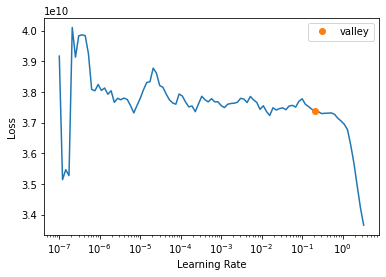

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
     actual  predicted
0 139400.00  146704.62
1 157900.00  143022.03
2 213500.00  226200.84
3 302000.00  307282.62
4 213250.00  212938.78
XGBoost RMSE:  36479.42


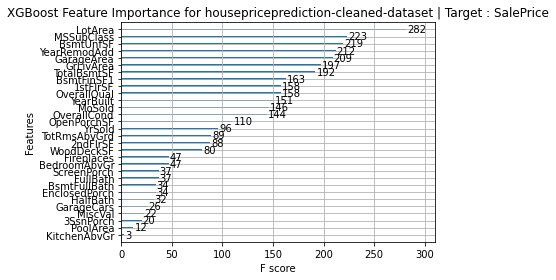

Target Variable: YrSold
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
31
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', '

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.024095500618487975, 'Adjusted R-Squared': -0.08807743034490434, 'RMSE': 1.284112474790399, 'Time taken': 0.05924534797668457}


  5%|▍         | 2/42 [00:00<00:04,  9.88it/s]

{'Model': 'BaggingRegressor', 'R-Squared': -0.13855414494644847, 'Adjusted R-Squared': -0.26942243746902883, 'RMSE': 1.386999323463307, 'Time taken': 0.14284849166870117}
{'Model': 'BayesianRidge', 'R-Squared': -0.000688678934626541, 'Adjusted R-Squared': -0.11571036616849173, 'RMSE': 1.3003159751581128, 'Time taken': 0.04462289810180664}


 10%|▉         | 4/42 [00:00<00:03, 11.44it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.9923785460931371, 'Adjusted R-Squared': -1.2213875743797047, 'RMSE': 1.8347856431104925, 'Time taken': 0.10947561264038086}
{'Model': 'DummyRegressor', 'R-Squared': -6.941214851341471e-06, 'Adjusted R-Squared': -0.11495026779127104, 'RMSE': 1.2998729675075835, 'Time taken': 0.01147150993347168}
{'Model': 'ElasticNet', 'R-Squared': -6.956030784488476e-06, 'Adjusted R-Squared': -0.11495028431018506, 'RMSE': 1.299873, 'Time taken': 0.01659369468688965}


 17%|█▋        | 7/42 [00:00<00:04,  7.71it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.00038837768584809584, 'Adjusted R-Squared': -0.11450950993646836, 'RMSE': 1.299616, 'Time taken': 0.45794677734375}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.9194124955749754, 'Adjusted R-Squared': -1.1400346215031338, 'RMSE': 1.8008749775960315, 'Time taken': 0.036063432693481445}


 21%|██▏       | 9/42 [00:01<00:07,  4.59it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.09426030666287177, 'Adjusted R-Squared': -0.22003735340573072, 'RMSE': 1.3597520674488812, 'Time taken': 0.7249829769134521}
{'Model': 'GammaRegressor', 'R-Squared': 0.0006227516717667303, 'Adjusted R-Squared': -0.1142481964119384, 'RMSE': 1.2994636455212691, 'Time taken': 0.028469324111938477}


 26%|██▌       | 11/42 [00:01<00:05,  5.22it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -2.9656554984758876, 'Adjusted R-Squared': -3.4214779695650703, 'RMSE': 2.588552018337422, 'Time taken': 0.24709296226501465}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.0018473293618932463, 'Adjusted R-Squared': -0.11288286266547543, 'RMSE': 1.2986672585911092, 'Time taken': 0.030788421630859375}


 31%|███       | 13/42 [00:02<00:06,  4.51it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.0054515602581934886, 'Adjusted R-Squared': -0.10886435235580727, 'RMSE': 1.296320458434793, 'Time taken': 0.535315752029419}


 36%|███▌      | 15/42 [00:03<00:07,  3.80it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.13206436433211088, 'Adjusted R-Squared': -0.2621867050599398, 'RMSE': 1.383040712897668, 'Time taken': 0.6252975463867188}
{'Model': 'HuberRegressor', 'R-Squared': -0.03548585116928016, 'Adjusted R-Squared': -0.15450721337264572, 'RMSE': 1.3227308705147052, 'Time taken': 0.1320631504058838}


 40%|████      | 17/42 [00:03<00:05,  4.86it/s]

{'Model': 'KNeighborsRegressor', 'R-Squared': -0.23101834563085233, 'Adjusted R-Squared': -0.37251470719761715, 'RMSE': 1.4422205101855958, 'Time taken': 0.09581470489501953}
{'Model': 'KernelRidge', 'R-Squared': -4.7736106979297945, 'Adjusted R-Squared': -5.437244111484944, 'RMSE': 3.123368, 'Time taken': 0.13397526741027832}


 45%|████▌     | 19/42 [00:03<00:03,  6.39it/s]

{'Model': 'Lars', 'R-Squared': -0.024141705614087128, 'Adjusted R-Squared': -0.14185914304099367, 'RMSE': 1.3154654041379332, 'Time taken': 0.06863522529602051}
{'Model': 'LarsCV', 'R-Squared': 0.0032298438393255635, 'Adjusted R-Squared': -0.11134143847799338, 'RMSE': 1.2977675723660873, 'Time taken': 0.09867548942565918}
{'Model': 'Lasso', 'R-Squared': -6.956030784488476e-06, 'Adjusted R-Squared': -0.11495028431018506, 'RMSE': 1.299873, 'Time taken': 0.018474578857421875}


 55%|█████▍    | 23/42 [00:04<00:03,  5.99it/s]

{'Model': 'LassoCV', 'R-Squared': 0.00014071881147759147, 'Adjusted R-Squared': -0.1147856353481227, 'RMSE': 1.299777, 'Time taken': 0.5360043048858643}
{'Model': 'LassoLars', 'R-Squared': -6.941254569348132e-06, 'Adjusted R-Squared': -0.11495026783555451, 'RMSE': 1.2998729675333975, 'Time taken': 0.044915199279785156}
{'Model': 'LassoLarsCV', 'R-Squared': 0.0032298438393255635, 'Adjusted R-Squared': -0.11134143847799338, 'RMSE': 1.2977675723660873, 'Time taken': 0.13163304328918457}


 62%|██████▏   | 26/42 [00:04<00:01,  8.05it/s]

{'Model': 'LassoLarsIC', 'R-Squared': -0.0011331140201893408, 'Adjusted R-Squared': -0.11620588574664792, 'RMSE': 1.3006046972661205, 'Time taken': 0.039946556091308594}
{'Model': 'LinearRegression', 'R-Squared': -0.024141810436242306, 'Adjusted R-Squared': -0.14185925991167259, 'RMSE': 1.3154655, 'Time taken': 0.024901151657104492}
{'Model': 'LinearSVR', 'R-Squared': -0.06579706803316032, 'Adjusted R-Squared': -0.18830247815191448, 'RMSE': 1.341951022198189, 'Time taken': 0.12680387496948242}


 64%|██████▍   | 27/42 [00:07<00:09,  1.65it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.30907309744835, 'Adjusted R-Squared': -0.4595412695688501, 'RMSE': 1.4872410148022743, 'Time taken': 2.983933687210083}


 76%|███████▌  | 32/42 [00:07<00:02,  3.72it/s]

{'Model': 'NuSVR', 'R-Squared': -0.04855182343214737, 'Adjusted R-Squared': -0.16907502152779652, 'RMSE': 1.3310499541408862, 'Time taken': 0.20885634422302246}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.005745769032177828, 'Adjusted R-Squared': -0.12134873098989951, 'RMSE': 1.3035974792889575, 'Time taken': 0.019932270050048828}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.010280251277851926, 'Adjusted R-Squared': -0.1034806393798664, 'RMSE': 1.2931697083250087, 'Time taken': 0.0413663387298584}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.9555367965790653, 'Adjusted R-Squared': -1.1803111410134406, 'RMSE': 1.8177426658467073, 'Time taken': 0.03157377243041992}
{'Model': 'PoissonRegressor', 'R-Squared': -0.00544092929307749, 'Adjusted R-Squared': -0.12100885220032787, 'RMSE': 1.3033999052875542, 'Time taken': 0.037696123123168945}
{'Model': 'RANSACRegressor', 'R-Squared': -1.5547212206689087, 'Adjusted R-Squared': -1.8483673379871743, 'RMSE': 2.077644

 81%|████████  | 34/42 [00:09<00:03,  2.43it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.018231303490736872, 'Adjusted R-Squared': -0.13526938435174118, 'RMSE': 1.311664084753744, 'Time taken': 1.3070590496063232}
{'Model': 'Ridge', 'R-Squared': -0.024249306965870465, 'Adjusted R-Squared': -0.14197911236424643, 'RMSE': 1.3155345, 'Time taken': 0.02285456657409668}
{'Model': 'RidgeCV', 'R-Squared': -0.02410314853909945, 'Adjusted R-Squared': -0.14181615411830628, 'RMSE': 1.3154406414633222, 'Time taken': 0.02768111228942871}
{'Model': 'SGDRegressor', 'R-Squared': -0.029795561207549337, 'Adjusted R-Squared': -0.1481628670934747, 'RMSE': 1.3190914721266345, 'Time taken': 0.032218217849731445}


 90%|█████████ | 38/42 [00:09<00:01,  3.82it/s]

{'Model': 'SVR', 'R-Squared': -0.1102695023871989, 'Adjusted R-Squared': -0.23788668656963563, 'RMSE': 1.3696626411692612, 'Time taken': 0.1971731185913086}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.024141810436242306, 'Adjusted R-Squared': -0.14185925991167259, 'RMSE': 1.3154655, 'Time taken': 0.01956772804260254}
{'Model': 'TweedieRegressor', 'R-Squared': 0.0018473293618932463, 'Adjusted R-Squared': -0.11288286266547543, 'RMSE': 1.2986672585911092, 'Time taken': 0.0482182502746582}


 98%|█████████▊| 41/42 [00:10<00:00,  4.64it/s]

{'Model': 'XGBRegressor', 'R-Squared': -0.1890409401733959, 'Adjusted R-Squared': -0.32571231260711975, 'RMSE': 1.4174175, 'Time taken': 0.2788865566253662}


100%|██████████| 42/42 [00:10<00:00,  4.05it/s]

{'Model': 'LGBMRegressor', 'R-Squared': -0.12332016239368726, 'Adjusted R-Squared': -0.25243742243893874, 'RMSE': 1.3776889717001009, 'Time taken': 0.20034313201904297}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: YrSold
YrSold
Target Standard Deviation: 1.334491974844782
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                           -0.09       0.02  1.28        0.06
OrthogonalMatchingPursuitCV                 -0.10       0.01  1.29        0.04
GradientBoostingRegressor                   -0.11       0.01  1.30        0.54
LassoLarsCV                                 -0.11       0.00  1.30        0.13
LarsCV                                      -0.11       0.00  1.30        0.10
GeneralizedLinearRegressor                  -0.11       0.00  1.30        0.03
TweedieRegressor                            -0.11

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,8.489949,6.549013,2.559104,00:00
1,6.345798,3.914694,1.978559,00:00
2,4.995130,3.433656,1.853013,00:00
3,3.625194,2.829751,1.682186,00:00
4,2.743744,3.003565,1.733080,00:00


Better model found at epoch 0 with _rmse value: 2.5591039657592773.
Better model found at epoch 1 with _rmse value: 1.9785585403442383.
Better model found at epoch 2 with _rmse value: 1.8530125617980957.
Better model found at epoch 3 with _rmse value: 1.682186484336853.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       3       2.45
1       4       2.97
2       4       2.89
3       2       2.66
4       1       1.90
XGBoost RMSE:  1.4159495


<Figure size 432x288 with 0 Axes>

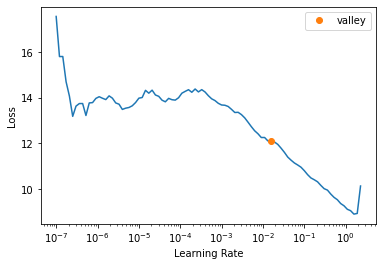

<Figure size 720x720 with 0 Axes>

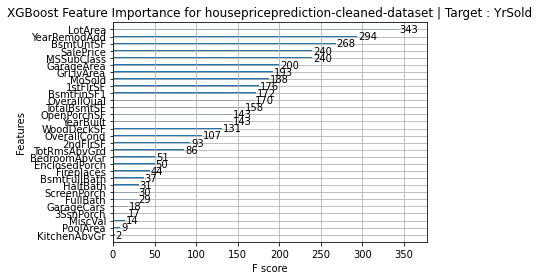

Target Variable: MoSold
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
31
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', '

  5%|▍         | 2/42 [00:00<00:05,  7.19it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.06204763419955106, 'Adjusted R-Squared': -0.04576298255912126, 'RMSE': 2.57331410104595, 'Time taken': 0.10264730453491211}
{'Model': 'BaggingRegressor', 'R-Squared': -0.062099527546497946, 'Adjusted R-Squared': -0.18417993301161273, 'RMSE': 2.738325155552979, 'Time taken': 0.16293621063232422}
{'Model': 'BayesianRidge', 'R-Squared': 0.026522984157623664, 'Adjusted R-Squared': -0.08537092570931626, 'RMSE': 2.6215929429644143, 'Time taken': 0.025495529174804688}


 10%|▉         | 4/42 [00:00<00:03, 10.34it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -1.0693463396482183, 'Adjusted R-Squared': -1.307202240757209, 'RMSE': 3.822249212321966, 'Time taken': 0.11587715148925781}
{'Model': 'DummyRegressor', 'R-Squared': -0.0003737765049074415, 'Adjusted R-Squared': -0.11535926805719576, 'RMSE': 2.6575629323405914, 'Time taken': 0.012113332748413086}
{'Model': 'ElasticNet', 'R-Squared': -0.00037379676189597255, 'Adjusted R-Squared': -0.11535929064257378, 'RMSE': 2.657563, 'Time taken': 0.01666545867919922}


 17%|█▋        | 7/42 [00:00<00:05,  6.82it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.02596323505022924, 'Adjusted R-Squared': -0.08599501379457197, 'RMSE': 2.6223466, 'Time taken': 0.5184898376464844}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.9917337249403622, 'Adjusted R-Squared': -1.2206686358530474, 'RMSE': 3.749885843011283, 'Time taken': 0.04095172882080078}


 21%|██▏       | 9/42 [00:01<00:08,  4.10it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.0035861141197810475, 'Adjusted R-Squared': -0.11094421759058903, 'RMSE': 2.652297853580851, 'Time taken': 0.7983007431030273}
{'Model': 'GammaRegressor', 'R-Squared': 0.029503781103439652, 'Adjusted R-Squared': -0.0820475084249006, 'RMSE': 2.6175761930782104, 'Time taken': 0.027030229568481445}


 26%|██▌       | 11/42 [00:02<00:06,  4.81it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -3.845754352533934, 'Adjusted R-Squared': -4.402737611445881, 'RMSE': 5.849019988174702, 'Time taken': 0.24311113357543945}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.029827535233243663, 'Adjusted R-Squared': -0.08168654117672847, 'RMSE': 2.617139549547534, 'Time taken': 0.05978035926818848}


 31%|███       | 13/42 [00:02<00:06,  4.26it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.023834857075380023, 'Adjusted R-Squared': -0.08836803291595574, 'RMSE': 2.6252100374723915, 'Time taken': 0.5209314823150635}


 33%|███▎      | 14/42 [00:03<00:08,  3.18it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.07958266226170818, 'Adjusted R-Squared': -0.20367262344121495, 'RMSE': 2.7607708382680305, 'Time taken': 0.6596307754516602}


 38%|███▊      | 16/42 [00:03<00:06,  3.81it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.026872177701471878, 'Adjusted R-Squared': -0.08498159497652003, 'RMSE': 2.6211227082160766, 'Time taken': 0.2927074432373047}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.14340844302981615, 'Adjusted R-Squared': -0.27483470084933526, 'RMSE': 2.841208502279384, 'Time taken': 0.10192751884460449}


 43%|████▎     | 18/42 [00:03<00:04,  5.02it/s]

{'Model': 'KernelRidge', 'R-Squared': -5.68444395260847, 'Adjusted R-Squared': -6.452770843712893, 'RMSE': 6.8696566, 'Time taken': 0.14068388938903809}
{'Model': 'Lars', 'R-Squared': 0.014484606369678965, 'Adjusted R-Squared': -0.0987930250820821, 'RMSE': 2.637752931639736, 'Time taken': 0.09836244583129883}


 45%|████▌     | 19/42 [00:04<00:04,  5.46it/s]

{'Model': 'LarsCV', 'R-Squared': 0.02141204376811534, 'Adjusted R-Squared': -0.09106933051141164, 'RMSE': 2.6284658657364286, 'Time taken': 0.1337299346923828}
{'Model': 'Lasso', 'R-Squared': -0.00037379676189597255, 'Adjusted R-Squared': -0.11535929064257378, 'RMSE': 2.657563, 'Time taken': 0.030551910400390625}


 50%|█████     | 21/42 [00:04<00:05,  3.90it/s]

{'Model': 'LassoCV', 'R-Squared': 0.02695799120795883, 'Adjusted R-Squared': -0.08488591784859767, 'RMSE': 2.621007, 'Time taken': 0.6680111885070801}
{'Model': 'LassoLars', 'R-Squared': -0.00037377992694143103, 'Adjusted R-Squared': -0.1153592718725669, 'RMSE': 2.657562936886028, 'Time taken': 0.032170772552490234}


 60%|█████▉    | 25/42 [00:05<00:02,  6.33it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.02141204376811534, 'Adjusted R-Squared': -0.09106933051141164, 'RMSE': 2.6284658657364286, 'Time taken': 0.20707392692565918}
{'Model': 'LassoLarsIC', 'R-Squared': 0.024680324261758257, 'Adjusted R-Squared': -0.08742538559321211, 'RMSE': 2.624072929802719, 'Time taken': 0.06006121635437012}
{'Model': 'LinearRegression', 'R-Squared': 0.03925183023100487, 'Adjusted R-Squared': -0.07117899388037396, 'RMSE': 2.604397, 'Time taken': 0.07349181175231934}


 62%|██████▏   | 26/42 [00:05<00:02,  6.66it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.03234855833567429, 'Adjusted R-Squared': -0.07887574530390351, 'RMSE': 2.613736978728339, 'Time taken': 0.10964035987854004}


 67%|██████▋   | 28/42 [00:08<00:08,  1.73it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.11959921242508398, 'Adjusted R-Squared': -0.24828877707164554, 'RMSE': 2.811471596989136, 'Time taken': 2.594369649887085}
{'Model': 'NuSVR', 'R-Squared': 0.016519942072767857, 'Adjusted R-Squared': -0.09652374274645426, 'RMSE': 2.6350277141788956, 'Time taken': 0.18867039680480957}


 76%|███████▌  | 32/42 [00:08<00:02,  3.83it/s]

{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.045848967743316815, 'Adjusted R-Squared': -0.06382356469998007, 'RMSE': 2.5954398621852404, 'Time taken': 0.022750139236450195}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.041859868825930735, 'Adjusted R-Squared': -0.06827118073430727, 'RMSE': 2.600859689422428, 'Time taken': 0.04108095169067383}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -1.252771218833181, 'Adjusted R-Squared': -1.511710439388719, 'RMSE': 3.9880532885535818, 'Time taken': 0.029052257537841797}
{'Model': 'PoissonRegressor', 'R-Squared': 0.03803430469204783, 'Adjusted R-Squared': -0.0725364648835789, 'RMSE': 2.6060467405682703, 'Time taken': 0.040868282318115234}
{'Model': 'RANSACRegressor', 'R-Squared': -1.1725394229038244, 'Adjusted R-Squared': -1.4222565979502413, 'RMSE': 3.9163926, 'Time taken': 0.22366023063659668}


 81%|████████  | 34/42 [00:09<00:03,  2.28it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.02934384913383492, 'Adjusted R-Squared': -0.08222582337951745, 'RMSE': 2.6177918646399956, 'Time taken': 1.5050911903381348}
{'Model': 'Ridge', 'R-Squared': 0.03917284390889153, 'Adjusted R-Squared': -0.07126705909008657, 'RMSE': 2.604504, 'Time taken': 0.024503707885742188}
{'Model': 'RidgeCV', 'R-Squared': 0.039056207958529154, 'Adjusted R-Squared': -0.07139710147152512, 'RMSE': 2.604662161403571, 'Time taken': 0.02826714515686035}
{'Model': 'SGDRegressor', 'R-Squared': 0.03809017519124336, 'Adjusted R-Squared': -0.0724741724879241, 'RMSE': 2.6059710605064947, 'Time taken': 0.03222322463989258}


 90%|█████████ | 38/42 [00:10<00:01,  3.69it/s]

{'Model': 'SVR', 'R-Squared': 0.04372177953160261, 'Adjusted R-Squared': -0.06619525730384535, 'RMSE': 2.5983313936037034, 'Time taken': 0.1907949447631836}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.03925183023100487, 'Adjusted R-Squared': -0.07117899388037396, 'RMSE': 2.604397, 'Time taken': 0.01934218406677246}
{'Model': 'TweedieRegressor', 'R-Squared': 0.029827535233243663, 'Adjusted R-Squared': -0.08168654117672847, 'RMSE': 2.617139549547534, 'Time taken': 0.05366063117980957}


 98%|█████████▊| 41/42 [00:10<00:00,  4.56it/s]

{'Model': 'XGBRegressor', 'R-Squared': -0.17923931342983335, 'Adjusted R-Squared': -0.31478406209992915, 'RMSE': 2.8853822, 'Time taken': 0.26917171478271484}


100%|██████████| 42/42 [00:10<00:00,  3.87it/s]

{'Model': 'LGBMRegressor', 'R-Squared': -0.10261743192660511, 'Adjusted R-Squared': -0.22935506778023806, 'RMSE': 2.790068303552917, 'Time taken': 0.24265527725219727}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: MoSold
MoSold
Target Standard Deviation: 2.7138914655611344
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                           -0.05       0.06  2.57        0.10
OrthogonalMatchingPursuit                   -0.06       0.05  2.60        0.02
SVR                                         -0.07       0.04  2.60        0.19
OrthogonalMatchingPursuitCV                 -0.07       0.04  2.60        0.04
TransformedTargetRegressor                  -0.07       0.04  2.60        0.02
LinearRegression                            -0.07       0.04  2.60        0.07
Ridge                                       -0.07

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,23.292419,17.309677,4.160490,00:00
1,17.993666,10.195549,3.193047,00:00
2,14.718716,12.285738,3.505101,00:00


Better model found at epoch 0 with _rmse value: 4.160490036010742.
Better model found at epoch 1 with _rmse value: 3.193047046661377.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       4       5.42
1       9       6.12
2       8      10.68
3      12       7.08
4       5       6.08
XGBoost RMSE:  2.8870745


<Figure size 432x288 with 0 Axes>

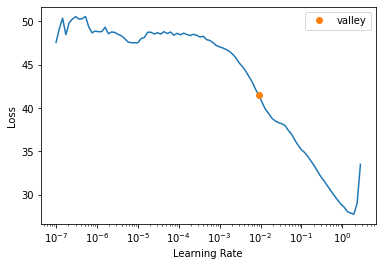

<Figure size 720x720 with 0 Axes>

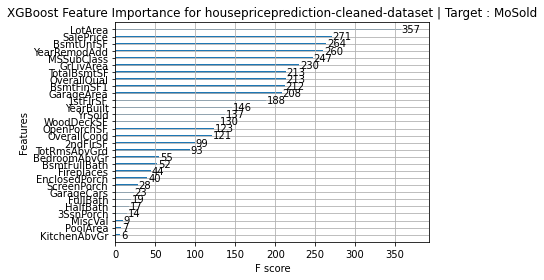

Target Variable: MiscVal
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
31
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 

  5%|▍         | 2/42 [00:00<00:05,  7.50it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -1.6860543315878518, 'Adjusted R-Squared': -1.994796208781858, 'RMSE': 1.9479991532209044, 'Time taken': 0.1292715072631836}
{'Model': 'BaggingRegressor', 'R-Squared': -0.28497841535498436, 'Adjusted R-Squared': -0.43267708378659187, 'RMSE': 1.3473464534979207, 'Time taken': 0.13480281829833984}
{'Model': 'BayesianRidge', 'R-Squared': 0.004887061327784825, 'Adjusted R-Squared': -0.10949373622074576, 'RMSE': 1.1856801624806281, 'Time taken': 0.04172348976135254}


 10%|▉         | 4/42 [00:00<00:03, 10.45it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -2.9513183237032607, 'Adjusted R-Squared': -3.405492843669153, 'RMSE': 2.3626662440602817, 'Time taken': 0.10351204872131348}
{'Model': 'DummyRegressor', 'R-Squared': -0.0036610878661089696, 'Adjusted R-Squared': -0.1190244312989952, 'RMSE': 1.1907618459167746, 'Time taken': 0.012442588806152344}
{'Model': 'ElasticNet', 'R-Squared': -0.003661058033107123, 'Adjusted R-Squared': -0.11902439803691256, 'RMSE': 1.1907618, 'Time taken': 0.022202730178833008}


 17%|█▋        | 7/42 [00:00<00:04,  7.75it/s]

{'Model': 'ElasticNetCV', 'R-Squared': -0.003661058033107123, 'Adjusted R-Squared': -0.11902439803691256, 'RMSE': 1.1907618, 'Time taken': 0.4229443073272705}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.88111841668327, 'Adjusted R-Squared': -1.0973389243480138, 'RMSE': 1.630194542554766, 'Time taken': 0.028761863708496094}


 21%|██▏       | 9/42 [00:01<00:05,  6.17it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.11840198578734129, 'Adjusted R-Squared': -0.24695393817669098, 'RMSE': 1.2569856855583639, 'Time taken': 0.4112980365753174}
{'Model': 'GammaRegressor', 'R-Squared': 0.004104830318259922, 'Adjusted R-Squared': -0.11036587884056082, 'RMSE': 1.1861460862769184, 'Time taken': 0.03031444549560547}


 26%|██▌       | 11/42 [00:01<00:04,  6.49it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.7317668656697787, 'Adjusted R-Squared': -0.9308205283904429, 'RMSE': 1.5641416486536328, 'Time taken': 0.24406814575195312}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.004928274967712976, 'Adjusted R-Squared': -0.10944778538082578, 'RMSE': 1.1856556091362997, 'Time taken': 0.032737016677856445}


 31%|███       | 13/42 [00:02<00:05,  4.89it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.5821953981416099, 'Adjusted R-Squared': -0.764056938157887, 'RMSE': 1.495069651327688, 'Time taken': 0.5813920497894287}


 33%|███▎      | 14/42 [00:03<00:13,  2.01it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.28419382595147935, 'Adjusted R-Squared': -0.43180231169302874, 'RMSE': 1.346935055473044, 'Time taken': 1.7579066753387451}


 40%|████      | 17/42 [00:04<00:09,  2.60it/s]

{'Model': 'HuberRegressor', 'R-Squared': -0.013593586065641095, 'Adjusted R-Squared': -0.1300985959582437, 'RMSE': 1.1966393889200193, 'Time taken': 0.812863826751709}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.3785495118549511, 'Adjusted R-Squared': -0.5370034787348306, 'RMSE': 1.3955408437503156, 'Time taken': 0.09302186965942383}
{'Model': 'KernelRidge', 'R-Squared': -0.929166653775169, 'Adjusted R-Squared': -1.1509099473125448, 'RMSE': 1.6508828, 'Time taken': 0.08452558517456055}
{'Model': 'Lars', 'R-Squared': -0.04551443637302799, 'Adjusted R-Squared': -0.1656885095193532, 'RMSE': 1.2153360606568702, 'Time taken': 0.07717347145080566}


 45%|████▌     | 19/42 [00:05<00:06,  3.33it/s]

{'Model': 'LarsCV', 'R-Squared': -0.0017413791037663717, 'Adjusted R-Squared': -0.11688406635707294, 'RMSE': 1.189622512084308, 'Time taken': 0.20482945442199707}
{'Model': 'Lasso', 'R-Squared': -0.003661058033107123, 'Adjusted R-Squared': -0.11902439803691256, 'RMSE': 1.1907618, 'Time taken': 0.06139254570007324}


 50%|█████     | 21/42 [00:05<00:06,  3.37it/s]

{'Model': 'LassoCV', 'R-Squared': -0.003661058033107123, 'Adjusted R-Squared': -0.11902439803691256, 'RMSE': 1.1907618, 'Time taken': 0.5177483558654785}
{'Model': 'LassoLars', 'R-Squared': -0.0036610916901169688, 'Adjusted R-Squared': -0.11902443556254427, 'RMSE': 1.1907618481852111, 'Time taken': 0.059255123138427734}


 60%|█████▉    | 25/42 [00:06<00:03,  5.45it/s]

{'Model': 'LassoLarsCV', 'R-Squared': -0.0008421382636720764, 'Adjusted R-Squared': -0.11588146450087589, 'RMSE': 1.1890884434356699, 'Time taken': 0.15755844116210938}
{'Model': 'LassoLarsIC', 'R-Squared': -0.012813314023178757, 'Adjusted R-Squared': -0.12922863747411895, 'RMSE': 1.196178709198246, 'Time taken': 0.08601832389831543}
{'Model': 'LinearRegression', 'R-Squared': -0.015551959133863313, 'Adjusted R-Squared': -0.13228206937913511, 'RMSE': 1.1977949, 'Time taken': 0.03666210174560547}
{'Model': 'LinearSVR', 'R-Squared': -0.013288122747890485, 'Adjusted R-Squared': -0.12975802191431485, 'RMSE': 1.19645906172248, 'Time taken': 0.07236671447753906}


 64%|██████▍   | 27/42 [00:08<00:08,  1.86it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.37555036782117757, 'Adjusted R-Squared': -0.5336596055017728, 'RMSE': 1.3940219621751964, 'Time taken': 2.575867176055908}


 76%|███████▌  | 32/42 [00:09<00:03,  3.24it/s]

{'Model': 'NuSVR', 'R-Squared': -0.009556104440984203, 'Adjusted R-Squared': -0.1255970359859251, 'RMSE': 1.1942537037221967, 'Time taken': 0.8449616432189941}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.01809525460967798, 'Adjusted R-Squared': -0.13511769766826176, 'RMSE': 1.199293759488449, 'Time taken': 0.02106642723083496}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.01809525460967798, 'Adjusted R-Squared': -0.13511769766826176, 'RMSE': 1.199293759488449, 'Time taken': 0.043621063232421875}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.1280323005865016, 'Adjusted R-Squared': -0.25769118571138705, 'RMSE': 1.262385899818703, 'Time taken': 0.030257225036621094}
{'Model': 'PoissonRegressor', 'R-Squared': 0.004693534895202522, 'Adjusted R-Squared': -0.10970950707086624, 'RMSE': 1.1857954505489516, 'Time taken': 0.03561973571777344}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skippe

 81%|████████  | 34/42 [00:11<00:03,  2.42it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.31248104536096166, 'Adjusted R-Squared': -0.4633409356323366, 'RMSE': 1.3616888687737982, 'Time taken': 1.19498872756958}
{'Model': 'Ridge', 'R-Squared': -0.015108757424906916, 'Adjusted R-Squared': -0.13178792494501135, 'RMSE': 1.1975334, 'Time taken': 0.018936634063720703}
{'Model': 'RidgeCV', 'R-Squared': -0.01190402704007143, 'Adjusted R-Squared': -0.12821483474582696, 'RMSE': 1.1956416339311238, 'Time taken': 0.02910780906677246}
{'Model': 'SGDRegressor', 'R-Squared': 0.002982424223051283, 'Adjusted R-Squared': -0.11161729713062107, 'RMSE': 1.186814310570828, 'Time taken': 0.0336000919342041}


 90%|█████████ | 38/42 [00:11<00:01,  3.89it/s]

{'Model': 'SVR', 'R-Squared': 0.000282430388213184, 'Adjusted R-Squared': -0.11462763508440599, 'RMSE': 1.1884202124639331, 'Time taken': 0.1218709945678711}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.015551959133863313, 'Adjusted R-Squared': -0.13228206937913511, 'RMSE': 1.1977949, 'Time taken': 0.018967866897583008}
{'Model': 'TweedieRegressor', 'R-Squared': 0.004928274967712976, 'Adjusted R-Squared': -0.10944778538082578, 'RMSE': 1.1856556091362997, 'Time taken': 0.030750751495361328}


 98%|█████████▊| 41/42 [00:11<00:00,  4.74it/s]

{'Model': 'XGBRegressor', 'R-Squared': -0.7263697677714367, 'Adjusted R-Squared': -0.9248030744118318, 'RMSE': 1.5617024, 'Time taken': 0.28296589851379395}


100%|██████████| 42/42 [00:11<00:00,  3.50it/s]

{'Model': 'LGBMRegressor', 'R-Squared': -0.2578900238598474, 'Adjusted R-Squared': -0.4024750840736231, 'RMSE': 1.3330692285631782, 'Time taken': 0.20752692222595215}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: MiscVal
MiscVal
Target Standard Deviation: 1.3431164553838353
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
TweedieRegressor                            -0.11       0.00  1.19        0.03
GeneralizedLinearRegressor                  -0.11       0.00  1.19        0.03
BayesianRidge                               -0.11       0.00  1.19        0.04
PoissonRegressor                            -0.11       0.00  1.19        0.04
GammaRegressor                              -0.11       0.00  1.19        0.03
SGDRegressor                                -0.11       0.00  1.19        0.03
SVR                                         -0.1

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,5.021031,1.940356,1.392967,00:00
1,3.726317,1.619357,1.272539,00:00
2,2.965205,2.071866,1.439398,00:00


Better model found at epoch 0 with _rmse value: 1.3929665088653564.
Better model found at epoch 1 with _rmse value: 1.272539496421814.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       0.97
1       1       1.01
2       1       1.23
3       1       1.05
4       1       1.04
XGBoost RMSE:  1.5617414


<Figure size 432x288 with 0 Axes>

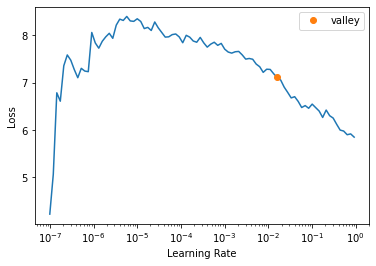

<Figure size 720x720 with 0 Axes>

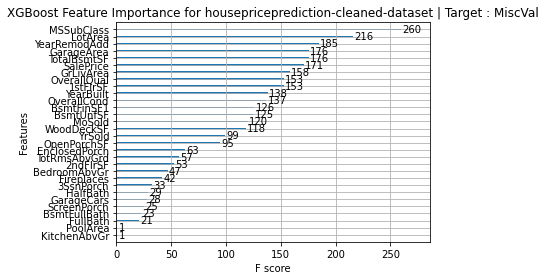

Target Variable: PoolArea
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
31
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',

 10%|▉         | 4/42 [00:00<00:02, 14.08it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.44409900418771264, 'Adjusted R-Squared': -0.6100873954736568, 'RMSE': 0.0702040436053157, 'Time taken': 0.19210529327392578}
{'Model': 'BaggingRegressor', 'R-Squared': -0.3646735395189, 'Adjusted R-Squared': -0.5215325670498081, 'RMSE': 0.06824612990181453, 'Time taken': 0.06622576713562012}
{'Model': 'BayesianRidge', 'R-Squared': -0.3144006184410759, 'Adjusted R-Squared': -0.4654811492963722, 'RMSE': 0.06697728214472083, 'Time taken': 0.022077083587646484}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.0034364261168382537, 'Adjusted R-Squared': -0.11877394636015315, 'RMSE': 0.05852057359806528, 'Time taken': 0.03846597671508789}
{'Model': 'DummyRegressor', 'R-Squared': -0.13423539518900274, 'Adjusted R-Squared': -0.26460727969348596, 'RMSE': 0.06221788458569918, 'Time taken': 0.04071354866027832}
{'Model': 'ElasticNet', 'R-Squared': -0.13423605915679016, 'Adjusted R-Squared': -0.26460801997940986, 'RMSE': 0.062217914, 'Time taken': 0.

 17%|█▋        | 7/42 [00:00<00:04,  7.35it/s]

{'Model': 'ElasticNetCV', 'R-Squared': -0.13423605915679016, 'Adjusted R-Squared': -0.26460801997940986, 'RMSE': 0.062217914, 'Time taken': 0.5087683200836182}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.0034364261168382537, 'Adjusted R-Squared': -0.11877394636015315, 'RMSE': 0.05852057359806528, 'Time taken': 0.028239011764526367}


 21%|██▏       | 9/42 [00:01<00:04,  7.07it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -11.59613745704467, 'Adjusted R-Squared': -13.043969348659001, 'RMSE': 0.20733963930565052, 'Time taken': 0.2698838710784912}
{'Model': 'GammaRegressor', 'R-Squared': -0.32818169107904094, 'Adjusted R-Squared': -0.48084625327203434, 'RMSE': 0.06732748435420116, 'Time taken': 0.02855372428894043}


 26%|██▌       | 11/42 [00:01<00:04,  7.14it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -190.3181621760729, 'Adjusted R-Squared': -212.30875552964451, 'RMSE': 0.8080565281632984, 'Time taken': 0.2438211441040039}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': -0.3726471677640366, 'Adjusted R-Squared': -0.5304227042886387, 'RMSE': 0.06844521660190594, 'Time taken': 0.03091144561767578}


 31%|███       | 13/42 [00:02<00:05,  5.29it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.31676613141191745, 'Adjusted R-Squared': -0.468118560309839, 'RMSE': 0.06703752420782598, 'Time taken': 0.5516378879547119}


 33%|███▎      | 14/42 [00:02<00:07,  3.73it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -3.229687550127684, 'Adjusted R-Squared': -3.715858532900981, 'RMSE': 0.12014834322379729, 'Time taken': 0.6140193939208984}


 36%|███▌      | 15/42 [00:03<00:08,  3.06it/s]

{'Model': 'HuberRegressor', 'R-Squared': -0.0034522767642166663, 'Adjusted R-Squared': -0.11879161892102319, 'RMSE': 0.05852103580239096, 'Time taken': 0.5479979515075684}
{'Model': 'KNeighborsRegressor', 'R-Squared': -2.2912714776632295, 'Adjusted R-Squared': -2.6695785440613022, 'RMSE': 0.10598526648703946, 'Time taken': 0.09275007247924805}


 45%|████▌     | 19/42 [00:03<00:04,  5.13it/s]

{'Model': 'KernelRidge', 'R-Squared': -295.28551183072875, 'Adjusted R-Squared': -329.3413177882838, 'RMSE': 1.0055852, 'Time taken': 0.1304473876953125}
{'Model': 'Lars', 'R-Squared': -3.0648523026172727, 'Adjusted R-Squared': -3.5320767052169595, 'RMSE': 0.11778392649651606, 'Time taken': 0.05351614952087402}
{'Model': 'LarsCV', 'R-Squared': -0.13423603015332364, 'Adjusted R-Squared': -0.2646079876422116, 'RMSE': 0.062217902001013264, 'Time taken': 0.1343238353729248}
{'Model': 'Lasso', 'R-Squared': -0.13423605915679016, 'Adjusted R-Squared': -0.26460801997940986, 'RMSE': 0.062217914, 'Time taken': 0.030630111694335938}


 50%|█████     | 21/42 [00:04<00:05,  4.00it/s]

{'Model': 'LassoCV', 'R-Squared': -0.13423605915679016, 'Adjusted R-Squared': -0.26460801997940986, 'RMSE': 0.062217914, 'Time taken': 0.6794769763946533}
{'Model': 'LassoLars', 'R-Squared': -0.13423603015332364, 'Adjusted R-Squared': -0.2646079876422116, 'RMSE': 0.062217902001013264, 'Time taken': 0.05014181137084961}


 60%|█████▉    | 25/42 [00:04<00:02,  5.89it/s]

{'Model': 'LassoLarsCV', 'R-Squared': -0.13423603015332364, 'Adjusted R-Squared': -0.2646079876422116, 'RMSE': 0.062217902001013264, 'Time taken': 0.222947359085083}
{'Model': 'LassoLarsIC', 'R-Squared': -0.2729212694266334, 'Adjusted R-Squared': -0.4192340590159018, 'RMSE': 0.06591198858904938, 'Time taken': 0.08870601654052734}
{'Model': 'LinearRegression', 'R-Squared': -0.9230883994293846, 'Adjusted R-Squared': -1.1441330430419576, 'RMSE': 0.081014596, 'Time taken': 0.05658531188964844}


 62%|██████▏   | 26/42 [00:05<00:02,  5.67it/s]

{'Model': 'LinearSVR', 'R-Squared': -0.0033177718007819657, 'Adjusted R-Squared': -0.11864165361696388, 'RMSE': 0.058517113526387075, 'Time taken': 0.19646716117858887}


 64%|██████▍   | 27/42 [00:07<00:08,  1.68it/s]

{'Model': 'MLPRegressor', 'R-Squared': -9.039530797585757, 'Adjusted R-Squared': -10.193499854779523, 'RMSE': 0.18510593822390392, 'Time taken': 2.1952662467956543}


 76%|███████▌  | 32/42 [00:07<00:02,  3.76it/s]

{'Model': 'NuSVR', 'R-Squared': -0.07371446633488499, 'Adjusted R-Squared': -0.19712992223544656, 'RMSE': 0.06053520887625811, 'Time taken': 0.4814743995666504}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.5987607690022188, 'Adjusted R-Squared': -0.7825263746346578, 'RMSE': 0.07386783738749546, 'Time taken': 0.022478580474853516}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.5270179790690075, 'Adjusted R-Squared': -0.702537287007974, 'RMSE': 0.07219144224702595, 'Time taken': 0.042563438415527344}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -12.317829572274722, 'Adjusted R-Squared': -13.848614580582161, 'RMSE': 0.2131966466916939, 'Time taken': 0.02944660186767578}
{'Model': 'PoissonRegressor', 'R-Squared': -0.3733466214869976, 'Adjusted R-Squared': -0.5312025549912502, 'RMSE': 0.06846265304350575, 'Time taken': 0.03486919403076172}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped

 90%|█████████ | 38/42 [00:08<00:00,  5.59it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.47364673539518853, 'Adjusted R-Squared': -0.6430314176245207, 'RMSE': 0.07091862981470046, 'Time taken': 0.5584697723388672}
{'Model': 'Ridge', 'R-Squared': -0.9355853399427267, 'Adjusted R-Squared': -1.1580664134993621, 'RMSE': 0.0812774, 'Time taken': 0.017609834671020508}
{'Model': 'RidgeCV', 'R-Squared': -0.9408056390920025, 'Adjusted R-Squared': -1.163886747033612, 'RMSE': 0.0813869298104082, 'Time taken': 0.029796361923217773}
{'Model': 'SGDRegressor', 'R-Squared': -3.8644841830125243, 'Adjusted R-Squared': -4.42362029600247, 'RMSE': 0.12884929328011105, 'Time taken': 0.027320384979248047}
{'Model': 'SVR', 'R-Squared': -1.4768039215880182, 'Adjusted R-Squared': -1.7614940275176756, 'RMSE': 0.09194104939000466, 'Time taken': 0.05895590782165527}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.9230883994293846, 'Adjusted R-Squared': -1.1441330430419576, 'RMSE': 0.081014596, 'Time taken': 0.026973724365234375}
{'Model': 'Twe

 98%|█████████▊| 41/42 [00:08<00:00,  6.57it/s]

{'Model': 'XGBRegressor', 'R-Squared': -0.026731054795617437, 'Adjusted R-Squared': -0.1447461185652288, 'RMSE': 0.059195954, 'Time taken': 0.22631049156188965}


100%|██████████| 42/42 [00:09<00:00,  4.55it/s]

{'Model': 'LGBMRegressor', 'R-Squared': -3.349647883749812, 'Adjusted R-Squared': -3.8496074106176073, 'RMSE': 0.12184022534238961, 'Time taken': 0.2318439483642578}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: PoolArea
PoolArea
Target Standard Deviation: 0.27854568423854453
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LinearSVR                                   -0.12      -0.00  0.06        0.20
DecisionTreeRegressor                       -0.12      -0.00  0.06        0.04
ExtraTreeRegressor                          -0.12      -0.00  0.06        0.03
HuberRegressor                              -0.12      -0.00  0.06        0.55
XGBRegressor                                -0.14      -0.03  0.06        0.23
NuSVR                                       -0.20      -0.07  0.06        0.48
DummyRegressor                              -0

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3.025187,0.542430,0.736498,00:00
1,2.065371,0.338953,0.582197,00:00
2,1.357098,0.349028,0.590786,00:00


Better model found at epoch 0 with _rmse value: 0.7364982962608337.
Better model found at epoch 1 with _rmse value: 0.5821965932846069.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       0       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.05919587


<Figure size 432x288 with 0 Axes>

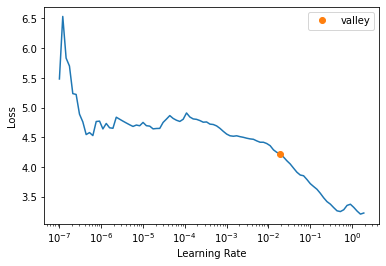

<Figure size 720x720 with 0 Axes>

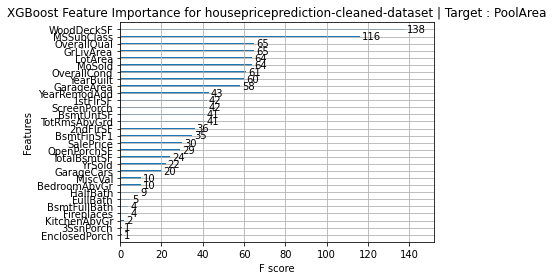

Target Variable: ScreenPorch
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice']
30
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch',

  5%|▍         | 2/42 [00:00<00:06,  6.33it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -1.0481523105378057, 'Adjusted R-Squared': -1.283572116346749, 'RMSE': 85.20629752933418, 'Time taken': 0.20631814002990723}
{'Model': 'BaggingRegressor', 'R-Squared': -0.06524089197511795, 'Adjusted R-Squared': -0.18768237381133845, 'RMSE': 61.44895253072494, 'Time taken': 0.12276649475097656}
{'Model': 'BayesianRidge', 'R-Squared': 0.04515320240714449, 'Adjusted R-Squared': -0.06459930306329875, 'RMSE': 58.177816483603976, 'Time taken': 0.0238802433013916}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.6107065227825941, 'Adjusted R-Squared': -0.7958452035622028, 'RMSE': 75.56118812383069, 'Time taken': 0.04897022247314453}


 12%|█▏        | 5/42 [00:00<00:02, 13.94it/s]

{'Model': 'DummyRegressor', 'R-Squared': -0.0001160298897555645, 'Adjusted R-Squared': -0.11507189539432527, 'RMSE': 59.54095, 'Time taken': 0.03806281089782715}
{'Model': 'ElasticNet', 'R-Squared': 0.04056045472284353, 'Adjusted R-Squared': -0.06971995278027787, 'RMSE': 58.317566, 'Time taken': 0.036092519760131836}


 17%|█▋        | 7/42 [00:00<00:03,  9.15it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.044335385178483455, 'Adjusted R-Squared': -0.06551112227226574, 'RMSE': 58.20273, 'Time taken': 0.2877461910247803}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -1.0492440032961645, 'Adjusted R-Squared': -1.2847892910313559, 'RMSE': 85.22900255612716, 'Time taken': 0.029850006103515625}


 21%|██▏       | 9/42 [00:01<00:05,  6.47it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.017189032258137837, 'Adjusted R-Squared': -0.13410731182803892, 'RMSE': 60.047012343982246, 'Time taken': 0.4301035404205322}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:01<00:04,  7.30it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.01959756694515402, 'Adjusted R-Squared': -0.13679268958252822, 'RMSE': 60.11806098711871, 'Time taken': 0.1960911750793457}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.034534059253771954, 'Adjusted R-Squared': -0.0764390373837256, 'RMSE': 58.50042863825932, 'Time taken': 0.033010005950927734}


 31%|███       | 13/42 [00:02<00:05,  5.36it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.04112686325300663, 'Adjusted R-Squared': -0.06908843982136048, 'RMSE': 58.30034776519136, 'Time taken': 0.5402402877807617}


 33%|███▎      | 14/42 [00:02<00:07,  3.52it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.030158320291163943, 'Adjusted R-Squared': -0.08131773484778271, 'RMSE': 58.63284823219221, 'Time taken': 0.6958351135253906}


 38%|███▊      | 16/42 [00:03<00:06,  3.98it/s]

{'Model': 'HuberRegressor', 'R-Squared': -0.05969326156351151, 'Adjusted R-Squared': -0.1814970847317312, 'RMSE': 61.28873474569393, 'Time taken': 0.3298184871673584}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.030653569189129426, 'Adjusted R-Squared': -0.14911949668213298, 'RMSE': 60.443127, 'Time taken': 0.10485243797302246}


 40%|████      | 17/42 [00:03<00:05,  4.56it/s]

{'Model': 'KernelRidge', 'R-Squared': -0.02381204805477055, 'Adjusted R-Squared': -0.14149159380819243, 'RMSE': 60.24218, 'Time taken': 0.11796379089355469}
{'Model': 'Lars', 'R-Squared': -1.1697916173893579, 'Adjusted R-Squared': -1.4191929527214682, 'RMSE': 87.69999789848934, 'Time taken': 0.04418325424194336}


 45%|████▌     | 19/42 [00:03<00:04,  5.62it/s]

{'Model': 'LarsCV', 'R-Squared': -0.19976160741409132, 'Adjusted R-Squared': -0.33766524045019386, 'RMSE': 65.21358112186817, 'Time taken': 0.19160962104797363}
{'Model': 'Lasso', 'R-Squared': 0.051209492745634355, 'Adjusted R-Squared': -0.0578468873985456, 'RMSE': 57.99302, 'Time taken': 0.045153141021728516}


 50%|█████     | 21/42 [00:04<00:05,  4.01it/s]

{'Model': 'LassoCV', 'R-Squared': 0.05061985945502667, 'Adjusted R-Squared': -0.05850429463060247, 'RMSE': 58.01104, 'Time taken': 0.6867413520812988}
{'Model': 'LassoLars', 'R-Squared': -0.00011599865907907514, 'Adjusted R-Squared': -0.11507186057391583, 'RMSE': 59.54094959612687, 'Time taken': 0.06055259704589844}


 60%|█████▉    | 25/42 [00:04<00:02,  5.70it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.050096371010237783, 'Adjusted R-Squared': -0.059087954160999434, 'RMSE': 58.02703003200818, 'Time taken': 0.23343396186828613}
{'Model': 'LassoLarsIC', 'R-Squared': 0.04636414009381362, 'Adjusted R-Squared': -0.06324917713678269, 'RMSE': 58.140914196787335, 'Time taken': 0.0855872631072998}
{'Model': 'LinearRegression', 'R-Squared': 0.03792990861660073, 'Adjusted R-Squared': -0.07265286050792796, 'RMSE': 58.397457, 'Time taken': 0.10390114784240723}
{'Model': 'LinearSVR', 'R-Squared': -0.05970545963566076, 'Adjusted R-Squared': -0.1815106848811392, 'RMSE': 61.28908749034376, 'Time taken': 0.05143451690673828}


 64%|██████▍   | 27/42 [00:07<00:08,  1.81it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.070711778803909, 'Adjusted R-Squared': -0.03610295926460738, 'RMSE': 57.39390647174487, 'Time taken': 2.63399338722229}


 76%|███████▌  | 32/42 [00:08<00:03,  2.87it/s]

{'Model': 'NuSVR', 'R-Squared': -0.05940683352568521, 'Adjusted R-Squared': -0.1811777339309364, 'RMSE': 61.28045121730491, 'Time taken': 1.2081828117370605}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.03539548105904844, 'Adjusted R-Squared': -0.07547860157784259, 'RMSE': 58.474324770453514, 'Time taken': 0.01996469497680664}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.03705577920501835, 'Adjusted R-Squared': -0.07362746456451985, 'RMSE': 58.42397946146555, 'Time taken': 0.04229116439819336}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.02187444470677291, 'Adjusted R-Squared': -0.1393312774316895, 'RMSE': 60.18514880087188, 'Time taken': 0.029680490493774414}
{'Model': 'PoissonRegressor', 'R-Squared': 0.030556033464556376, 'Adjusted R-Squared': -0.08087430751652924, 'RMSE': 58.62082490519651, 'Time taken': 0.07047176361083984}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped bec

 86%|████████▌ | 36/42 [00:10<00:01,  3.10it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.02836190582076248, 'Adjusted R-Squared': -0.0833206337400696, 'RMSE': 58.68712521872541, 'Time taken': 1.0571908950805664}
{'Model': 'Ridge', 'R-Squared': 0.03863168133643846, 'Adjusted R-Squared': -0.07187042425707446, 'RMSE': 58.376152, 'Time taken': 0.04969382286071777}
{'Model': 'RidgeCV', 'R-Squared': 0.042070751574056264, 'Adjusted R-Squared': -0.0680360585898454, 'RMSE': 58.27164607140561, 'Time taken': 0.06887269020080566}
{'Model': 'SGDRegressor', 'R-Squared': 0.052728487168751004, 'Adjusted R-Squared': -0.056153295915300605, 'RMSE': 57.9465798530281, 'Time taken': 0.06926298141479492}


 90%|█████████ | 38/42 [00:10<00:01,  3.85it/s]

{'Model': 'SVR', 'R-Squared': -0.05854092941529543, 'Adjusted R-Squared': -0.18021230061245586, 'RMSE': 61.2554023691744, 'Time taken': 0.129744291305542}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.03792990861660073, 'Adjusted R-Squared': -0.07265286050792796, 'RMSE': 58.397457, 'Time taken': 0.02000284194946289}
{'Model': 'TweedieRegressor', 'R-Squared': 0.034534059253771954, 'Adjusted R-Squared': -0.0764390373837256, 'RMSE': 58.50042863825932, 'Time taken': 0.026027202606201172}


 98%|█████████▊| 41/42 [00:10<00:00,  4.91it/s]

{'Model': 'XGBRegressor', 'R-Squared': -0.08404004637080442, 'Adjusted R-Squared': -0.20864235055135683, 'RMSE': 61.9888, 'Time taken': 0.28731632232666016}


100%|██████████| 42/42 [00:10<00:00,  3.83it/s]

{'Model': 'LGBMRegressor', 'R-Squared': -0.0033373927535964576, 'Adjusted R-Squared': -0.11866352985171114, 'RMSE': 59.63676381171144, 'Time taken': 0.21099162101745605}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: ScreenPorch
ScreenPorch
Target Standard Deviation: 54.7465934753418
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
MLPRegressor                                -0.04       0.07 57.39        2.63
SGDRegressor                                -0.06       0.05 57.95        0.07
Lasso                                       -0.06       0.05 57.99        0.05
LassoCV                                     -0.06       0.05 58.01        0.69
LassoLarsCV                                 -0.06       0.05 58.03        0.23
LassoLarsIC                                 -0.06       0.05 58.14        0.09
BayesianRidge                          

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3061.896484,3639.709717,60.330006,00:00
1,3064.082764,3559.599365,59.662380,00:00
2,3046.436523,3571.028809,59.758083,00:00


Better model found at epoch 0 with _rmse value: 60.33000564575195.
Better model found at epoch 1 with _rmse value: 59.66238021850586.
No improvement since epoch 1: early stopping


,MSSubClass,OverallQual,OverallCond,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,LotArea,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,ScreenPorch,ScreenPorch_pred
0,1.00,8.00,5.00,60.00,2.00,3.00,1.00,4.00,2.00,5.00,1.00,3.00,1.00,1.00,1.00,9.00,4.00,-0.23,1.25,1.08,-0.47,0.55,0.39,-0.81,-0.39,0.38,0.32,0.96,-0.37,0.61,0.00,9.35
1,1.00,5.00,5.00,58.00,1.00,2.00,1.00,4.00,2.00,5.00,1.00,1.00,1.00,1.00,1.00,12.00,2.00,-0.26,1.19,-0.51,0.77,0.14,-0.11,-0.81,-0.75,-2.19,-0.76,-0.25,-0.37,-0.41,0.00,9.87
2,1.00,6.00,6.00,9.00,1.00,2.00,1.00,4.00,2.00,6.00,2.00,3.00,1.00,1.00,1.00,1.00,4.00,0.58,-0.41,-0.72,-0.49,-0.54,0.46,-0.81,-0.33,0.25,-0.76,1.05,-0.37,-0.53,233.00,9.11
3,1.00,5.00,5.00,10.00,2.00,2.00,1.00,4.00,2.00,5.00,1.00,3.00,1.00,1.00,1.00,5.00,5.00,0.27,-0.38,1.22,-0.86,0.29,0.07,-0.81,-0.62,0.28,-0.76,-0.69,-0.37,-0.48,0.00,8.92
4,2.00,6.00,6.00,31.00,1.00,2.00,1.00,3.00,2.00,4.00,2.00,3.00,1.00,1.00,1.00,7.00,1.00,-0.59,-1.49,-0.10,0.30,0.10,-0.15,-0.81,-0.78,-0.14,0.57,1.07,-0.37,-0.87,0.00,8.67
5,13.00,6.00,5.00,51.00,1.00,3.00,2.00,4.00,2.00,4.00,2.00,3.00,1.00,1.00,1.00,6.00,2.00,-1.14,0.96,-0.01,-0.57,-0.68,-1.00,0.92,0.01,-0.14,-0.76,-0.69,-0.37,-0.04,0.00,9.25
6,1.00,5.00,6.00,19.00,2.00,2.00,1.00,4.00,2.00,5.00,2.00,2.00,1.00,1.00,1.00,7.00,5.00,-0.25,-0.08,0.73,-0.65,-0.00,-0.27,-0.81,-0.87,-0.77,-0.76,0.56,2.58,-0.48,0.00,8.94
7,1.00,5.00,9.00,59.00,1.00,2.00,1.00,4.00,2.00,4.00,2.00,2.00,1.00,1.00,1.00,10.00,3.00,-0.51,0.37,0.43,-0.89,-0.54,-0.88,-0.81,-1.31,-0.96,-0.76,-0.69,-0.37,-0.62,0.00,9.79
8,1.00,7.00,5.00,58.00,2.00,3.00,1.00,3.00,2.00,5.00,1.00,3.00,1.00,1.00,1.00,2.00,4.00,-0.41,1.19,0.62,-0.14,0.39,0.18,-0.81,-0.54,0.75,0.30,-0.69,-0.37,0.17,0.00,9.61


<Figure size 432x288 with 0 Axes>

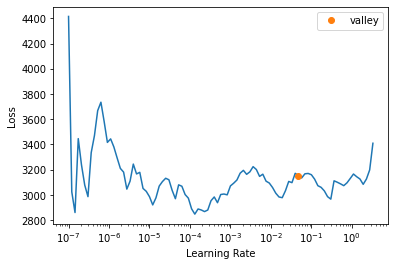

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.00      22.51
1    0.00      11.38
2    0.00      50.40
3    0.00      -4.93
4  396.00      97.30
XGBoost RMSE:  61.968136


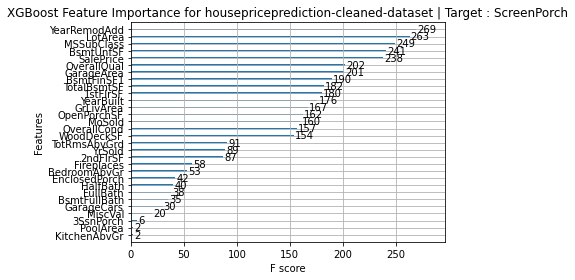

Target Variable: 3SsnPorch
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
31
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -64.06188019749824, 'Adjusted R-Squared': -71.54025723169345, 'RMSE': 0.9375764558022652, 'Time taken': 0.09334325790405273}

 14%|█▍        | 6/42 [00:00<00:01, 23.21it/s]


{'Model': 'BaggingRegressor', 'R-Squared': -16.18034722222222, 'Adjusted R-Squared': -18.155099776500638, 'RMSE': 0.4817917472012497, 'Time taken': 0.08040165901184082}
{'Model': 'BayesianRidge', 'R-Squared': -1.7265059602326747, 'Adjusted R-Squared': -2.0398974499145917, 'RMSE': 0.191931657482737, 'Time taken': 0.022716999053955078}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -86.19444444444444, 'Adjusted R-Squared': -96.21679438058749, 'RMSE': 1.0853949473720717, 'Time taken': 0.03971505165100098}
{'Model': 'DummyRegressor', 'R-Squared': -1.7189670138888902, 'Adjusted R-Squared': -2.0314919580140502, 'RMSE': 0.1916661227456989, 'Time taken': 0.022305965423583984}
{'Model': 'ElasticNet', 'R-Squared': -1.718965767158402, 'Adjusted R-Squared': -2.031490567981207, 'RMSE': 0.19166608, 'Time taken': 0.024344444274902344}
{'Model': 'ElasticNetCV', 'R-Squared': -1.718965767158402, 'Adjusted R-Squared': -2.031490567981207, 'RMSE': 0.19166608, 'Time taken': 0.5005025863647461}
{'Model': '

 21%|██▏       | 9/42 [00:01<00:04,  6.78it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -12.741489583333331, 'Adjusted R-Squared': -14.320971144636014, 'RMSE': 0.4308839274144599, 'Time taken': 0.30682921409606934}
{'Model': 'GammaRegressor', 'R-Squared': -2.0787960005737576, 'Adjusted R-Squared': -2.4326805983408564, 'RMSE': 0.20395475971954097, 'Time taken': 0.02988457679748535}


 26%|██▌       | 11/42 [00:01<00:04,  6.91it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -51.26493340417883, 'Adjusted R-Squared': -57.27239701385456, 'RMSE': 0.8403275243107636, 'Time taken': 0.24526762962341309}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': -2.215002639766183, 'Adjusted R-Squared': -2.5845431730726407, 'RMSE': 0.20841743898436768, 'Time taken': 0.03073263168334961}


 31%|███       | 13/42 [00:01<00:05,  5.34it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': -18.464917092245162, 'Adjusted R-Squared': -20.702263884457253, 'RMSE': 0.5128255650503367, 'Time taken': 0.539473295211792}


 33%|███▎      | 14/42 [00:03<00:11,  2.33it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -20.83387978208875, 'Adjusted R-Squared': -23.34352113635183, 'RMSE': 0.5431363200626638, 'Time taken': 1.561086654663086}


 38%|███▊      | 16/42 [00:04<00:10,  2.37it/s]

{'Model': 'HuberRegressor', 'R-Squared': -0.013876205702441302, 'Adjusted R-Squared': -0.13041370061076796, 'RMSE': 0.11704041513399306, 'Time taken': 0.818972110748291}
{'Model': 'KNeighborsRegressor', 'R-Squared': -20.69722222222222, 'Adjusted R-Squared': -23.191155810983396, 'RMSE': 0.5414339155718885, 'Time taken': 0.12214016914367676}


 40%|████      | 17/42 [00:04<00:08,  2.79it/s]

{'Model': 'KernelRidge', 'R-Squared': -74.12823534247015, 'Adjusted R-Squared': -82.76366469217936, 'RMSE': 1.0074998, 'Time taken': 0.1526045799255371}
{'Model': 'Lars', 'R-Squared': -4.775168594172674, 'Adjusted R-Squared': -5.438981076261487, 'RMSE': 0.2793352357162181, 'Time taken': 0.09413385391235352}


 45%|████▌     | 19/42 [00:04<00:05,  3.86it/s]

{'Model': 'LarsCV', 'R-Squared': -1.718965835041672, 'Adjusted R-Squared': -2.031490643667152, 'RMSE': 0.1916660811958936, 'Time taken': 0.1337451934814453}
{'Model': 'Lasso', 'R-Squared': -1.718965767158402, 'Adjusted R-Squared': -2.031490567981207, 'RMSE': 0.19166608, 'Time taken': 0.07056879997253418}


 50%|█████     | 21/42 [00:05<00:06,  3.18it/s]

{'Model': 'LassoCV', 'R-Squared': -1.718965767158402, 'Adjusted R-Squared': -2.031490567981207, 'RMSE': 0.19166608, 'Time taken': 0.7365472316741943}
{'Model': 'LassoLars', 'R-Squared': -1.718965835041672, 'Adjusted R-Squared': -2.031490643667152, 'RMSE': 0.1916660811958936, 'Time taken': 0.0595705509185791}


 62%|██████▏   | 26/42 [00:06<00:02,  6.04it/s]

{'Model': 'LassoLarsCV', 'R-Squared': -1.718965835041672, 'Adjusted R-Squared': -2.031490643667152, 'RMSE': 0.1916660811958936, 'Time taken': 0.18451166152954102}
{'Model': 'LassoLarsIC', 'R-Squared': -1.718965835041672, 'Adjusted R-Squared': -2.031490643667152, 'RMSE': 0.1916660811958936, 'Time taken': 0.042165279388427734}
{'Model': 'LinearRegression', 'R-Squared': -3.954791792405226, 'Adjusted R-Squared': -4.5243080903828385, 'RMSE': 0.25873554, 'Time taken': 0.0402522087097168}
{'Model': 'LinearSVR', 'R-Squared': -0.013881143849511446, 'Adjusted R-Squared': -0.13041920636094972, 'RMSE': 0.11704070015995387, 'Time taken': 0.07457184791564941}
{'Model': 'MLPRegressor', 'R-Squared': -32.36436022855986, 'Adjusted R-Squared': -36.19934416287709, 'RMSE': 0.6714053365891826, 'Time taken': 2.298954486846924}


 76%|███████▌  | 32/42 [00:09<00:03,  3.13it/s]

{'Model': 'NuSVR', 'R-Squared': -0.04870440727837999, 'Adjusted R-Squared': -0.16924514374715938, 'RMSE': 0.11903370038982146, 'Time taken': 0.7395105361938477}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -2.013950034403597, 'Adjusted R-Squared': -2.3603810728407923, 'RMSE': 0.20179546974940446, 'Time taken': 0.018681764602661133}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -1.8640148223071407, 'Adjusted R-Squared': -2.1932119283194558, 'RMSE': 0.19671207463929963, 'Time taken': 0.04247260093688965}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -8.362286208949882, 'Adjusted R-Squared': -9.438411060553317, 'RMSE': 0.3556594437144117, 'Time taken': 0.029673337936401367}
{'Model': 'PoissonRegressor', 'R-Squared': -2.253157158819632, 'Adjusted R-Squared': -2.6270832690287853, 'RMSE': 0.20965050376213934, 'Time taken': 0.03460955619812012}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped be

 90%|█████████ | 38/42 [00:10<00:00,  4.44it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -13.357325694444441, 'Adjusted R-Squared': -15.007593015644954, 'RMSE': 0.4404333171426919, 'Time taken': 0.7178041934967041}
{'Model': 'Ridge', 'R-Squared': -3.932010453767246, 'Adjusted R-Squared': -4.498908207073827, 'RMSE': 0.25814003, 'Time taken': 0.019086122512817383}
{'Model': 'RidgeCV', 'R-Squared': -3.798683494349179, 'Adjusted R-Squared': -4.350256309791614, 'RMSE': 0.2546269929415589, 'Time taken': 0.02820134162902832}
{'Model': 'SGDRegressor', 'R-Squared': -3.5148797080488077, 'Adjusted R-Squared': -4.033831398629131, 'RMSE': 0.24698266926097784, 'Time taken': 0.029038190841674805}
{'Model': 'SVR', 'R-Squared': -0.6585226877539412, 'Adjusted R-Squared': -0.8491574794497967, 'RMSE': 0.14969389766575114, 'Time taken': 0.0873265266418457}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -3.954791792405226, 'Adjusted R-Squared': -4.5243080903828385, 'RMSE': 0.25873554, 'Time taken': 0.021838903427124023}
{'Model': 'TweedieReg

 98%|█████████▊| 41/42 [00:10<00:00,  5.22it/s]

{'Model': 'XGBRegressor', 'R-Squared': -28.120649112780054, 'Adjusted R-Squared': -31.467850160226043, 'RMSE': 0.62725466, 'Time taken': 0.26767921447753906}


100%|██████████| 42/42 [00:10<00:00,  3.85it/s]

{'Model': 'LGBMRegressor', 'R-Squared': -22.550231583918336, 'Adjusted R-Squared': -25.257154754483665, 'RMSE': 0.5640803604438744, 'Time taken': 0.20692062377929688}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: 3SsnPorch
3SsnPorch
Target Standard Deviation: 1.1891096955623208
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HuberRegressor                              -0.13      -0.01  0.12        0.82
LinearSVR                                   -0.13      -0.01  0.12        0.07
NuSVR                                       -0.17      -0.05  0.12        0.74
SVR                                         -0.85      -0.66  0.15        0.09
ElasticNetCV                                -2.03      -1.72  0.19        0.50
LassoCV                                     -2.03      -1.72  0.19        0.74
ElasticNet                                  

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,6.371779,0.159151,0.398938,00:00
1,4.320391,0.146691,0.383003,00:00
2,3.429472,0.493599,0.702566,00:00


Better model found at epoch 0 with _rmse value: 0.3989376723766327.
Better model found at epoch 1 with _rmse value: 0.38300278782844543.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.06
1       1       1.30
2       1       1.62
3       1       2.04
4       1       1.01
XGBoost RMSE:  0.6277219


<Figure size 432x288 with 0 Axes>

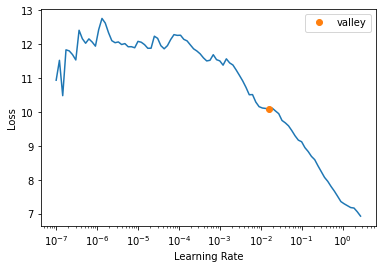

<Figure size 720x720 with 0 Axes>

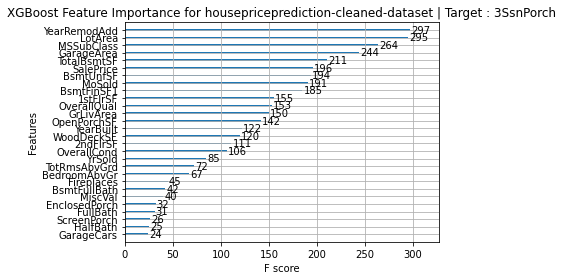

Target Variable: EnclosedPorch
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'SalePrice']
30
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', '

  5%|▍         | 2/42 [00:00<00:06,  5.93it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -1.1542342995831278, 'Adjusted R-Squared': -1.401847437466246, 'RMSE': 90.60323327030166, 'Time taken': 0.2520711421966553}
{'Model': 'BaggingRegressor', 'R-Squared': -0.07027682264190283, 'Adjusted R-Squared': -0.193297147083501, 'RMSE': 63.862407747341244, 'Time taken': 0.10882401466369629}
{'Model': 'BayesianRidge', 'R-Squared': 0.12763227800284926, 'Adjusted R-Squared': 0.02736012604915372, 'RMSE': 57.65633362096726, 'Time taken': 0.04418444633483887}


 10%|▉         | 4/42 [00:00<00:03,  9.76it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.7651869599837513, 'Adjusted R-Squared': -0.968082012855447, 'RMSE': 82.0148666777212, 'Time taken': 0.08026432991027832}
{'Model': 'DummyRegressor', 'R-Squared': -0.0015657455161210976, 'Adjusted R-Squared': -0.11668824500073272, 'RMSE': 61.778442, 'Time taken': 0.023288726806640625}
{'Model': 'ElasticNet', 'R-Squared': 0.09814805445864694, 'Adjusted R-Squared': -0.005513088707025826, 'RMSE': 58.62257, 'Time taken': 0.018452167510986328}


 17%|█▋        | 7/42 [00:00<00:03, 10.83it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.1275049288772534, 'Adjusted R-Squared': 0.027218139093029614, 'RMSE': 57.66054, 'Time taken': 0.20993685722351074}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.43556203030831364, 'Adjusted R-Squared': -0.6005691602288097, 'RMSE': 73.96192559929848, 'Time taken': 0.03078770637512207}


 21%|██▏       | 9/42 [00:01<00:04,  6.94it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.12024352924153714, 'Adjusted R-Squared': 0.019122095821024088, 'RMSE': 57.899986558661226, 'Time taken': 0.444943904876709}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:01<00:04,  7.64it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.08231015150080911, 'Adjusted R-Squared': -0.20671361719055747, 'RMSE': 64.22041296679355, 'Time taken': 0.19948911666870117}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.08321623296291625, 'Adjusted R-Squared': -0.022161211524104996, 'RMSE': 59.105879688477096, 'Time taken': 0.04750823974609375}


 31%|███       | 13/42 [00:02<00:05,  5.45it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.09670108281803869, 'Adjusted R-Squared': -0.0071263789270143985, 'RMSE': 58.669579132494384, 'Time taken': 0.535982608795166}


 33%|███▎      | 14/42 [00:02<00:07,  3.78it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.03847508047801973, 'Adjusted R-Squared': -0.072045025214162, 'RMSE': 60.53095140861761, 'Time taken': 0.6136491298675537}


 38%|███▊      | 16/42 [00:03<00:07,  3.41it/s]

{'Model': 'HuberRegressor', 'R-Squared': -0.10497006538550946, 'Adjusted R-Squared': -0.23197811887809694, 'RMSE': 64.88920963273777, 'Time taken': 0.6490142345428467}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.06656893123830421, 'Adjusted R-Squared': -0.1891630612656956, 'RMSE': 63.75169, 'Time taken': 0.11373209953308105}


 40%|████      | 17/42 [00:03<00:06,  3.88it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.013781297837295203, 'Adjusted R-Squared': -0.09957717367565944, 'RMSE': 61.3033, 'Time taken': 0.14883136749267578}
{'Model': 'Lars', 'R-Squared': 0.1278153257829978, 'Adjusted R-Squared': 0.027564213804031956, 'RMSE': 57.650284327017786, 'Time taken': 0.07137632369995117}


 45%|████▌     | 19/42 [00:03<00:04,  4.96it/s]

{'Model': 'LarsCV', 'R-Squared': 0.1174751657246651, 'Adjusted R-Squared': 0.01603552960106336, 'RMSE': 57.99101306285738, 'Time taken': 0.17121458053588867}
{'Model': 'Lasso', 'R-Squared': 0.11740794104794183, 'Adjusted R-Squared': 0.01596057795000405, 'RMSE': 57.99322, 'Time taken': 0.031558990478515625}


 55%|█████▍    | 23/42 [00:04<00:03,  6.05it/s]

{'Model': 'LassoCV', 'R-Squared': 0.11749773843233668, 'Adjusted R-Squared': 0.016060696872835067, 'RMSE': 57.990273, 'Time taken': 0.38770103454589844}
{'Model': 'LassoLars', 'R-Squared': -0.001565752901791173, 'Adjusted R-Squared': -0.11668825323533039, 'RMSE': 61.77844334444443, 'Time taken': 0.06514191627502441}
{'Model': 'LassoLarsCV', 'R-Squared': 0.11744224000247405, 'Adjusted R-Squared': 0.015998819313103207, 'RMSE': 57.99209483308223, 'Time taken': 0.10183167457580566}


 62%|██████▏   | 26/42 [00:04<00:01,  8.82it/s]

{'Model': 'LassoLarsIC', 'R-Squared': 0.11653736582882979, 'Adjusted R-Squared': 0.014989936613752697, 'RMSE': 58.021816460122714, 'Time taken': 0.03148937225341797}
{'Model': 'LinearRegression', 'R-Squared': 0.12781534430573604, 'Adjusted R-Squared': 0.02756423445582057, 'RMSE': 57.65028, 'Time taken': 0.03591752052307129}
{'Model': 'LinearSVR', 'R-Squared': -0.10492133321895558, 'Adjusted R-Squared': -0.23192378531308844, 'RMSE': 64.88777872219255, 'Time taken': 0.06001472473144531}
{'Model': 'MLPRegressor', 'R-Squared': 0.1368539329222196, 'Adjusted R-Squared': 0.03764174130408382, 'RMSE': 57.35078621910687, 'Time taken': 2.8948936462402344}


 76%|███████▌  | 32/42 [00:08<00:03,  3.07it/s]

{'Model': 'NuSVR', 'R-Squared': -0.10101067593072299, 'Adjusted R-Squared': -0.22756362718712797, 'RMSE': 64.77284801009009, 'Time taken': 0.4381062984466553}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.11016097165191752, 'Adjusted R-Squared': 0.007880623565931, 'RMSE': 58.23082632185649, 'Time taken': 0.019072294235229492}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.11466397631135328, 'Adjusted R-Squared': 0.012901214967830588, 'RMSE': 58.083301743198724, 'Time taken': 0.042980194091796875}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.04379469718078677, 'Adjusted R-Squared': -0.06611395831567468, 'RMSE': 60.36327605435973, 'Time taken': 0.02812933921813965}
{'Model': 'PoissonRegressor', 'R-Squared': 0.17851167421262304, 'Adjusted R-Squared': 0.08408772871982106, 'RMSE': 55.94972110324318, 'Time taken': 0.062430620193481445}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped becau

 88%|████████▊ | 37/42 [00:09<00:01,  3.55it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.07367266742638168, 'Adjusted R-Squared': -0.0328017386165631, 'RMSE': 59.41272436183928, 'Time taken': 1.0495357513427734}
{'Model': 'Ridge', 'R-Squared': 0.1273850607118706, 'Adjusted R-Squared': 0.027084492977602848, 'RMSE': 57.6645, 'Time taken': 0.029337167739868164}
{'Model': 'RidgeCV', 'R-Squared': 0.12679116883540864, 'Adjusted R-Squared': 0.0264223376670647, 'RMSE': 57.684122124473376, 'Time taken': 0.0663456916809082}
{'Model': 'SGDRegressor', 'R-Squared': 0.12736610333096632, 'Adjusted R-Squared': 0.027063356587399112, 'RMSE': 57.665128928749624, 'Time taken': 0.0724334716796875}


 93%|█████████▎| 39/42 [00:09<00:00,  4.28it/s]

{'Model': 'SVR', 'R-Squared': -0.09955353256721788, 'Adjusted R-Squared': -0.22593899608069123, 'RMSE': 64.72997168904566, 'Time taken': 0.14383554458618164}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.12781534430573604, 'Adjusted R-Squared': 0.02756423445582057, 'RMSE': 57.65028, 'Time taken': 0.020292997360229492}
{'Model': 'TweedieRegressor', 'R-Squared': 0.08321623296291625, 'Adjusted R-Squared': -0.022161211524104996, 'RMSE': 59.105879688477096, 'Time taken': 0.0668478012084961}


 98%|█████████▊| 41/42 [00:09<00:00,  4.58it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.019529307565558263, 'Adjusted R-Squared': -0.09316847317403276, 'RMSE': 61.12439, 'Time taken': 0.2815821170806885}


100%|██████████| 42/42 [00:10<00:00,  4.12it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.07236265445252754, 'Adjusted R-Squared': -0.03426232779430838, 'RMSE': 59.45472028439649, 'Time taken': 0.20786762237548828}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: EnclosedPorch
EnclosedPorch
Target Standard Deviation: 60.92941665649414
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
PoissonRegressor                             0.08       0.18 55.95        0.06
MLPRegressor                                 0.04       0.14 57.35        2.89
LinearRegression                             0.03       0.13 57.65        0.04
TransformedTargetRegressor                   0.03       0.13 57.65        0.02
Lars                                         0.03       0.13 57.65        0.07
BayesianRidge                                0.03       0.13 57.66        0.04
ElasticNetCV                         

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,4020.502197,4050.264893,63.641693,00:00
1,3827.975342,3820.526855,61.810413,00:00
2,3766.075195,3880.929688,62.297108,00:01


Better model found at epoch 0 with _rmse value: 63.641693115234375.
Better model found at epoch 1 with _rmse value: 61.8104133605957.
No improvement since epoch 1: early stopping


,MSSubClass,OverallQual,OverallCond,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,LotArea,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,SalePrice,EnclosedPorch,EnclosedPorch_pred
0,1.00,7.00,5.00,51.00,1.00,3.00,1.00,4.00,2.00,5.00,1.00,3.00,1.00,1.00,1.00,7.00,3.00,-0.11,0.91,-0.95,2.01,0.92,0.82,-0.80,-0.07,0.48,0.21,-0.33,-0.27,0.12,0.00,18.34
1,1.00,5.00,6.00,38.00,2.00,2.00,2.00,4.00,2.00,5.00,2.00,3.00,1.00,1.00,1.00,11.00,1.00,0.35,-0.50,1.18,-0.83,0.29,0.71,-0.80,-0.15,0.48,1.67,-0.71,-0.27,-0.16,0.00,18.62
2,8.00,6.00,6.00,52.00,1.00,3.00,1.00,4.00,2.00,8.00,2.00,1.00,1.00,1.00,1.00,6.00,3.00,-0.41,-1.88,-0.95,0.38,-0.71,-1.07,0.90,-0.06,-2.19,-0.75,3.74,-0.27,-0.65,134.00,24.25
3,2.00,5.00,7.00,57.00,2.00,2.00,1.00,3.00,2.00,4.00,1.00,3.00,1.00,1.00,1.00,8.00,4.00,0.27,-1.65,0.58,-0.91,-0.41,-0.50,-0.80,-1.03,-0.19,-0.75,-0.71,-0.27,-0.21,44.00,19.39
4,5.00,6.00,8.00,56.00,1.00,2.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,1.00,1.00,9.00,4.00,-0.09,-0.70,-0.70,0.37,-0.45,-0.12,0.47,0.28,-0.94,-0.75,-0.71,-0.27,-0.50,0.00,19.13
5,13.00,7.00,5.00,55.00,1.00,3.00,1.00,4.00,2.00,6.00,1.00,3.00,1.00,1.00,1.00,4.00,1.00,-0.69,1.07,-0.95,0.91,-0.18,-0.47,0.87,0.36,-0.43,-0.75,-0.10,-0.27,-0.62,0.00,18.23
6,7.00,7.00,5.00,21.00,2.00,2.00,1.00,4.00,2.00,6.00,2.00,4.00,1.00,1.00,1.00,2.00,1.00,-0.10,-1.85,-0.49,-0.07,-0.68,-0.51,0.93,0.38,0.79,-0.75,-0.17,-0.27,-0.50,272.00,19.82
7,1.00,5.00,6.00,57.00,1.00,2.00,1.00,4.00,2.00,6.00,2.00,2.00,9.00,1.00,1.00,6.00,2.00,-0.14,-0.47,-0.95,-1.28,-2.37,0.46,-0.80,-0.33,-1.02,0.17,-0.71,-0.27,-0.75,0.00,18.34
8,5.00,5.00,5.00,9.00,2.00,3.00,1.00,5.00,2.00,7.00,2.00,3.00,1.00,1.00,1.00,7.00,1.00,0.30,-0.43,-0.83,-0.04,-0.01,0.23,0.73,0.75,-0.10,-0.75,-0.71,-0.27,-0.10,0.00,18.47


<Figure size 432x288 with 0 Axes>

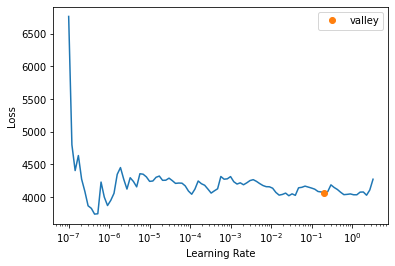

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.00      35.83
1  196.00     171.77
2    0.00       1.09
3    0.00      23.47
4    0.00      -2.98
XGBoost RMSE:  61.252792


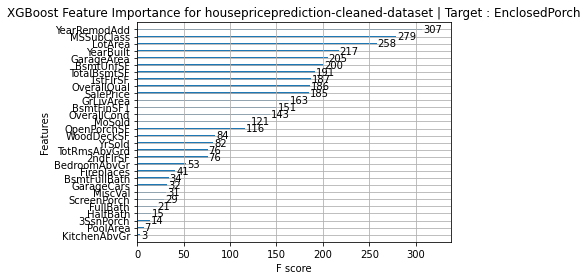

Target Variable: OpenPorchSF
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
30
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch',

  5%|▍         | 2/42 [00:00<00:07,  5.11it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -1.0276100909307209, 'Adjusted R-Squared': -1.2606687220721833, 'RMSE': 85.65373027464656, 'Time taken': 0.24634695053100586}
{'Model': 'BaggingRegressor', 'R-Squared': -0.0046075536721015276, 'Adjusted R-Squared': -0.12007968627809018, 'RMSE': 60.29097112031068, 'Time taken': 0.1585235595703125}
{'Model': 'BayesianRidge', 'R-Squared': 0.12001217253840535, 'Adjusted R-Squared': 0.0188641463933944, 'RMSE': 56.42770561207128, 'Time taken': 0.022106409072875977}


 12%|█▏        | 5/42 [00:00<00:03, 12.10it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.7302457464944974, 'Adjusted R-Squared': -0.9291245679306466, 'RMSE': 79.12394906138402, 'Time taken': 0.06535053253173828}
{'Model': 'DummyRegressor', 'R-Squared': -0.002594980699604399, 'Adjusted R-Squared': -0.11783578307886944, 'RMSE': 60.230545, 'Time taken': 0.02360677719116211}
{'Model': 'ElasticNet', 'R-Squared': 0.12207870334755566, 'Adjusted R-Squared': 0.021168209479458522, 'RMSE': 56.36141, 'Time taken': 0.026745319366455078}


 17%|█▋        | 7/42 [00:00<00:03, 10.21it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.12174318836660891, 'Adjusted R-Squared': 0.020794129558173058, 'RMSE': 56.372177, 'Time taken': 0.2082364559173584}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.806432230984677, 'Adjusted R-Squared': -1.0140681196036057, 'RMSE': 80.84718376843853, 'Time taken': 0.034810543060302734}


 21%|██▏       | 9/42 [00:01<00:06,  5.14it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.06364364549030466, 'Adjusted R-Squared': -0.043983521694717975, 'RMSE': 58.20692285122294, 'Time taken': 0.6826069355010986}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:01<00:05,  6.10it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.29080701044499024, 'Adjusted R-Squared': -0.43917563233521917, 'RMSE': 68.34153312998971, 'Time taken': 0.1995089054107666}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.12447024416828456, 'Adjusted R-Squared': 0.023834640049696487, 'RMSE': 56.284591038077394, 'Time taken': 0.03260397911071777}


 31%|███       | 13/42 [00:02<00:05,  4.97it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.1376268480757088, 'Adjusted R-Squared': 0.03850349727981317, 'RMSE': 55.86009541358051, 'Time taken': 0.5199661254882812}


 33%|███▎      | 14/42 [00:02<00:08,  3.47it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.05372959274553579, 'Adjusted R-Squared': -0.05503712073198885, 'RMSE': 58.51425619304233, 'Time taken': 0.6535563468933105}


 36%|███▌      | 15/42 [00:03<00:08,  3.27it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.09160502720402042, 'Adjusted R-Squared': -0.012808188059885373, 'RMSE': 57.331251286415494, 'Time taken': 0.3675551414489746}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.0835924318707606, 'Adjusted R-Squared': -0.20814328610877908, 'RMSE': 62.61625, 'Time taken': 0.09443378448486328}


 40%|████      | 17/42 [00:03<00:05,  4.28it/s]

{'Model': 'KernelRidge', 'R-Squared': -0.4446119835089639, 'Adjusted R-Squared': -0.6106593379352818, 'RMSE': 72.29856, 'Time taken': 0.12987208366394043}
{'Model': 'Lars', 'R-Squared': 0.10999756487040968, 'Adjusted R-Squared': 0.007698434395744025, 'RMSE': 56.7478820002083, 'Time taken': 0.07595205307006836}


 45%|████▌     | 19/42 [00:03<00:04,  5.05it/s]

{'Model': 'LarsCV', 'R-Squared': 0.10924219639144472, 'Adjusted R-Squared': 0.0068562419536797314, 'RMSE': 56.77195860280772, 'Time taken': 0.1815345287322998}
{'Model': 'Lasso', 'R-Squared': 0.11391662219983334, 'Adjusted R-Squared': 0.0120679580848716, 'RMSE': 56.622803, 'Time taken': 0.060617923736572266}


 50%|█████     | 21/42 [00:04<00:04,  4.48it/s]

{'Model': 'LassoCV', 'R-Squared': 0.11278255464415354, 'Adjusted R-Squared': 0.01080353793658495, 'RMSE': 56.659027, 'Time taken': 0.48122572898864746}
{'Model': 'LassoLars', 'R-Squared': -0.002594981090062509, 'Adjusted R-Squared': -0.11783578351420765, 'RMSE': 60.23054912403648, 'Time taken': 0.05273771286010742}


 60%|█████▉    | 25/42 [00:04<00:02,  6.60it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.10996304088673459, 'Adjusted R-Squared': 0.007659942138083298, 'RMSE': 56.74898263986691, 'Time taken': 0.22118306159973145}
{'Model': 'LassoLarsIC', 'R-Squared': 0.11782892645124687, 'Adjusted R-Squared': 0.016429952480125798, 'RMSE': 56.49766069915546, 'Time taken': 0.05353593826293945}
{'Model': 'LinearRegression', 'R-Squared': 0.10999721826352493, 'Adjusted R-Squared': 0.007698047948987541, 'RMSE': 56.747894, 'Time taken': 0.05594635009765625}
{'Model': 'LinearSVR', 'R-Squared': 0.04483297558753363, 'Adjusted R-Squared': -0.06495633756332464, 'RMSE': 58.78868148369979, 'Time taken': 0.07828140258789062}


 67%|██████▋   | 28/42 [00:07<00:06,  2.03it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.11183249674303453, 'Adjusted R-Squared': 0.009744277977866034, 'RMSE': 56.68935282123741, 'Time taken': 2.8562071323394775}
{'Model': 'NuSVR', 'R-Squared': 0.0671856472133785, 'Adjusted R-Squared': -0.040034393336807916, 'RMSE': 58.09672743196346, 'Time taken': 0.18250131607055664}


 74%|███████▍  | 31/42 [00:07<00:03,  3.38it/s]

{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.10455007935537663, 'Adjusted R-Squared': 0.0016248011203623403, 'RMSE': 56.92128696127105, 'Time taken': 0.024283647537231445}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.09853408637194183, 'Adjusted R-Squared': -0.005082685309444335, 'RMSE': 57.11217693730523, 'Time taken': 0.06780767440795898}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.017077592197205727, 'Adjusted R-Squared': -0.09590199490656381, 'RMSE': 59.63671012483026, 'Time taken': 0.03348350524902344}
{'Model': 'PoissonRegressor', 'R-Squared': 0.1135886238367485, 'Adjusted R-Squared': 0.011702258760512674, 'RMSE': 56.633280646031835, 'Time taken': 0.1636948585510254}


 79%|███████▊  | 33/42 [00:08<00:02,  3.68it/s]

{'Model': 'RANSACRegressor', 'R-Squared': -0.5298730560164093, 'Adjusted R-Squared': -0.705720533719445, 'RMSE': 74.40151, 'Time taken': 0.25682687759399414}


 88%|████████▊ | 37/42 [00:10<00:01,  3.32it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.05514025885756724, 'Adjusted R-Squared': -0.05346430908983901, 'RMSE': 58.47062444463207, 'Time taken': 1.4643731117248535}
{'Model': 'Ridge', 'R-Squared': 0.11007248191808494, 'Adjusted R-Squared': 0.007781962598324532, 'RMSE': 56.745495, 'Time taken': 0.0361788272857666}
{'Model': 'RidgeCV', 'R-Squared': 0.11088757959330453, 'Adjusted R-Squared': 0.008690749661500408, 'RMSE': 56.71950057023485, 'Time taken': 0.057489633560180664}
{'Model': 'SGDRegressor', 'R-Squared': 0.1093936020720997, 'Adjusted R-Squared': 0.007025050586134118, 'RMSE': 56.76713351888051, 'Time taken': 0.08752894401550293}


 90%|█████████ | 38/42 [00:10<00:01,  3.56it/s]

{'Model': 'SVR', 'R-Squared': -0.01294661876126324, 'Adjusted R-Squared': -0.12937726459589127, 'RMSE': 60.54068618929037, 'Time taken': 0.16922402381896973}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.10999721826352493, 'Adjusted R-Squared': 0.007698047948987541, 'RMSE': 56.747894, 'Time taken': 0.01946878433227539}
{'Model': 'TweedieRegressor', 'R-Squared': 0.12447024416828456, 'Adjusted R-Squared': 0.023834640049696487, 'RMSE': 56.284591038077394, 'Time taken': 0.05507922172546387}


 98%|█████████▊| 41/42 [00:10<00:00,  4.54it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.017044560070490156, 'Adjusted R-Squared': -0.09593882382945362, 'RMSE': 59.63771, 'Time taken': 0.33255529403686523}


100%|██████████| 42/42 [00:10<00:00,  3.83it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.06338415712000056, 'Adjusted R-Squared': -0.0442728363144822, 'RMSE': 58.214987608404044, 'Time taken': 0.3235464096069336}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: OpenPorchSF
OpenPorchSF
Target Standard Deviation: 67.65432739257812
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.04       0.14 55.86        0.52
TweedieRegressor                             0.02       0.12 56.28        0.06
GeneralizedLinearRegressor                   0.02       0.12 56.28        0.03
ElasticNet                                   0.02       0.12 56.36        0.03
ElasticNetCV                                 0.02       0.12 56.37        0.21
BayesianRidge                                0.02       0.12 56.43        0.02
LassoLarsIC                               

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,6393.628418,4985.023926,70.604698,00:00
1,5485.099609,3581.201904,59.843143,00:01
2,5065.691406,3572.121094,59.767223,00:00
3,4769.014160,3687.497070,60.724762,00:00


Better model found at epoch 0 with _rmse value: 70.60469818115234.
Better model found at epoch 1 with _rmse value: 59.843143463134766.
Better model found at epoch 2 with _rmse value: 59.7672233581543.
No improvement since epoch 2: early stopping


,MSSubClass,OverallQual,OverallCond,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,LotArea,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,EnclosedPorch,ScreenPorch,SalePrice,OpenPorchSF,OpenPorchSF_pred
0,5.00,5.00,5.00,9.00,2.00,3.00,1.00,5.00,2.00,6.00,2.00,3.00,1.00,1.00,1.00,7.00,1.00,0.32,-0.44,-0.86,-0.02,-0.02,0.22,0.72,0.74,-0.12,-0.74,-0.37,-0.26,-0.11,0.00,54.22
1,6.00,7.00,5.00,48.00,2.00,3.00,2.00,4.00,2.00,5.00,1.00,3.00,1.00,1.00,1.00,4.00,5.00,0.35,0.82,1.62,-1.05,0.56,0.36,1.37,1.37,0.26,1.63,-0.37,-0.26,1.83,44.00,45.50
2,5.00,6.00,5.00,1.00,1.00,2.00,1.00,3.00,2.00,3.00,1.00,1.00,1.00,1.00,1.00,4.00,3.00,-0.09,-1.57,-0.98,0.02,-1.12,-1.51,0.39,-0.79,-2.22,-0.74,1.66,-0.26,-1.27,8.00,33.00
3,12.00,8.00,5.00,52.00,2.00,3.00,1.00,3.00,2.00,4.00,1.00,3.00,1.00,1.00,1.00,4.00,5.00,-0.57,0.99,0.35,0.37,0.64,0.44,-0.80,-0.34,0.49,-0.74,2.32,-0.26,0.40,0.00,46.81
4,1.00,5.00,5.00,1.00,2.00,2.00,1.00,4.00,2.00,5.00,3.00,3.00,1.00,1.00,1.00,6.00,5.00,4.75,-0.77,-0.21,-1.16,-0.72,1.33,-0.80,0.31,0.44,-0.74,0.42,-0.26,-0.26,0.00,46.09
5,5.00,5.00,6.00,46.00,1.00,2.00,1.00,4.00,2.00,4.00,1.00,2.00,1.00,1.00,1.00,5.00,3.00,0.13,-0.84,-0.22,-0.34,-0.67,-1.01,0.18,-0.59,-1.10,-0.74,-0.37,-0.26,-0.63,0.00,33.68
6,1.00,9.00,5.00,58.00,1.00,3.00,1.00,3.00,2.00,5.00,1.00,3.00,1.00,1.00,1.00,5.00,4.00,0.14,1.18,-0.98,2.86,1.69,1.62,-0.80,0.52,1.05,1.57,-0.37,-0.26,0.72,136.00,41.40
7,5.00,4.00,5.00,40.00,2.00,2.00,1.00,6.00,2.00,6.00,3.00,2.00,1.00,1.00,1.00,11.00,4.00,0.07,-0.47,-0.98,1.25,0.10,-0.15,0.75,0.49,-0.81,0.23,-0.37,-0.26,-0.24,0.00,35.94
8,1.00,8.00,5.00,57.00,2.00,3.00,1.00,4.00,2.00,6.00,2.00,3.00,1.00,1.00,1.00,5.00,1.00,-0.04,1.15,1.66,-0.28,1.37,1.26,-0.80,0.26,0.11,1.84,-0.37,-0.26,1.36,50.00,41.57


<Figure size 432x288 with 0 Axes>

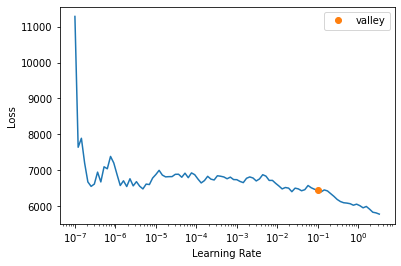

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   28.00      36.35
1   74.00     161.12
2   11.00     -16.38
3   82.00      77.13
4    0.00       0.08
XGBoost RMSE:  59.59223


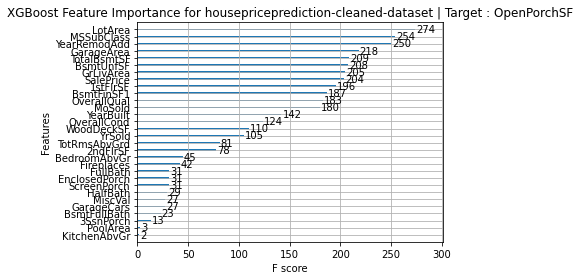

Target Variable: WoodDeckSF
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
30
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch'

  5%|▍         | 2/42 [00:00<00:05,  6.67it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.11237551212878727, 'Adjusted R-Squared': -0.24023476639646413, 'RMSE': 139.66717772614777, 'Time taken': 0.16204524040222168}
{'Model': 'BaggingRegressor', 'R-Squared': 0.1307479983877341, 'Adjusted R-Squared': 0.030833975213910403, 'RMSE': 123.46432807989189, 'Time taken': 0.13961291313171387}
{'Model': 'BayesianRidge', 'R-Squared': 0.1255058559367228, 'Adjusted R-Squared': 0.024989287653587433, 'RMSE': 123.83605270176736, 'Time taken': 0.04463815689086914}


 10%|▉         | 4/42 [00:00<00:03,  9.59it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.7144899541440097, 'Adjusted R-Squared': -0.9115577649651605, 'RMSE': 173.39482027624163, 'Time taken': 0.10778069496154785}
{'Model': 'DummyRegressor', 'R-Squared': -0.001903386312757771, 'Adjusted R-Squared': -0.11706469508433925, 'RMSE': 132.55055, 'Time taken': 0.0134124755859375}
{'Model': 'ElasticNet', 'R-Squared': 0.12940697911477783, 'Adjusted R-Squared': 0.029338815794637263, 'RMSE': 123.55952, 'Time taken': 0.023471832275390625}


 17%|█▋        | 7/42 [00:00<00:03,  9.15it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.12888606600645014, 'Adjusted R-Squared': 0.028758027616386905, 'RMSE': 123.59649, 'Time taken': 0.2943875789642334}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.4781973389788088, 'Adjusted R-Squared': -0.6481050790913157, 'RMSE': 161.0033289028777, 'Time taken': 0.06056571006774902}


 21%|██▏       | 9/42 [00:01<00:06,  5.17it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.13016838087794935, 'Adjusted R-Squared': 0.030187735001851457, 'RMSE': 123.50548424681836, 'Time taken': 0.6318976879119873}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:01<00:05,  6.02it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.3590332511949381, 'Adjusted R-Squared': -0.5152439697230919, 'RMSE': 154.37738809828454, 'Time taken': 0.21007490158081055}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.12668932065969718, 'Adjusted R-Squared': 0.026308782804489894, 'RMSE': 123.75222983211323, 'Time taken': 0.06954622268676758}


 31%|███       | 13/42 [00:02<00:06,  4.81it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.17877198824395457, 'Adjusted R-Squared': 0.08437796390417918, 'RMSE': 120.00532703574967, 'Time taken': 0.5174391269683838}


 33%|███▎      | 14/42 [00:02<00:08,  3.46it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.09110336278570363, 'Adjusted R-Squared': -0.013367515055020096, 'RMSE': 126.24840377865848, 'Time taken': 0.6368517875671387}


 36%|███▌      | 15/42 [00:03<00:07,  3.48it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.11028294641322833, 'Adjusted R-Squared': 0.008016618414748766, 'RMSE': 124.90925123584559, 'Time taken': 0.2801539897918701}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.032425434597334046, 'Adjusted R-Squared': -0.15109502478093573, 'RMSE': 134.55443, 'Time taken': 0.09410905838012695}
{'Model': 'KernelRidge', 'R-Squared': -0.4076953759002333, 'Adjusted R-Squared': -0.5694994420956625, 'RMSE': 157.11693, 'Time taken': 0.10255575180053711}


 45%|████▌     | 19/42 [00:03<00:04,  5.72it/s]

{'Model': 'Lars', 'R-Squared': 0.04606235569119954, 'Adjusted R-Squared': -0.06358564940176614, 'RMSE': 129.3387445748302, 'Time taken': 0.08001112937927246}
{'Model': 'LarsCV', 'R-Squared': 0.11050748709564284, 'Adjusted R-Squared': 0.008266968371004046, 'RMSE': 124.8934883715658, 'Time taken': 0.1080329418182373}
{'Model': 'Lasso', 'R-Squared': 0.12120533776273379, 'Adjusted R-Squared': 0.02019445704580658, 'RMSE': 124.140175, 'Time taken': 0.037122488021850586}


 55%|█████▍    | 23/42 [00:04<00:02,  6.71it/s]

{'Model': 'LassoCV', 'R-Squared': 0.12701118111239373, 'Adjusted R-Squared': 0.026667638711519337, 'RMSE': 123.729416, 'Time taken': 0.3114795684814453}
{'Model': 'LassoLars', 'R-Squared': 0.025007407752009714, 'Adjusted R-Squared': -0.08706070629948348, 'RMSE': 130.75831201451584, 'Time taken': 0.06902122497558594}
{'Model': 'LassoLarsCV', 'R-Squared': 0.12779385022278178, 'Adjusted R-Squared': 0.027540269788618676, 'RMSE': 123.67394655540708, 'Time taken': 0.11455774307250977}


 60%|█████▉    | 25/42 [00:04<00:02,  8.33it/s]

{'Model': 'LassoLarsIC', 'R-Squared': 0.11995821382410432, 'Adjusted R-Squared': 0.018803985528024314, 'RMSE': 124.22822913783965, 'Time taken': 0.0449070930480957}
{'Model': 'LinearRegression', 'R-Squared': 0.11143878271858376, 'Adjusted R-Squared': 0.009305309467846246, 'RMSE': 124.82809, 'Time taken': 0.0588834285736084}
{'Model': 'LinearSVR', 'R-Squared': 0.03132357187630208, 'Adjusted R-Squared': -0.08001854629883565, 'RMSE': 130.33408680464248, 'Time taken': 0.06252670288085938}


 67%|██████▋   | 28/42 [00:07<00:07,  1.97it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.11095896228267621, 'Adjusted R-Squared': 0.008770337257696381, 'RMSE': 124.86178857255216, 'Time taken': 3.108552932739258}
{'Model': 'NuSVR', 'R-Squared': 0.0019346198046279461, 'Adjusted R-Squared': -0.11278553883851838, 'RMSE': 132.29643557785153, 'Time taken': 0.18940448760986328}


 76%|███████▌  | 32/42 [00:07<00:02,  3.68it/s]

{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.13227605316685975, 'Adjusted R-Squared': 0.03253766847339523, 'RMSE': 123.35576161098227, 'Time taken': 0.017409086227416992}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.14152024673873054, 'Adjusted R-Squared': 0.04284441303053854, 'RMSE': 122.69692425454241, 'Time taken': 0.045275211334228516}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.15166801907416683, 'Adjusted R-Squared': 0.05415859597924344, 'RMSE': 121.9695909505774, 'Time taken': 0.032631635665893555}
{'Model': 'PoissonRegressor', 'R-Squared': 0.03512280388820099, 'Adjusted R-Squared': -0.07578262095223565, 'RMSE': 130.07824496769916, 'Time taken': 0.0825507640838623}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 37/42 [00:09<00:01,  3.81it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.16139597167117858, 'Adjusted R-Squared': 0.06500470404717607, 'RMSE': 121.26825258604978, 'Time taken': 1.2547998428344727}
{'Model': 'Ridge', 'R-Squared': 0.11165963268432377, 'Adjusted R-Squared': 0.00955154448711959, 'RMSE': 124.81257, 'Time taken': 0.03194260597229004}
{'Model': 'RidgeCV', 'R-Squared': 0.11311791216236544, 'Adjusted R-Squared': 0.011177442295970619, 'RMSE': 124.71008905175314, 'Time taken': 0.029926061630249023}
{'Model': 'SGDRegressor', 'R-Squared': 0.10864722913568459, 'Adjusted R-Squared': 0.006192887657027524, 'RMSE': 125.02401940765337, 'Time taken': 0.03705167770385742}


 93%|█████████▎| 39/42 [00:09<00:00,  4.53it/s]

{'Model': 'SVR', 'R-Squared': -0.23964843623530774, 'Adjusted R-Squared': -0.3821367622393661, 'RMSE': 147.44088056675702, 'Time taken': 0.17483067512512207}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.11143878271858376, 'Adjusted R-Squared': 0.009305309467846246, 'RMSE': 124.82809, 'Time taken': 0.019839048385620117}
{'Model': 'TweedieRegressor', 'R-Squared': 0.12668932065969718, 'Adjusted R-Squared': 0.026308782804489894, 'RMSE': 123.75222983211323, 'Time taken': 0.03494524955749512}


 98%|█████████▊| 41/42 [00:09<00:00,  4.87it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.027004498623392936, 'Adjusted R-Squared': -0.08483406475322863, 'RMSE': 130.62433, 'Time taken': 0.2835984230041504}
{'Model': 'LGBMRegressor', 'R-Squared': 0.10240986977136446, 'Adjusted R-Squared': -0.0007614095652603847, 'RMSE': 125.46069290720095, 'Time taken': 0.19654321670532227}


100%|██████████| 42/42 [00:10<00:00,  4.15it/s]

Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: WoodDeckSF
WoodDeckSF
Target Standard Deviation: 123.42233276367188
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
GradientBoostingRegressor                    0.08       0.18 120.01   
RandomForestRegressor                        0.07       0.16 121.27   
PassiveAggressiveRegressor                   0.05       0.15 121.97   
OrthogonalMatchingPursuitCV                  0.04       0.14 122.70   
OrthogonalMatchingPursuit                    0.03       0.13 123.36   
BaggingRegressor                             0.03       0.13 123.46   
ExtraTreesRegressor                          0.03       0.13 123.51   
ElasticNet                                   0.03       0.13 123.56   
ElasticNetCV                                 0.03       0.13 123.60   
LassoLarsCV                                  0.03       0.13

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,22871.113281,25814.460938,160.668793,00:00
1,20241.591797,18501.076172,136.018661,00:00
2,18049.275391,17717.515625,133.107162,00:01
3,16850.000000,18369.304688,135.533386,00:00


Better model found at epoch 0 with _rmse value: 160.66879272460938.
Better model found at epoch 1 with _rmse value: 136.01866149902344.
Better model found at epoch 2 with _rmse value: 133.10716247558594.
No improvement since epoch 2: early stopping


,MSSubClass,OverallQual,OverallCond,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,LotArea,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,WoodDeckSF,WoodDeckSF_pred
0,1.00,3.00,6.00,1.00,1.00,2.00,1.00,3.00,2.00,3.00,1.00,2.00,1.00,1.00,1.00,7.00,3.00,-0.37,-0.71,-0.96,-1.26,-2.37,-1.13,-0.81,-1.55,-0.86,-0.72,-0.36,-0.28,-1.40,0.00,58.89
1,6.00,10.00,5.00,59.00,2.00,3.00,2.00,4.00,2.00,8.00,2.00,4.00,1.00,1.00,1.00,8.00,3.00,0.17,1.18,1.83,-0.37,1.43,1.51,0.54,1.58,1.75,1.34,-0.36,-0.28,3.21,196.00,354.71
2,12.00,7.00,5.00,37.00,2.00,2.00,2.00,3.00,2.00,5.00,2.00,3.00,1.00,1.00,1.00,12.00,1.00,-0.49,0.50,1.40,-0.44,0.91,0.76,-0.81,-0.12,-0.12,0.51,-0.36,3.11,0.13,0.00,106.87
3,6.00,6.00,5.00,40.00,1.00,3.00,2.00,5.00,2.00,7.00,2.00,3.00,1.00,1.00,1.00,9.00,2.00,-0.05,0.56,0.85,-0.55,0.23,0.02,1.25,1.05,0.23,2.79,-0.36,3.26,0.41,0.00,74.87
4,1.00,9.00,5.00,57.00,2.00,3.00,1.00,4.00,2.00,7.00,2.00,4.00,1.00,1.00,1.00,7.00,2.00,0.33,1.12,1.77,0.24,1.97,1.97,-0.81,0.79,0.96,0.06,-0.36,-0.28,2.58,178.00,59.99
5,2.00,6.00,5.00,1.00,1.00,2.00,1.00,3.00,2.00,5.00,2.00,2.00,1.00,1.00,1.00,5.00,2.00,-0.22,-1.66,-0.96,0.99,-0.09,-0.38,-0.81,-0.98,-0.76,-0.38,1.47,-0.28,-0.80,0.00,66.44
6,1.00,7.00,5.00,50.00,2.00,3.00,1.00,4.00,2.00,6.00,2.00,3.00,1.00,1.00,1.00,6.00,4.00,-0.04,0.89,-0.65,-0.42,1.35,1.35,-0.81,0.32,0.52,0.40,-0.36,-0.28,0.44,78.00,72.50
7,9.00,5.00,4.00,9.00,1.00,2.00,1.00,4.00,2.00,5.00,1.00,2.00,1.00,1.00,1.00,7.00,1.00,-0.34,-0.42,-0.31,-0.22,0.03,0.50,-0.81,-0.32,-0.86,-0.72,4.44,-0.28,-0.65,168.00,59.96
8,2.00,4.00,5.00,4.00,1.00,2.00,1.00,2.00,2.00,4.00,1.00,3.00,1.00,1.00,1.00,6.00,1.00,-0.44,-1.46,-0.96,0.07,-1.02,-1.06,-0.81,-1.49,0.26,-0.72,0.16,-0.28,-1.30,0.00,61.51


<Figure size 432x288 with 0 Axes>

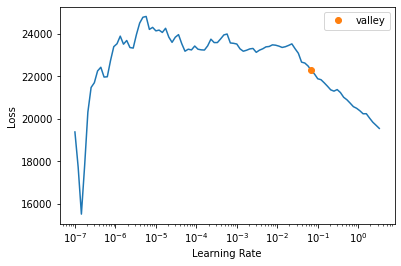

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  199.00     100.20
1  503.00     265.65
2  120.00      57.03
3    0.00      83.34
4    0.00      85.45
XGBoost RMSE:  130.66187


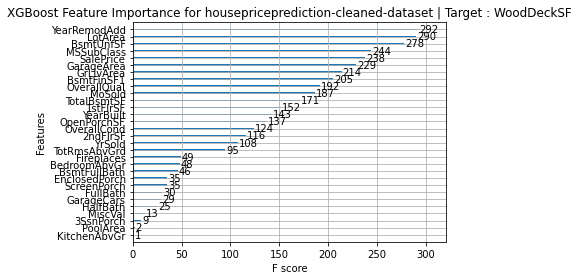

Target Variable: GarageArea
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
30
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch'

  5%|▍         | 2/42 [00:00<00:07,  5.55it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5869576812258374, 'Adjusted R-Squared': 0.539481552631106, 'RMSE': 130.28574152603173, 'Time taken': 0.23206019401550293}
{'Model': 'BaggingRegressor', 'R-Squared': 0.770501153792923, 'Adjusted R-Squared': 0.7441219760679716, 'RMSE': 97.11579446334449, 'Time taken': 0.14277124404907227}
{'Model': 'BayesianRidge', 'R-Squared': 0.7559078482354056, 'Adjusted R-Squared': 0.7278512790670614, 'RMSE': 100.15589633755005, 'Time taken': 0.02468395233154297}


 10%|▉         | 4/42 [00:00<00:03,  9.76it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.6183257325182414, 'Adjusted R-Squared': 0.574455127060568, 'RMSE': 125.24086382887472, 'Time taken': 0.0861506462097168}
{'Model': 'DummyRegressor', 'R-Squared': -0.010518564821223375, 'Adjusted R-Squared': -0.1266701239960768, 'RMSE': 203.78479, 'Time taken': 0.029029369354248047}
{'Model': 'ElasticNet', 'R-Squared': 0.6816520064571613, 'Adjusted R-Squared': 0.6450602830614327, 'RMSE': 114.38015, 'Time taken': 0.019587039947509766}


 17%|█▋        | 7/42 [00:00<00:03, 10.29it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7410336874156923, 'Adjusted R-Squared': 0.7112674445899099, 'RMSE': 103.16235, 'Time taken': 0.22841191291809082}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.5482338670402, 'Adjusted R-Squared': 0.49630672532068276, 'RMSE': 136.25625535470903, 'Time taken': 0.03660154342651367}


 21%|██▏       | 9/42 [00:01<00:06,  4.97it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.7815013282227958, 'Adjusted R-Squared': 0.756386538363347, 'RMSE': 94.75977365827296, 'Time taken': 0.7421982288360596}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:01<00:05,  5.88it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -3.8702687412393058, 'Adjusted R-Squared': -4.4300697459794565, 'RMSE': 447.37949728469033, 'Time taken': 0.20673704147338867}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.6118947668653084, 'Adjusted R-Squared': 0.5672849699532749, 'RMSE': 126.29157034234996, 'Time taken': 0.07193303108215332}


 31%|███       | 13/42 [00:02<00:06,  4.77it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.7591080903264599, 'Adjusted R-Squared': 0.7314193650766276, 'RMSE': 99.49716840445979, 'Time taken': 0.5079047679901123}


 36%|███▌      | 15/42 [00:03<00:06,  3.86it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.7852913071472856, 'Adjusted R-Squared': 0.7606121470492724, 'RMSE': 93.93434859678578, 'Time taken': 0.618793249130249}
{'Model': 'HuberRegressor', 'R-Squared': 0.7619602824263095, 'Adjusted R-Squared': 0.7345993953488739, 'RMSE': 98.90638463506963, 'Time taken': 0.15147185325622559}


 40%|████      | 17/42 [00:03<00:05,  4.96it/s]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5392878095709426, 'Adjusted R-Squared': 0.4863323853836946, 'RMSE': 137.59874, 'Time taken': 0.0794529914855957}
{'Model': 'KernelRidge', 'R-Squared': -4.383655383300752, 'Adjusted R-Squared': -5.00246634689854, 'RMSE': 470.3685, 'Time taken': 0.12420296669006348}


 45%|████▌     | 19/42 [00:03<00:03,  6.03it/s]

{'Model': 'Lars', 'R-Squared': 0.7107295458202153, 'Adjusted R-Squared': 0.677480068328286, 'RMSE': 109.0314161125041, 'Time taken': 0.08783841133117676}
{'Model': 'LarsCV', 'R-Squared': 0.7648191274420774, 'Adjusted R-Squared': 0.7377868432400172, 'RMSE': 98.31066022882274, 'Time taken': 0.10231733322143555}
{'Model': 'Lasso', 'R-Squared': 0.7641419130164276, 'Adjusted R-Squared': 0.7370317880757871, 'RMSE': 98.4521, 'Time taken': 0.0361332893371582}


 50%|█████     | 21/42 [00:03<00:03,  5.58it/s]

{'Model': 'LassoCV', 'R-Squared': 0.76658324666748, 'Adjusted R-Squared': 0.7397537347901788, 'RMSE': 97.941246, 'Time taken': 0.3709557056427002}
{'Model': 'LassoLars', 'R-Squared': 0.7457759581365428, 'Adjusted R-Squared': 0.7165548038993639, 'RMSE': 102.21342091653759, 'Time taken': 0.043189287185668945}
{'Model': 'LassoLarsCV', 'R-Squared': 0.765450375932148, 'Adjusted R-Squared': 0.7384906490277972, 'RMSE': 98.17863385721479, 'Time taken': 0.15589642524719238}


 62%|██████▏   | 26/42 [00:04<00:01,  9.22it/s]

{'Model': 'LassoLarsIC', 'R-Squared': 0.7660000502557629, 'Adjusted R-Squared': 0.7391035043081494, 'RMSE': 98.06352403901272, 'Time taken': 0.04384160041809082}
{'Model': 'LinearRegression', 'R-Squared': 0.7545769220286433, 'Adjusted R-Squared': 0.7263673728365334, 'RMSE': 100.42858, 'Time taken': 0.02197885513305664}
{'Model': 'LinearSVR', 'R-Squared': 0.7128124372987541, 'Adjusted R-Squared': 0.67980237262045, 'RMSE': 108.63816666013761, 'Time taken': 0.05093026161193848}


 67%|██████▋   | 28/42 [00:07<00:06,  2.01it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.007975491648359201, 'Adjusted R-Squared': -0.12383474356196378, 'RMSE': 203.5282040478875, 'Time taken': 2.824755907058716}
{'Model': 'NuSVR', 'R-Squared': 0.15108955307559002, 'Adjusted R-Squared': 0.05351363963600264, 'RMSE': 186.78007830322463, 'Time taken': 0.16841769218444824}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7585813617908844, 'Adjusted R-Squared': 0.730832093031216, 'RMSE': 99.60588808009295, 'Time taken': 0.0180666446685791}


 76%|███████▌  | 32/42 [00:07<00:02,  3.37it/s]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7600270188941871, 'Adjusted R-Squared': 0.7324439176176569, 'RMSE': 99.30721152218851, 'Time taken': 0.044150590896606445}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7377963486203969, 'Adjusted R-Squared': 0.7076579978871091, 'RMSE': 103.80516944270366, 'Time taken': 0.029718875885009766}
{'Model': 'PoissonRegressor', 'R-Squared': 0.4763907756522229, 'Adjusted R-Squared': 0.41620580733638635, 'RMSE': 146.69092882716097, 'Time taken': 0.08182024955749512}
{'Model': 'RANSACRegressor', 'R-Squared': 0.6968595018328885, 'Adjusted R-Squared': 0.6620157664113814, 'RMSE': 111.61475, 'Time taken': 0.21376967430114746}


 81%|████████  | 34/42 [00:08<00:03,  2.44it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.7883298290007097, 'Adjusted R-Squared': 0.7639999242881476, 'RMSE': 93.26730855743583, 'Time taken': 1.3202886581420898}
{'Model': 'Ridge', 'R-Squared': 0.7547734882693826, 'Adjusted R-Squared': 0.7265865328980472, 'RMSE': 100.38836, 'Time taken': 0.019356489181518555}
{'Model': 'RidgeCV', 'R-Squared': 0.7562928786377562, 'Adjusted R-Squared': 0.7282805658374982, 'RMSE': 100.07687232118111, 'Time taken': 0.02843761444091797}
{'Model': 'SGDRegressor', 'R-Squared': 0.7510844887072989, 'Adjusted R-Squared': 0.7224735103977931, 'RMSE': 101.14061600656174, 'Time taken': 0.041185855865478516}


 90%|█████████ | 38/42 [00:09<00:01,  3.70it/s]

{'Model': 'SVR', 'R-Squared': 0.17397107784479438, 'Adjusted R-Squared': 0.07902522472350626, 'RMSE': 184.2456490989452, 'Time taken': 0.1793527603149414}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7545769220286433, 'Adjusted R-Squared': 0.7263673728365334, 'RMSE': 100.42858, 'Time taken': 0.020298242568969727}
{'Model': 'TweedieRegressor', 'R-Squared': 0.6118947668653084, 'Adjusted R-Squared': 0.5672849699532749, 'RMSE': 126.29157034234996, 'Time taken': 0.0592656135559082}


 98%|█████████▊| 41/42 [00:09<00:00,  4.09it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.7477081515587618, 'Adjusted R-Squared': 0.7187090885195391, 'RMSE': 101.82425, 'Time taken': 0.47476863861083984}


100%|██████████| 42/42 [00:10<00:00,  3.91it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.7774036616278772, 'Adjusted R-Squared': 0.751817875608093, 'RMSE': 95.64419629169628, 'Time taken': 0.9105613231658936}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: GarageArea
GarageArea
Target Standard Deviation: 216.19679260253906
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
RandomForestRegressor                        0.76       0.79  93.27   
HistGradientBoostingRegressor                0.76       0.79  93.93   
ExtraTreesRegressor                          0.76       0.78  94.76   
LGBMRegressor                                0.75       0.78  95.64   
BaggingRegressor                             0.74       0.77  97.12   
LassoCV                                      0.74       0.77  97.94   
LassoLarsIC                                  0.74       0.77  98.06   
LassoLarsCV                             

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,261135.640625,273096.875000,522.586731,00:00
1,237414.609375,150461.890625,387.894165,00:00
2,165613.062500,218449.093750,467.385376,00:00


Better model found at epoch 0 with _rmse value: 522.5867309570312.
Better model found at epoch 1 with _rmse value: 387.8941650390625.
No improvement since epoch 1: early stopping


,MSSubClass,OverallQual,OverallCond,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,LotArea,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,GarageArea,GarageArea_pred
0,1.00,5.00,6.00,23.00,2.00,2.00,1.00,4.00,2.00,4.00,1.00,3.00,1.00,1.00,1.00,7.00,1.00,-0.07,0.02,1.00,-1.29,-0.38,-0.69,-0.79,-1.17,1.27,-0.71,-0.35,-0.26,-0.38,552.00,174.40
1,6.00,6.00,4.00,51.00,2.00,3.00,2.00,4.00,2.00,6.00,2.00,3.00,1.00,1.00,1.00,2.00,1.00,0.02,0.95,0.76,-0.91,-0.23,-0.52,0.85,0.30,-0.74,-0.13,-0.35,-0.26,-0.09,472.00,128.03
2,1.00,6.00,6.00,49.00,1.00,2.00,1.00,4.00,2.00,5.00,1.00,2.00,1.00,1.00,1.00,6.00,4.00,0.17,-0.44,0.32,0.12,0.35,0.13,-0.79,-0.56,-0.74,-0.71,-0.35,3.95,-0.32,297.00,149.99
3,6.00,7.00,4.00,55.00,2.00,3.00,2.00,4.00,2.00,7.00,2.00,4.00,1.00,1.00,1.00,8.00,3.00,0.00,1.05,0.94,-1.00,-0.14,-0.40,1.60,1.01,1.78,0.23,-0.35,-0.26,1.29,871.00,176.90
4,1.00,8.00,4.00,59.00,2.00,3.00,1.00,4.00,2.00,7.00,2.00,4.00,1.00,1.00,1.00,1.00,4.00,-0.03,1.22,-0.96,2.33,1.27,1.19,-0.79,0.23,0.61,-0.07,-0.35,-0.26,1.43,860.00,171.43
5,12.00,7.00,4.00,57.00,1.00,3.00,1.00,3.00,2.00,6.00,2.00,3.00,1.00,1.00,1.00,5.00,4.00,-0.68,1.12,-0.92,1.74,0.70,1.00,-0.79,0.08,0.38,-0.41,-0.35,-0.26,0.15,430.00,172.42
6,1.00,7.00,4.00,56.00,2.00,3.00,1.00,4.00,2.00,6.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,0.10,1.12,1.89,-0.32,1.52,1.46,-0.79,0.42,0.52,-0.35,-0.35,-0.26,0.99,660.00,151.74
7,5.00,6.00,6.00,1.00,1.00,3.00,1.00,4.00,2.00,6.00,2.00,2.00,1.00,1.00,1.00,7.00,4.00,-0.06,-1.04,-0.96,0.45,-0.64,-0.56,0.46,-0.04,1.90,-0.71,-0.35,-0.26,-0.51,240.00,110.26
8,1.00,7.00,4.00,59.00,1.00,3.00,1.00,4.00,2.00,5.00,1.00,3.00,1.00,1.00,1.00,12.00,3.00,0.10,1.19,-0.96,1.90,0.83,0.68,-0.79,-0.16,-0.74,1.12,-0.35,-0.26,0.02,480.00,171.18


<Figure size 432x288 with 0 Axes>

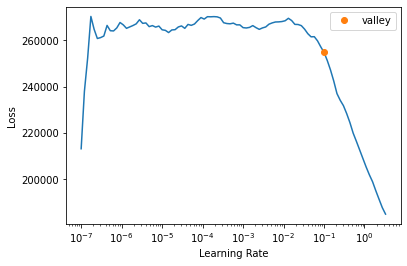

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  433.00     465.80
1  484.00     540.35
2  240.00     313.78
3  396.00     474.24
4    0.00       0.12
XGBoost RMSE:  101.84055


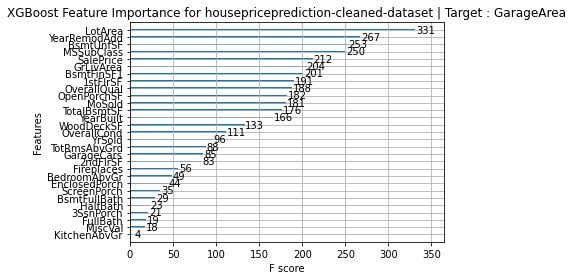

Target Variable: GarageCars
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
31
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces

  5%|▍         | 2/42 [00:00<00:06,  6.26it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7252470710696661, 'Adjusted R-Squared': 0.6936662746408921, 'RMSE': 0.36649478404035274, 'Time taken': 0.24210858345031738}
{'Model': 'BaggingRegressor', 'R-Squared': 0.8247285464098074, 'Adjusted R-Squared': 0.8045824023189807, 'RMSE': 0.2927198857386517, 'Time taken': 0.10065269470214844}
{'Model': 'BayesianRidge', 'R-Squared': 0.7664763532055772, 'Adjusted R-Squared': 0.7396345547234595, 'RMSE': 0.3378796726925857, 'Time taken': 0.04451441764831543}


 10%|▉         | 4/42 [00:00<00:04,  9.49it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.7338003502626971, 'Adjusted R-Squared': 0.7032026893733518, 'RMSE': 0.3607450433496902, 'Time taken': 0.09373283386230469}
{'Model': 'DummyRegressor', 'R-Squared': -0.0009371326440035244, 'Adjusted R-Squared': -0.11598737777549828, 'RMSE': 0.699519834544381, 'Time taken': 0.011815309524536133}
{'Model': 'ElasticNet', 'R-Squared': 0.23586294769338823, 'Adjusted R-Squared': 0.1480311026006742, 'RMSE': 0.6111985, 'Time taken': 0.01853203773498535}


 17%|█▋        | 7/42 [00:00<00:03, 10.36it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7645150034083221, 'Adjusted R-Squared': 0.7374477624207729, 'RMSE': 0.33929563, 'Time taken': 0.2333815097808838}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.7127845884413311, 'Adjusted R-Squared': 0.6797713227449323, 'RMSE': 0.37471450319424465, 'Time taken': 0.028501033782958984}


 21%|██▏       | 9/42 [00:01<00:04,  7.39it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8714129597197898, 'Adjusted R-Squared': 0.8566328401473519, 'RMSE': 0.2507236103104837, 'Time taken': 0.37836384773254395}
{'Model': 'GammaRegressor', 'R-Squared': 0.6271509992885906, 'Adjusted R-Squared': 0.5842947923102677, 'RMSE': 0.4269363417449739, 'Time taken': 0.02633810043334961}


 26%|██▌       | 11/42 [00:01<00:04,  7.36it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -9.708109027724692, 'Adjusted R-Squared': -10.93892615734822, 'RMSE': 2.287984220557371, 'Time taken': 0.24614214897155762}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.6453153921869546, 'Adjusted R-Squared': 0.6045470464613172, 'RMSE': 0.4164067910524887, 'Time taken': 0.03176546096801758}


 31%|███       | 13/42 [00:02<00:05,  5.45it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8379393247073338, 'Adjusted R-Squared': 0.8193116608805906, 'RMSE': 0.28147216581792456, 'Time taken': 0.5322494506835938}


 33%|███▎      | 14/42 [00:02<00:08,  3.43it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.8399910383773298, 'Adjusted R-Squared': 0.8215992037080574, 'RMSE': 0.2796847495832387, 'Time taken': 0.7562069892883301}


 38%|███▊      | 16/42 [00:03<00:06,  4.12it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.7618926399116632, 'Adjusted R-Squared': 0.7345239778325441, 'RMSE': 0.3411795898188205, 'Time taken': 0.22555232048034668}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5777232924693521, 'Adjusted R-Squared': 0.5291857398796224, 'RMSE': 0.4543548791026498, 'Time taken': 0.11826276779174805}


 40%|████      | 17/42 [00:03<00:05,  4.82it/s]

{'Model': 'KernelRidge', 'R-Squared': -14.968374796381347, 'Adjusted R-Squared': -16.803820175275757, 'RMSE': 2.7940037, 'Time taken': 0.09657788276672363}
{'Model': 'Lars', 'R-Squared': 0.766676457247013, 'Adjusted R-Squared': 0.7398576592294284, 'RMSE': 0.3377348788377114, 'Time taken': 0.06402993202209473}


 45%|████▌     | 19/42 [00:03<00:03,  6.10it/s]

{'Model': 'LarsCV', 'R-Squared': 0.7641201770264731, 'Adjusted R-Squared': 0.7370075536961826, 'RMSE': 0.3395799416113437, 'Time taken': 0.13599300384521484}
{'Model': 'Lasso', 'R-Squared': -0.0009371165427560779, 'Adjusted R-Squared': -0.11598735982353281, 'RMSE': 0.6995198, 'Time taken': 0.018888235092163086}


 50%|█████     | 21/42 [00:03<00:03,  6.43it/s]

{'Model': 'LassoCV', 'R-Squared': 0.7647859847003448, 'Adjusted R-Squared': 0.7377498909877407, 'RMSE': 0.33910033, 'Time taken': 0.2540717124938965}
{'Model': 'LassoLars', 'R-Squared': -0.0009371254942625029, 'Adjusted R-Squared': -0.11598736980394797, 'RMSE': 0.6995198320460295, 'Time taken': 0.04706215858459473}


 60%|█████▉    | 25/42 [00:04<00:02,  8.40it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.7641201770264731, 'Adjusted R-Squared': 0.7370075536961826, 'RMSE': 0.3395799416113437, 'Time taken': 0.16813254356384277}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7642333280980931, 'Adjusted R-Squared': 0.7371337106381037, 'RMSE': 0.3394984839375294, 'Time taken': 0.08900856971740723}
{'Model': 'LinearRegression', 'R-Squared': 0.7666135477014007, 'Adjusted R-Squared': 0.7397875187015617, 'RMSE': 0.33778042, 'Time taken': 0.05182933807373047}


 62%|██████▏   | 26/42 [00:04<00:02,  7.36it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.7567903061019939, 'Adjusted R-Squared': 0.728835168872338, 'RMSE': 0.3448157330220328, 'Time taken': 0.20059561729431152}


 64%|██████▍   | 27/42 [00:07<00:10,  1.40it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.46585652778055553, 'Adjusted R-Squared': 0.4044607263760216, 'RMSE': 0.5110055245235429, 'Time taken': 2.8237974643707275}


 74%|███████▍  | 31/42 [00:07<00:03,  3.05it/s]

{'Model': 'NuSVR', 'R-Squared': 0.7924328154514244, 'Adjusted R-Squared': 0.7685745183768755, 'RMSE': 0.3185488048579075, 'Time taken': 0.29094457626342773}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7494850018325121, 'Adjusted R-Squared': 0.7206901744569387, 'RMSE': 0.34995604414985715, 'Time taken': 0.02218461036682129}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7635820128636001, 'Adjusted R-Squared': 0.7364075315835541, 'RMSE': 0.3399670998572453, 'Time taken': 0.06991386413574219}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.5726910154680829, 'Adjusted R-Squared': 0.5235750402345292, 'RMSE': 0.4570541376386839, 'Time taken': 0.03156256675720215}
{'Model': 'PoissonRegressor', 'R-Squared': 0.6790313939789038, 'Adjusted R-Squared': 0.6421384507580881, 'RMSE': 0.3961210401597359, 'Time taken': 0.05998110771179199}


 79%|███████▊  | 33/42 [00:07<00:02,  3.78it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 81%|████████  | 34/42 [00:08<00:03,  2.59it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.8493954465849387, 'Adjusted R-Squared': 0.8320845783763109, 'RMSE': 0.2713411642144632, 'Time taken': 0.9059655666351318}
{'Model': 'Ridge', 'R-Squared': 0.766570338863101, 'Adjusted R-Squared': 0.739739343330124, 'RMSE': 0.33781168, 'Time taken': 0.03242373466491699}
{'Model': 'RidgeCV', 'R-Squared': 0.7664765149086015, 'Adjusted R-Squared': 0.7396347350130383, 'RMSE': 0.33787955571048317, 'Time taken': 0.03636312484741211}
{'Model': 'SGDRegressor', 'R-Squared': 0.7602940019821195, 'Adjusted R-Squared': 0.7327415884168458, 'RMSE': 0.34232300304619195, 'Time taken': 0.027700424194335938}


 90%|█████████ | 38/42 [00:09<00:00,  4.43it/s]

{'Model': 'SVR', 'R-Squared': 0.7925247630230807, 'Adjusted R-Squared': 0.7686770346349291, 'RMSE': 0.31847824208200026, 'Time taken': 0.2071821689605713}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7666135477014007, 'Adjusted R-Squared': 0.7397875187015617, 'RMSE': 0.33778042, 'Time taken': 0.021060705184936523}
{'Model': 'TweedieRegressor', 'R-Squared': 0.6453153921869546, 'Adjusted R-Squared': 0.6045470464613172, 'RMSE': 0.4164067910524887, 'Time taken': 0.03098773956298828}


 98%|█████████▊| 41/42 [00:09<00:00,  5.44it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.8290579266310552, 'Adjusted R-Squared': 0.8094094124507166, 'RMSE': 0.28908205, 'Time taken': 0.2709686756134033}


100%|██████████| 42/42 [00:09<00:00,  4.38it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.8418599641404758, 'Adjusted R-Squared': 0.8236829485244386, 'RMSE': 0.2780465746374643, 'Time taken': 0.23283171653747559}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: GarageCars
GarageCars
Target Standard Deviation: 0.7584935148291684
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.86       0.87  0.25        0.38
RandomForestRegressor                        0.83       0.85  0.27        0.91
LGBMRegressor                                0.82       0.84  0.28        0.23
HistGradientBoostingRegressor                0.82       0.84  0.28        0.76
GradientBoostingRegressor                    0.82       0.84  0.28        0.53
XGBRegressor                                 0.81       0.83  0.29        0.27
BaggingRegressor                            

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,8.508492,1.979585,1.406977,00:00
1,5.610249,1.556183,1.247471,00:00
2,3.828108,2.223583,1.491168,00:00


Better model found at epoch 0 with _rmse value: 1.4069770574569702.
Better model found at epoch 1 with _rmse value: 1.2474706172943115.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       4       3.77
2       3       3.02
3       2       2.01
4       2       1.88
XGBoost RMSE:  0.2901213


<Figure size 432x288 with 0 Axes>

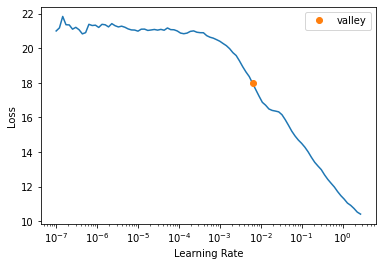

<Figure size 720x720 with 0 Axes>

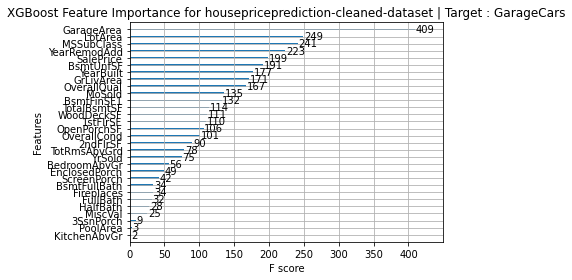

Target Variable: Fireplaces
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
31
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces

  5%|▍         | 2/42 [00:00<00:06,  6.49it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.182052669791974, 'Adjusted R-Squared': 0.08803573528530428, 'RMSE': 0.5725521067100056, 'Time taken': 0.1989138126373291}
{'Model': 'BaggingRegressor', 'R-Squared': 0.332207655390378, 'Adjusted R-Squared': 0.25544991463065125, 'RMSE': 0.5173364343455522, 'Time taken': 0.12120318412780762}
{'Model': 'BayesianRidge', 'R-Squared': 0.3096725172598458, 'Adjusted R-Squared': 0.23032453073798898, 'RMSE': 0.5259929571456626, 'Time taken': 0.02788710594177246}


 12%|█▏        | 5/42 [00:00<00:02, 13.25it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.3928362401966523, 'Adjusted R-Squared': -0.552932359759486, 'RMSE': 0.7471406682025761, 'Time taken': 0.05798745155334473}
{'Model': 'DummyRegressor', 'R-Squared': -0.0037036901556830593, 'Adjusted R-Squared': -0.11907193040346287, 'RMSE': 0.6342421604405649, 'Time taken': 0.04527091979980469}
{'Model': 'ElasticNet', 'R-Squared': -0.0037036977990037023, 'Adjusted R-Squared': -0.11907193892532608, 'RMSE': 0.6342422, 'Time taken': 0.0276639461517334}


 17%|█▋        | 7/42 [00:01<00:05,  6.38it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.3097436820799344, 'Adjusted R-Squared': 0.23040387542245555, 'RMSE': 0.5259658, 'Time taken': 0.5122532844543457}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.2561161184595575, 'Adjusted R-Squared': -0.40049728150088604, 'RMSE': 0.7095242473194603, 'Time taken': 0.060625553131103516}


 21%|██▏       | 9/42 [00:01<00:06,  4.92it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.3782148308556713, 'Adjusted R-Squared': 0.3067452711839094, 'RMSE': 0.49919764389591514, 'Time taken': 0.5043842792510986}
{'Model': 'GammaRegressor', 'R-Squared': 0.2752571177762335, 'Adjusted R-Squared': 0.19195333821028326, 'RMSE': 0.5389448506285497, 'Time taken': 0.03599047660827637}


 26%|██▌       | 11/42 [00:01<00:05,  5.45it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -4.35730119743596, 'Adjusted R-Squared': -4.97308294426768, 'RMSE': 1.465296051571476, 'Time taken': 0.2527914047241211}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.29682452142811255, 'Adjusted R-Squared': 0.21599975377617142, 'RMSE': 0.5308651380301198, 'Time taken': 0.030795812606811523}


 31%|███       | 13/42 [00:02<00:06,  4.60it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.37891962124418366, 'Adjusted R-Squared': 0.3075310719619059, 'RMSE': 0.4989146446586403, 'Time taken': 0.5400056838989258}


 33%|███▎      | 14/42 [00:03<00:08,  3.34it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.36967018010538066, 'Adjusted R-Squared': 0.2972184766692175, 'RMSE': 0.5026159589430703, 'Time taken': 0.6471230983734131}


 38%|███▊      | 16/42 [00:03<00:06,  3.73it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.2999995636149374, 'Adjusted R-Squared': 0.21953974334079218, 'RMSE': 0.529665276672285, 'Time taken': 0.3746061325073242}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.19779468570759695, 'Adjusted R-Squared': 0.10558717831766551, 'RMSE': 0.5670157399182746, 'Time taken': 0.1081387996673584}
{'Model': 'KernelRidge', 'R-Squared': -5.849383651188103, 'Adjusted R-Squared': -6.636669128336162, 'RMSE': 1.6568305, 'Time taken': 0.047461748123168945}
{'Model': 'Lars', 'R-Squared': 0.24538557150133344, 'Adjusted R-Squared': 0.15864828086930272, 'RMSE': 0.5499394814221624, 'Time taken': 0.029494524002075195}


 45%|████▌     | 19/42 [00:03<00:03,  5.76it/s]

{'Model': 'LarsCV', 'R-Squared': 0.2942534998869315, 'Adjusted R-Squared': 0.2131332125176132, 'RMSE': 0.5318347540309275, 'Time taken': 0.15451288223266602}
{'Model': 'Lasso', 'R-Squared': -0.0037036977990037023, 'Adjusted R-Squared': -0.11907193892532608, 'RMSE': 0.6342422, 'Time taken': 0.03478431701660156}


 50%|█████     | 21/42 [00:04<00:04,  4.96it/s]

{'Model': 'LassoCV', 'R-Squared': 0.30915130214056386, 'Adjusted R-Squared': 0.2297434058348815, 'RMSE': 0.5261915, 'Time taken': 0.48211216926574707}
{'Model': 'LassoLars', 'R-Squared': -0.0037036932953407042, 'Adjusted R-Squared': -0.11907193390400073, 'RMSE': 0.6342421614325425, 'Time taken': 0.048980712890625}


 60%|█████▉    | 25/42 [00:04<00:02,  7.19it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.31004546865223415, 'Adjusted R-Squared': 0.23074035010651384, 'RMSE': 0.5258508533520696, 'Time taken': 0.17618179321289062}
{'Model': 'LassoLarsIC', 'R-Squared': 0.30965386689422725, 'Adjusted R-Squared': 0.2303037366521844, 'RMSE': 0.5260000623927747, 'Time taken': 0.046003103256225586}
{'Model': 'LinearRegression', 'R-Squared': 0.30575805702396763, 'Adjusted R-Squared': 0.22596013254396385, 'RMSE': 0.52748215, 'Time taken': 0.06674623489379883}
{'Model': 'LinearSVR', 'R-Squared': 0.27628997428668367, 'Adjusted R-Squared': 0.1931049138598656, 'RMSE': 0.5385606790973948, 'Time taken': 0.18204712867736816}


 64%|██████▍   | 27/42 [00:07<00:08,  1.82it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.10706915997819033, 'Adjusted R-Squared': 0.004433431240051244, 'RMSE': 0.5982204550266303, 'Time taken': 2.754840135574341}


 76%|███████▌  | 32/42 [00:08<00:02,  3.85it/s]

{'Model': 'NuSVR', 'R-Squared': 0.352109353921214, 'Adjusted R-Squared': 0.27763916471675576, 'RMSE': 0.5095692379718896, 'Time taken': 0.2345869541168213}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.23202525251352468, 'Adjusted R-Squared': 0.1437522930323205, 'RMSE': 0.5547864141035088, 'Time taken': 0.01795649528503418}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.29622676907441536, 'Adjusted R-Squared': 0.2153332942553826, 'RMSE': 0.5310907278624712, 'Time taken': 0.041808128356933594}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.2901944374825627, 'Adjusted R-Squared': -0.43849264868745497, 'RMSE': 0.7190845040036509, 'Time taken': 0.03041243553161621}
{'Model': 'PoissonRegressor', 'R-Squared': 0.27302240086974494, 'Adjusted R-Squared': 0.18946175729155468, 'RMSE': 0.5397751189937475, 'Time taken': 0.03789496421813965}
{'Model': 'RANSACRegressor', 'R-Squared': -0.14426535087781933, 'Adjusted R-Squared': -0.2757901038522814, 'RMSE': 0.6771981, 'Time ta

 86%|████████▌ | 36/42 [00:09<00:01,  3.58it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.37553169846658085, 'Adjusted R-Squared': 0.3037537327730844, 'RMSE': 0.5002735553044817, 'Time taken': 1.0757060050964355}
{'Model': 'Ridge', 'R-Squared': 0.3051556904557803, 'Adjusted R-Squared': 0.22528852843920322, 'RMSE': 0.527711, 'Time taken': 0.04066610336303711}
{'Model': 'RidgeCV', 'R-Squared': 0.30444990199815125, 'Adjusted R-Squared': 0.2245016148715019, 'RMSE': 0.5279788861532043, 'Time taken': 0.06769323348999023}
{'Model': 'SGDRegressor', 'R-Squared': 0.29662665327325266, 'Adjusted R-Squared': 0.21577914215523564, 'RMSE': 0.5309398234536936, 'Time taken': 0.05828356742858887}


 90%|█████████ | 38/42 [00:09<00:00,  4.20it/s]

{'Model': 'SVR', 'R-Squared': 0.36333675231937435, 'Adjusted R-Squared': 0.290157068677923, 'RMSE': 0.5051347399502216, 'Time taken': 0.19971537590026855}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.30575805702396763, 'Adjusted R-Squared': 0.22596013254396385, 'RMSE': 0.52748215, 'Time taken': 0.020770788192749023}
{'Model': 'TweedieRegressor', 'R-Squared': 0.29682452142811255, 'Adjusted R-Squared': 0.21599975377617142, 'RMSE': 0.5308651380301198, 'Time taken': 0.03263974189758301}


 98%|█████████▊| 41/42 [00:10<00:00,  5.25it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.3011004341077804, 'Adjusted R-Squared': 0.220767150671893, 'RMSE': 0.5292486, 'Time taken': 0.2789788246154785}


100%|██████████| 42/42 [00:10<00:00,  4.10it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.3440829163995228, 'Adjusted R-Squared': 0.2686901481695828, 'RMSE': 0.5127159388455549, 'Time taken': 0.20552945137023926}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: Fireplaces
Fireplaces
Target Standard Deviation: 0.6470286377938397
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.31       0.38  0.50        0.54
ExtraTreesRegressor                          0.31       0.38  0.50        0.50
RandomForestRegressor                        0.30       0.38  0.50        1.08
HistGradientBoostingRegressor                0.30       0.37  0.50        0.65
SVR                                          0.29       0.36  0.51        0.20
NuSVR                                        0.28       0.35  0.51        0.23
LGBMRegressor                               

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,4.229549,1.196395,1.093798,00:00
1,2.972509,0.999548,0.999774,00:00
2,2.088230,0.982370,0.991146,00:00
3,1.503509,0.503371,0.709487,00:00
4,1.096809,0.293989,0.542207,00:00
5,0.833667,0.189283,0.435067,00:01
6,0.669118,0.299520,0.547285,00:00


Better model found at epoch 0 with _rmse value: 1.093798279762268.
Better model found at epoch 1 with _rmse value: 0.9997742176055908.
Better model found at epoch 2 with _rmse value: 0.9911457300186157.
Better model found at epoch 3 with _rmse value: 0.7094866037368774.
Better model found at epoch 4 with _rmse value: 0.5422073602676392.
Better model found at epoch 5 with _rmse value: 0.43506672978401184.
No improvement since epoch 5: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       1.98
1       2       2.16
2       2       2.10
3       2       2.12
4       2       1.43
XGBoost RMSE:  0.5290545


<Figure size 432x288 with 0 Axes>

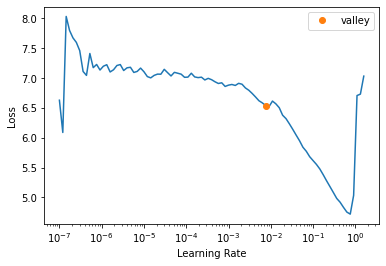

<Figure size 720x720 with 0 Axes>

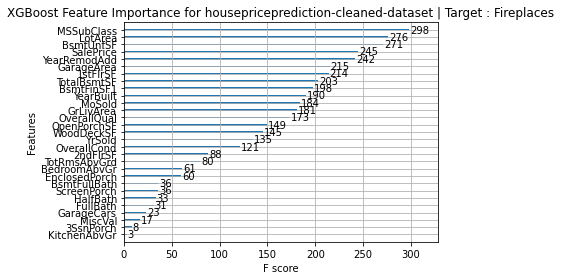

Target Variable: TotRmsAbvGrd
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
31
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplac

  5%|▍         | 2/42 [00:00<00:07,  5.69it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8079651983817305, 'Adjusted R-Squared': 0.7858922326784812, 'RMSE': 0.7128968777647132, 'Time taken': 0.24705910682678223}
{'Model': 'BaggingRegressor', 'R-Squared': 0.8112013188449472, 'Adjusted R-Squared': 0.7895003210110331, 'RMSE': 0.7068645798500413, 'Time taken': 0.1243896484375}
{'Model': 'BayesianRidge', 'R-Squared': 0.8011645253367554, 'Adjusted R-Squared': 0.7783098730766124, 'RMSE': 0.725410232394472, 'Time taken': 0.02569866180419922}


 12%|█▏        | 5/42 [00:00<00:02, 12.45it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.6286139719568185, 'Adjusted R-Squared': 0.5859259227564527, 'RMSE': 0.9914013881010896, 'Time taken': 0.05327892303466797}
{'Model': 'DummyRegressor', 'R-Squared': -0.0011702200733871848, 'Adjusted R-Squared': -0.11624725686343185, 'RMSE': 1.6277612425768802, 'Time taken': 0.04705619812011719}
{'Model': 'ElasticNet', 'R-Squared': 0.5633140623420525, 'Adjusted R-Squared': 0.5131202764043574, 'RMSE': 1.0750319, 'Time taken': 0.022684574127197266}


 17%|█▋        | 7/42 [00:00<00:03,  9.27it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7991609670986823, 'Adjusted R-Squared': 0.776076020788186, 'RMSE': 0.7290559, 'Time taken': 0.2674593925476074}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.645436335596405, 'Adjusted R-Squared': 0.6046818914120837, 'RMSE': 0.9686878570435172, 'Time taken': 0.061243295669555664}


 21%|██▏       | 9/42 [00:01<00:06,  5.42it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8286305816035311, 'Adjusted R-Squared': 0.8089329473050864, 'RMSE': 0.6734469703828269, 'Time taken': 0.5673773288726807}
{'Model': 'GammaRegressor', 'R-Squared': 0.7053706148460874, 'Adjusted R-Squared': 0.6715051682766722, 'RMSE': 0.88302860380527, 'Time taken': 0.029074668884277344}


 26%|██▌       | 11/42 [00:01<00:05,  5.91it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -7.6799985574470515, 'Adjusted R-Squared': -8.677699541061656, 'RMSE': 4.79288014315774, 'Time taken': 0.2488875389099121}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7298174183155468, 'Adjusted R-Squared': 0.6987619491564142, 'RMSE': 0.8456008594484491, 'Time taken': 0.031579017639160156}


 31%|███       | 13/42 [00:02<00:06,  4.83it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8261809510876225, 'Adjusted R-Squared': 0.8062017500632113, 'RMSE': 0.6782431663877195, 'Time taken': 0.5305438041687012}


 33%|███▎      | 14/42 [00:02<00:08,  3.41it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.8059482308137595, 'Adjusted R-Squared': 0.7836434297578698, 'RMSE': 0.7166309248752053, 'Time taken': 0.6591875553131104}


 38%|███▊      | 16/42 [00:03<00:06,  4.11it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.8030482968401054, 'Adjusted R-Squared': 0.7804101700401175, 'RMSE': 0.7219657788108975, 'Time taken': 0.23315882682800293}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7180571854005283, 'Adjusted R-Squared': 0.6856499653316235, 'RMSE': 0.8638080710213605, 'Time taken': 0.11225771903991699}
{'Model': 'KernelRidge', 'R-Squared': -10.821754560475991, 'Adjusted R-Squared': -12.180576923749095, 'RMSE': 5.5934234, 'Time taken': 0.07285356521606445}


 45%|████▌     | 19/42 [00:03<00:04,  5.57it/s]

{'Model': 'Lars', 'R-Squared': -0.4371586082936252, 'Adjusted R-Squared': -0.6023492529250765, 'RMSE': 1.9502446373972109, 'Time taken': 0.06969332695007324}
{'Model': 'LarsCV', 'R-Squared': 0.8035007754435624, 'Adjusted R-Squared': 0.7809146576784546, 'RMSE': 0.7211359766210376, 'Time taken': 0.18851900100708008}
{'Model': 'Lasso', 'R-Squared': 0.3124930534592463, 'Adjusted R-Squared': 0.2334692665005389, 'RMSE': 1.3488861, 'Time taken': 0.05552411079406738}


 50%|█████     | 21/42 [00:03<00:03,  5.86it/s]

{'Model': 'LassoCV', 'R-Squared': 0.8023188581961681, 'Adjusted R-Squared': 0.7795968878738886, 'RMSE': 0.7233015, 'Time taken': 0.2497715950012207}
{'Model': 'LassoLars', 'R-Squared': -0.0011702255675911655, 'Adjusted R-Squared': -0.11624726298915355, 'RMSE': 1.6277612470432794, 'Time taken': 0.06003212928771973}


 60%|█████▉    | 25/42 [00:04<00:02,  8.22it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8025682984484617, 'Adjusted R-Squared': 0.7798749994195492, 'RMSE': 0.7228450083913317, 'Time taken': 0.16579771041870117}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8026313960724427, 'Adjusted R-Squared': 0.7799453496439879, 'RMSE': 0.7227294913621672, 'Time taken': 0.08509087562561035}
{'Model': 'LinearRegression', 'R-Squared': 0.8020079801746871, 'Adjusted R-Squared': 0.7792502767464902, 'RMSE': 0.72387004, 'Time taken': 0.03668570518493652}
{'Model': 'LinearSVR', 'R-Squared': 0.7940357863664811, 'Adjusted R-Squared': 0.7703617388223984, 'RMSE': 0.7382995881349886, 'Time taken': 0.14198970794677734}


 64%|██████▍   | 27/42 [00:07<00:09,  1.64it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.307963845638215, 'Adjusted R-Squared': 0.22841946007938907, 'RMSE': 1.353321975889886, 'Time taken': 3.0774872303009033}


 76%|███████▌  | 32/42 [00:07<00:02,  3.57it/s]

{'Model': 'NuSVR', 'R-Squared': 0.7535697568956224, 'Adjusted R-Squared': 0.7252444415962687, 'RMSE': 0.8075766340742907, 'Time taken': 0.25467824935913086}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8049761150020955, 'Adjusted R-Squared': 0.7825595764965892, 'RMSE': 0.718423688625095, 'Time taken': 0.0279998779296875}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7991055328683669, 'Adjusted R-Squared': 0.7760142148072597, 'RMSE': 0.729156463818641, 'Time taken': 0.0365908145904541}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.4910593803963965, 'Adjusted R-Squared': 0.43256045860287884, 'RMSE': 1.1605672183182836, 'Time taken': 0.029464006423950195}
{'Model': 'PoissonRegressor', 'R-Squared': 0.7324303273540649, 'Adjusted R-Squared': 0.7016751925671758, 'RMSE': 0.8415020644526656, 'Time taken': 0.041455984115600586}
{'Model': 'RANSACRegressor', 'R-Squared': 0.5431051922613996, 'Adjusted R-Squared': 0.4905885476937444, 'RMSE': 1.0996256, 'Time taken': 0.429

 88%|████████▊ | 37/42 [00:09<00:01,  3.54it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.836791369010689, 'Adjusted R-Squared': 0.8180317562532968, 'RMSE': 0.6572162651502793, 'Time taken': 1.1462452411651611}
{'Model': 'Ridge', 'R-Squared': 0.8020759230146061, 'Adjusted R-Squared': 0.7793260291082389, 'RMSE': 0.7237458, 'Time taken': 0.020497798919677734}
{'Model': 'RidgeCV', 'R-Squared': 0.8014045649138424, 'Adjusted R-Squared': 0.7785775034096863, 'RMSE': 0.7249722327110701, 'Time taken': 0.06178426742553711}
{'Model': 'SGDRegressor', 'R-Squared': 0.796436114560624, 'Adjusted R-Squared': 0.7730379668089716, 'RMSE': 0.7339848704690565, 'Time taken': 0.06515312194824219}


 93%|█████████▎| 39/42 [00:09<00:00,  4.23it/s]

{'Model': 'SVR', 'R-Squared': 0.7567844805074937, 'Adjusted R-Squared': 0.7288286736692746, 'RMSE': 0.802291856369318, 'Time taken': 0.1827836036682129}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8020079801746871, 'Adjusted R-Squared': 0.7792502767464902, 'RMSE': 0.72387004, 'Time taken': 0.0208432674407959}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7298174183155468, 'Adjusted R-Squared': 0.6987619491564142, 'RMSE': 0.8456008594484491, 'Time taken': 0.05022764205932617}


 98%|█████████▊| 41/42 [00:10<00:00,  4.65it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.8119536737025294, 'Adjusted R-Squared': 0.7903391534384523, 'RMSE': 0.70545477, 'Time taken': 0.26476192474365234}


100%|██████████| 42/42 [00:10<00:00,  4.02it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.8157356666318267, 'Adjusted R-Squared': 0.7945558581987033, 'RMSE': 0.698324665902758, 'Time taken': 0.23023605346679688}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: TotRmsAbvGrd
TotRmsAbvGrd
Target Standard Deviation: 1.6204672390277577
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.82       0.84  0.66        1.15
ExtraTreesRegressor                          0.81       0.83  0.67        0.57
GradientBoostingRegressor                    0.81       0.83  0.68        0.53
LGBMRegressor                                0.79       0.82  0.70        0.23
XGBRegressor                                 0.79       0.81  0.71        0.26
BaggingRegressor                             0.79       0.81  0.71        0.12
AdaBoostRegressor                        

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,30.694378,5.622857,2.371256,00:00
1,20.775887,17.253675,4.153754,00:00


Better model found at epoch 0 with _rmse value: 2.3712563514709473.
No improvement since epoch 0: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       7       5.65
1       4       3.64
2       6       5.13
3       5       5.09
4       2       2.96
XGBoost RMSE:  0.7044048


<Figure size 432x288 with 0 Axes>

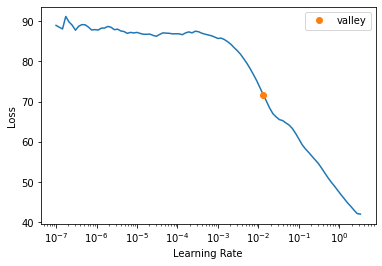

<Figure size 720x720 with 0 Axes>

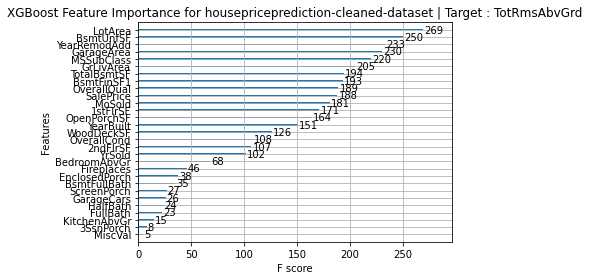

Target Variable: KitchenAbvGr
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
31
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplac

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7507231403524331, 'Adjusted R-Squared': 0.7220706277492646, 'RMSE': 0.13544562952536027, 'Time taken': 0.06474804878234863}


  5%|▍         | 2/42 [00:00<00:03, 12.07it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.7440637450199203, 'Adjusted R-Squared': 0.7146457846773824, 'RMSE': 0.13724291033913616, 'Time taken': 0.10032105445861816}
{'Model': 'BayesianRidge', 'R-Squared': 0.36861227170241895, 'Adjusted R-Squared': 0.2960389695992487, 'RMSE': 0.21556193924551442, 'Time taken': 0.0380706787109375}


 10%|▉         | 4/42 [00:00<00:02, 13.07it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.39505976095617545, 'Adjusted R-Squared': 0.32552640014654044, 'RMSE': 0.21099892877738852, 'Time taken': 0.10458207130432129}
{'Model': 'DummyRegressor', 'R-Squared': -0.013635458167330139, 'Adjusted R-Squared': -0.13014528094518418, 'RMSE': 0.27312717374873186, 'Time taken': 0.012341022491455078}
{'Model': 'ElasticNet', 'R-Squared': -0.01363536931841458, 'Adjusted R-Squared': -0.13014518188374957, 'RMSE': 0.27312717, 'Time taken': 0.01846027374267578}


 17%|█▋        | 7/42 [00:00<00:05,  6.58it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.38069332272233447, 'Adjusted R-Squared': 0.3095086471731775, 'RMSE': 0.21348968, 'Time taken': 0.6026155948638916}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.06932270916334693, 'Adjusted R-Squared': -0.03765169208224539, 'RMSE': 0.2617119612951068, 'Time taken': 0.028685569763183594}


 21%|██▏       | 9/42 [00:01<00:05,  6.56it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8332086693227092, 'Adjusted R-Squared': 0.8140372520034804, 'RMSE': 0.11079259903080169, 'Time taken': 0.2749600410461426}
{'Model': 'GammaRegressor', 'R-Squared': 0.21524512076788338, 'Adjusted R-Squared': 0.12504341051131818, 'RMSE': 0.24032061456621714, 'Time taken': 0.01652359962463379}


 26%|██▌       | 11/42 [00:01<00:04,  6.79it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -42.566132041296285, 'Adjusted R-Squared': -47.57373342535333, 'RMSE': 1.7905997327375245, 'Time taken': 0.2549464702606201}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.2213307733152654, 'Adjusted R-Squared': 0.13182856335150273, 'RMSE': 0.23938697641573276, 'Time taken': 0.030762195587158203}


 31%|███       | 13/42 [00:02<00:05,  5.16it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.7924983168780586, 'Adjusted R-Squared': 0.7686475487031228, 'RMSE': 0.12357619689939302, 'Time taken': 0.5487871170043945}


 33%|███▎      | 14/42 [00:02<00:07,  3.64it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.8347476476851079, 'Adjusted R-Squared': 0.8157531244305226, 'RMSE': 0.11028027457828304, 'Time taken': 0.6252388954162598}


 40%|████      | 17/42 [00:03<00:06,  3.83it/s]

{'Model': 'HuberRegressor', 'R-Squared': -0.07027619800422569, 'Adjusted R-Squared': -0.19329645064838963, 'RMSE': 0.28065445939433914, 'Time taken': 0.6777975559234619}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5123250996015938, 'Adjusted R-Squared': 0.45627051334890334, 'RMSE': 0.1894476470133744, 'Time taken': 0.09377360343933105}
{'Model': 'KernelRidge', 'R-Squared': -57.054697852723606, 'Adjusted R-Squared': -63.72765162889874, 'RMSE': 2.0670104, 'Time taken': 0.09274077415466309}


 45%|████▌     | 19/42 [00:03<00:04,  4.97it/s]

{'Model': 'Lars', 'R-Squared': 0.37855750633742224, 'Adjusted R-Squared': 0.30712733465206843, 'RMSE': 0.21385750064988832, 'Time taken': 0.07544183731079102}
{'Model': 'LarsCV', 'R-Squared': 0.34914674046662575, 'Adjusted R-Squared': 0.27433602098003096, 'RMSE': 0.21885957710626358, 'Time taken': 0.1008760929107666}
{'Model': 'Lasso', 'R-Squared': -0.01363536931841458, 'Adjusted R-Squared': -0.13014518188374957, 'RMSE': 0.27312717, 'Time taken': 0.02222609519958496}


 50%|█████     | 21/42 [00:04<00:05,  3.84it/s]

{'Model': 'LassoCV', 'R-Squared': 0.38060666268208543, 'Adjusted R-Squared': 0.30941202620876185, 'RMSE': 0.21350463, 'Time taken': 0.7251927852630615}
{'Model': 'LassoLars', 'R-Squared': -0.013635385065062344, 'Adjusted R-Squared': -0.13014519944035685, 'RMSE': 0.27312716389991687, 'Time taken': 0.047791242599487305}


 62%|██████▏   | 26/42 [00:05<00:02,  6.30it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.37923413125272976, 'Adjusted R-Squared': 0.3078817325461469, 'RMSE': 0.21374104520646559, 'Time taken': 0.24169445037841797}
{'Model': 'LassoLarsIC', 'R-Squared': 0.36594562794454544, 'Adjusted R-Squared': 0.29306581506460805, 'RMSE': 0.21601666873425526, 'Time taken': 0.0543973445892334}
{'Model': 'LinearRegression', 'R-Squared': 0.3824796420190927, 'Adjusted R-Squared': 0.3115002905270343, 'RMSE': 0.21318157, 'Time taken': 0.03862357139587402}
{'Model': 'LinearSVR', 'R-Squared': -0.07027923326023511, 'Adjusted R-Squared': -0.19329983478440016, 'RMSE': 0.28065485735588036, 'Time taken': 0.09895753860473633}


 64%|██████▍   | 27/42 [00:06<00:05,  2.55it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.2235030376760705, 'Adjusted R-Squared': -0.36413557074228553, 'RMSE': 0.30007273703464393, 'Time taken': 1.5866880416870117}


 76%|███████▌  | 32/42 [00:07<00:02,  3.65it/s]

{'Model': 'NuSVR', 'R-Squared': 0.611185913368337, 'Adjusted R-Squared': 0.5664946390428585, 'RMSE': 0.16915896104069367, 'Time taken': 1.1414449214935303}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.2718601051245121, 'Adjusted R-Squared': 0.1881658643342261, 'RMSE': 0.23148956935651183, 'Time taken': 0.020488500595092773}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.3365965807332353, 'Adjusted R-Squared': 0.26034331415084844, 'RMSE': 0.22095959561912887, 'Time taken': 0.0443270206451416}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.11621838426063114, 'Adjusted R-Squared': 0.014634290497485214, 'RMSE': 0.2550330678954586, 'Time taken': 0.031819820404052734}
{'Model': 'PoissonRegressor', 'R-Squared': 0.28976890646018194, 'Adjusted R-Squared': 0.2081331485820419, 'RMSE': 0.22862507155499268, 'Time taken': 0.03455185890197754}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because

 81%|████████  | 34/42 [00:08<00:02,  3.00it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.7529098326693228, 'Adjusted R-Squared': 0.7245086640106242, 'RMSE': 0.13485024672241386, 'Time taken': 0.7819159030914307}
{'Model': 'Ridge', 'R-Squared': 0.3806527367161133, 'Adjusted R-Squared': 0.30946339610876994, 'RMSE': 0.21349667, 'Time taken': 0.025676727294921875}
{'Model': 'RidgeCV', 'R-Squared': 0.3740145549367042, 'Adjusted R-Squared': 0.3020622049294288, 'RMSE': 0.21463776199719922, 'Time taken': 0.029027462005615234}
{'Model': 'SGDRegressor', 'R-Squared': 0.3615366449046271, 'Adjusted R-Squared': 0.2881500523649291, 'RMSE': 0.21676641821761009, 'Time taken': 0.02737879753112793}


 90%|█████████ | 38/42 [00:09<00:00,  4.73it/s]

{'Model': 'SVR', 'R-Squared': 0.6410110991764653, 'Adjusted R-Squared': 0.5997480071277831, 'RMSE': 0.16254159768500495, 'Time taken': 0.12783169746398926}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.3824796420190927, 'Adjusted R-Squared': 0.3115002905270343, 'RMSE': 0.21318157, 'Time taken': 0.0197293758392334}
{'Model': 'TweedieRegressor', 'R-Squared': 0.2213307733152654, 'Adjusted R-Squared': 0.13182856335150273, 'RMSE': 0.23938697641573276, 'Time taken': 0.03214120864868164}


 98%|█████████▊| 41/42 [00:09<00:00,  5.75it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.6073275930286789, 'Adjusted R-Squared': 0.5621928336066879, 'RMSE': 0.1699962, 'Time taken': 0.22670555114746094}


100%|██████████| 42/42 [00:09<00:00,  4.35it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.8308029755154653, 'Adjusted R-Squared': 0.8113550416666683, 'RMSE': 0.11158874011578564, 'Time taken': 0.26374197006225586}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: KitchenAbvGr
KitchenAbvGr
Target Standard Deviation: 0.20504913560140617
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HistGradientBoostingRegressor                0.82       0.83  0.11        0.63
ExtraTreesRegressor                          0.81       0.83  0.11        0.27
LGBMRegressor                                0.81       0.83  0.11        0.26
GradientBoostingRegressor                    0.77       0.79  0.12        0.55
RandomForestRegressor                        0.72       0.75  0.13        0.78
AdaBoostRegressor                            0.72       0.75  0.14        0.06
BaggingRegressor                      

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3.421472,1.597198,1.263803,00:00
1,2.110035,0.925782,0.962176,00:00
2,1.378334,0.424734,0.651716,00:00
3,0.934485,0.296464,0.544485,00:00
4,0.651530,0.344112,0.586610,00:00


Better model found at epoch 0 with _rmse value: 1.2638028860092163.
Better model found at epoch 1 with _rmse value: 0.9621755480766296.
Better model found at epoch 2 with _rmse value: 0.6517162322998047.
Better model found at epoch 3 with _rmse value: 0.5444848537445068.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       2.00
1       2       2.01
2       2       2.02
3       2       2.00
4       2       2.00
XGBoost RMSE:  0.17000674


<Figure size 432x288 with 0 Axes>

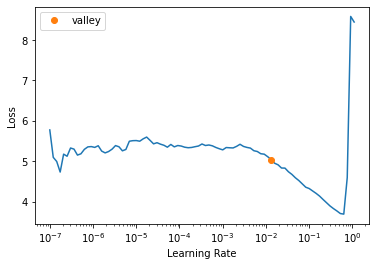

<Figure size 720x720 with 0 Axes>

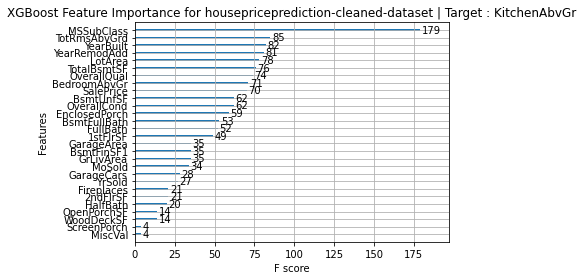

Target Variable: BedroomAbvGr
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
31
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplac

  5%|▍         | 2/42 [00:00<00:07,  5.68it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5257304581329942, 'Adjusted R-Squared': 0.4712167176885108, 'RMSE': 0.5671119641715635, 'Time taken': 0.2525818347930908}
{'Model': 'BaggingRegressor', 'R-Squared': 0.641792459356624, 'Adjusted R-Squared': 0.6006191788229025, 'RMSE': 0.4928599790042904, 'Time taken': 0.1210019588470459}
{'Model': 'BayesianRidge', 'R-Squared': 0.548377802979393, 'Adjusted R-Squared': 0.49646720562070246, 'RMSE': 0.5534059596873981, 'Time taken': 0.03796553611755371}


 10%|▉         | 4/42 [00:00<00:04,  9.16it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.48488412314078166, 'Adjusted R-Squared': 0.42567540166271056, 'RMSE': 0.5910288220494417, 'Time taken': 0.09954380989074707}
{'Model': 'DummyRegressor', 'R-Squared': -0.005919232099619531, 'Adjusted R-Squared': -0.12154213234095512, 'RMSE': 0.8259195532635889, 'Time taken': 0.012891292572021484}
{'Model': 'ElasticNet', 'R-Squared': 0.03832619726874975, 'Adjusted R-Squared': -0.07221102143599167, 'RMSE': 0.80755126, 'Time taken': 0.01821136474609375}


 17%|█▋        | 7/42 [00:00<00:03,  8.80it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.5513418691240386, 'Adjusted R-Squared': 0.4997719690233533, 'RMSE': 0.5515869, 'Time taken': 0.31151485443115234}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.3384296091317882, 'Adjusted R-Squared': 0.2623870354687753, 'RMSE': 0.6697985794149621, 'Time taken': 0.05452704429626465}


 21%|██▏       | 9/42 [00:01<00:05,  5.88it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.6815316291940504, 'Adjusted R-Squared': 0.6449260693312975, 'RMSE': 0.46471784045039277, 'Time taken': 0.4903073310852051}
{'Model': 'GammaRegressor', 'R-Squared': 0.41956165277233193, 'Adjusted R-Squared': 0.3528446013668528, 'RMSE': 0.6273851582989639, 'Time taken': 0.027988433837890625}


 26%|██▌       | 11/42 [00:01<00:04,  6.26it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -14.9387715529751, 'Adjusted R-Squared': -16.77081426021362, 'RMSE': 3.287635151045261, 'Time taken': 0.24680018424987793}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.41756143366772147, 'Adjusted R-Squared': 0.35061447202033313, 'RMSE': 0.6284652286680821, 'Time taken': 0.060396671295166016}


 31%|███       | 13/42 [00:02<00:05,  4.89it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.6603349454961993, 'Adjusted R-Squared': 0.6212929852084061, 'RMSE': 0.47993411982864975, 'Time taken': 0.5319478511810303}


 33%|███▎      | 14/42 [00:02<00:07,  3.54it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6455253273227117, 'Adjusted R-Squared': 0.6047811120724487, 'RMSE': 0.4902852154527659, 'Time taken': 0.6196579933166504}


 38%|███▊      | 16/42 [00:03<00:07,  3.63it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.5675352296413885, 'Adjusted R-Squared': 0.5178266353472951, 'RMSE': 0.5415412704707623, 'Time taken': 0.4723374843597412}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.48306606710480793, 'Adjusted R-Squared': 0.4236483736685789, 'RMSE': 0.5920708954217218, 'Time taken': 0.10695552825927734}


 40%|████      | 17/42 [00:03<00:06,  4.13it/s]

{'Model': 'KernelRidge', 'R-Squared': -21.79809523067521, 'Adjusted R-Squared': -24.418565946844776, 'RMSE': 3.9319274, 'Time taken': 0.13554739952087402}
{'Model': 'Lars', 'R-Squared': 0.5510230302627573, 'Adjusted R-Squared': 0.4994164820170972, 'RMSE': 0.5517828835761501, 'Time taken': 0.0642552375793457}


 45%|████▌     | 19/42 [00:03<00:04,  5.06it/s]

{'Model': 'LarsCV', 'R-Squared': 0.5424480422660272, 'Adjusted R-Squared': 0.48985586321614516, 'RMSE': 0.557027198207002, 'Time taken': 0.19679522514343262}
{'Model': 'Lasso', 'R-Squared': -0.005919229131886583, 'Adjusted R-Squared': -0.12154212903210349, 'RMSE': 0.82591957, 'Time taken': 0.03835654258728027}


 50%|█████     | 21/42 [00:04<00:04,  4.76it/s]

{'Model': 'LassoCV', 'R-Squared': 0.5523798851710695, 'Adjusted R-Squared': 0.5009292972596981, 'RMSE': 0.5509485, 'Time taken': 0.4109499454498291}
{'Model': 'LassoLars', 'R-Squared': -0.005919229658530423, 'Adjusted R-Squared': -0.12154212961928113, 'RMSE': 0.8259195522614491, 'Time taken': 0.043905019760131836}


 60%|█████▉    | 25/42 [00:04<00:02,  6.84it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.5520172596300992, 'Adjusted R-Squared': 0.5005249906220646, 'RMSE': 0.5511716018960635, 'Time taken': 0.2156970500946045}
{'Model': 'LassoLarsIC', 'R-Squared': 0.540084232619267, 'Adjusted R-Squared': 0.4872203513111367, 'RMSE': 0.5584642044592015, 'Time taken': 0.08176136016845703}
{'Model': 'LinearRegression', 'R-Squared': 0.5510226813304026, 'Adjusted R-Squared': 0.4994160929775753, 'RMSE': 0.5517831, 'Time taken': 0.04926657676696777}


 62%|██████▏   | 26/42 [00:04<00:02,  6.63it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.5573914027873252, 'Adjusted R-Squared': 0.5065168513835695, 'RMSE': 0.5478556122263153, 'Time taken': 0.16655230522155762}


 64%|██████▍   | 27/42 [00:07<00:10,  1.50it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.2390918968736222, 'Adjusted R-Squared': 0.15163119536484304, 'RMSE': 0.7183271753752044, 'Time taken': 2.554325819015503}


 76%|███████▌  | 32/42 [00:07<00:02,  3.82it/s]

{'Model': 'NuSVR', 'R-Squared': 0.592034789730442, 'Adjusted R-Squared': 0.5451422368258951, 'RMSE': 0.525978215204308, 'Time taken': 0.24047231674194336}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.5089656363030735, 'Adjusted R-Squared': 0.4525249048436566, 'RMSE': 0.577048259271114, 'Time taken': 0.019952058792114258}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.5249514053463682, 'Adjusted R-Squared': 0.4703481186045714, 'RMSE': 0.5675775526528437, 'Time taken': 0.04314827919006348}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.2264775593586359, 'Adjusted R-Squared': 0.13756693399755948, 'RMSE': 0.7242569159424266, 'Time taken': 0.030478715896606445}
{'Model': 'PoissonRegressor', 'R-Squared': 0.5016891302602506, 'Adjusted R-Squared': 0.44441201879591163, 'RMSE': 0.581308097360965, 'Time taken': 0.03871655464172363}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each ra

 88%|████████▊ | 37/42 [00:09<00:01,  3.96it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.6743129367001037, 'Adjusted R-Squared': 0.6368776420679317, 'RMSE': 0.4699551858553417, 'Time taken': 1.1079719066619873}
{'Model': 'Ridge', 'R-Squared': 0.5508869005394628, 'Adjusted R-Squared': 0.4992647051991711, 'RMSE': 0.55186653, 'Time taken': 0.03528738021850586}
{'Model': 'RidgeCV', 'R-Squared': 0.5497986975712474, 'Adjusted R-Squared': 0.49805142143001147, 'RMSE': 0.5525347104389026, 'Time taken': 0.060344696044921875}
{'Model': 'SGDRegressor', 'R-Squared': 0.5537023251924988, 'Adjusted R-Squared': 0.5024037418812918, 'RMSE': 0.5501340225210114, 'Time taken': 0.06393694877624512}


 93%|█████████▎| 39/42 [00:09<00:00,  4.69it/s]

{'Model': 'SVR', 'R-Squared': 0.5948758388540526, 'Adjusted R-Squared': 0.5483098433200356, 'RMSE': 0.5241435726691158, 'Time taken': 0.18088626861572266}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.5510226813304026, 'Adjusted R-Squared': 0.4994160929775753, 'RMSE': 0.5517831, 'Time taken': 0.023476600646972656}
{'Model': 'TweedieRegressor', 'R-Squared': 0.41756143366772147, 'Adjusted R-Squared': 0.35061447202033313, 'RMSE': 0.6284652286680821, 'Time taken': 0.03337526321411133}


 98%|█████████▊| 41/42 [00:09<00:00,  4.91it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.6441311355246013, 'Adjusted R-Squared': 0.603226668343521, 'RMSE': 0.49124843, 'Time taken': 0.3154571056365967}


100%|██████████| 42/42 [00:10<00:00,  4.11it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.6459152336872704, 'Adjusted R-Squared': 0.6052158352605199, 'RMSE': 0.49001549530353933, 'Time taken': 0.2835371494293213}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: BedroomAbvGr
BedroomAbvGr
Target Standard Deviation: 0.8081012654874493
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.64       0.68  0.46        0.49
RandomForestRegressor                        0.64       0.67  0.47        1.11
GradientBoostingRegressor                    0.62       0.66  0.48        0.53
LGBMRegressor                                0.61       0.65  0.49        0.28
HistGradientBoostingRegressor                0.60       0.65  0.49        0.62
XGBRegressor                                 0.60       0.64  0.49        0.32
BaggingRegressor                        

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,11.965719,3.310439,1.819461,00:00
1,7.973019,3.143671,1.773040,00:00
2,5.516034,3.310834,1.819570,00:00


Better model found at epoch 0 with _rmse value: 1.8194611072540283.
Better model found at epoch 1 with _rmse value: 1.7730399370193481.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       3       2.95
1       4       4.21
2       6       6.68
3       2       3.37
4       5       4.52
XGBoost RMSE:  0.49132192


<Figure size 432x288 with 0 Axes>

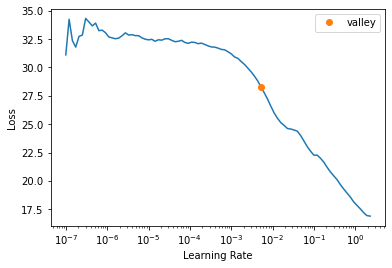

<Figure size 720x720 with 0 Axes>

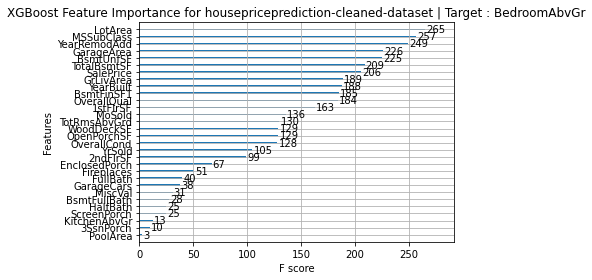

Target Variable: HalfBath
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
31
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',

  5%|▍         | 2/42 [00:00<00:07,  5.26it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.16548672007289822, 'Adjusted R-Squared': 0.06956565341461063, 'RMSE': 0.45631900725960256, 'Time taken': 0.2738633155822754}
{'Model': 'BaggingRegressor', 'R-Squared': 0.6158364277320798, 'Adjusted R-Squared': 0.5716796952874912, 'RMSE': 0.3096064669601745, 'Time taken': 0.12983489036560059}
{'Model': 'BayesianRidge', 'R-Squared': 0.5496226148247654, 'Adjusted R-Squared': 0.49785509928738203, 'RMSE': 0.3352279494207572, 'Time taken': 0.024742841720581055}


 14%|█▍        | 6/42 [00:00<00:02, 14.73it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.4784488836662749, 'Adjusted R-Squared': 0.4185004794899846, 'RMSE': 0.3607450433496902, 'Time taken': 0.04934072494506836}
{'Model': 'DummyRegressor', 'R-Squared': -0.006216216216216264, 'Adjusted R-Squared': -0.12187325256290782, 'RMSE': 0.5010690625846422, 'Time taken': 0.023623228073120117}
{'Model': 'ElasticNet', 'R-Squared': -0.006216216216216264, 'Adjusted R-Squared': -0.12187325256290782, 'RMSE': 0.50106907, 'Time taken': 0.026430130004882812}


 19%|█▉        | 8/42 [00:00<00:03, 10.21it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.5514580426116218, 'Adjusted R-Squared': 0.49990149578537135, 'RMSE': 0.33454418, 'Time taken': 0.2738475799560547}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.35492361927144533, 'Adjusted R-Squared': 0.28077690884287576, 'RMSE': 0.40119683960568414, 'Time taken': 0.028425931930541992}


 24%|██▍       | 10/42 [00:01<00:04,  7.16it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.6433619741480612, 'Adjusted R-Squared': 0.6023690976133556, 'RMSE': 0.2983085880403548, 'Time taken': 0.40961217880249023}
{'Model': 'GammaRegressor', 'R-Squared': 0.4116808354651801, 'Adjusted R-Squared': 0.3440579429899133, 'RMSE': 0.3831408256827004, 'Time taken': 0.028213024139404297}


 29%|██▊       | 12/42 [00:01<00:04,  7.10it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -5.217812795929724, 'Adjusted R-Squared': -5.932503921898658, 'RMSE': 1.2455774985731465, 'Time taken': 0.24785804748535156}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.4299116839988486, 'Adjusted R-Squared': 0.364384291355038, 'RMSE': 0.3771577211819642, 'Time taken': 0.03226113319396973}


 31%|███       | 13/42 [00:02<00:06,  4.66it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.6501279810230332, 'Adjusted R-Squared': 0.6099128064279795, 'RMSE': 0.29546533718563367, 'Time taken': 0.5274863243103027}


 33%|███▎      | 14/42 [00:02<00:08,  3.31it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6044258359339132, 'Adjusted R-Squared': 0.5589575412136734, 'RMSE': 0.3141708539031373, 'Time taken': 0.6243481636047363}


 40%|████      | 17/42 [00:03<00:05,  4.42it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.5285364366787644, 'Adjusted R-Squared': 0.47434522250390965, 'RMSE': 0.3429856893827436, 'Time taken': 0.3819303512573242}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.47405687426556975, 'Adjusted R-Squared': 0.4136036414225317, 'RMSE': 0.36226078550172774, 'Time taken': 0.07991147041320801}
{'Model': 'KernelRidge', 'R-Squared': -6.962204773235721, 'Adjusted R-Squared': -7.8774007241823565, 'RMSE': 1.4095114, 'Time taken': 0.08498311042785645}


 45%|████▌     | 19/42 [00:03<00:04,  5.63it/s]

{'Model': 'Lars', 'R-Squared': 0.5243033249720143, 'Adjusted R-Squared': 0.4696255462331653, 'RMSE': 0.3445220247187159, 'Time taken': 0.05281853675842285}
{'Model': 'LarsCV', 'R-Squared': 0.55474698343919, 'Adjusted R-Squared': 0.5035684757885222, 'RMSE': 0.33331539121424375, 'Time taken': 0.12456417083740234}
{'Model': 'Lasso', 'R-Squared': -0.006216216216216264, 'Adjusted R-Squared': -0.12187325256290782, 'RMSE': 0.50106907, 'Time taken': 0.027966976165771484}


 55%|█████▍    | 23/42 [00:04<00:02,  6.36it/s]

{'Model': 'LassoCV', 'R-Squared': 0.5526732239710881, 'Adjusted R-Squared': 0.5012563531631671, 'RMSE': 0.33409068, 'Time taken': 0.3572399616241455}
{'Model': 'LassoLars', 'R-Squared': -0.006216216216216264, 'Adjusted R-Squared': -0.12187325256290782, 'RMSE': 0.5010690625846422, 'Time taken': 0.05531597137451172}
{'Model': 'LassoLarsCV', 'R-Squared': 0.552589009910236, 'Adjusted R-Squared': 0.5011624593252055, 'RMSE': 0.33412214191906275, 'Time taken': 0.14355015754699707}
{'Model': 'LassoLarsIC', 'R-Squared': 0.5512162298647019, 'Adjusted R-Squared': 0.49963188846983997, 'RMSE': 0.3346343386708998, 'Time taken': 0.038800716400146484}
{'Model': 'LinearRegression', 'R-Squared': 0.541791359075251, 'Adjusted R-Squared': 0.489123699198843, 'RMSE': 0.3381299, 'Time taken': 0.026424884796142578}


 62%|██████▏   | 26/42 [00:04<00:02,  7.46it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.4724216546557616, 'Adjusted R-Squared': 0.4117804655357341, 'RMSE': 0.3628235043433397, 'Time taken': 0.22791743278503418}


 64%|██████▍   | 27/42 [00:07<00:08,  1.68it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.3633334735491063, 'Adjusted R-Squared': 0.2901534130375093, 'RMSE': 0.39857306042689594, 'Time taken': 2.9417433738708496}


 76%|███████▌  | 32/42 [00:07<00:02,  3.56it/s]

{'Model': 'NuSVR', 'R-Squared': 0.54026792785882, 'Adjusted R-Squared': 0.4874251609460407, 'RMSE': 0.3386915285694618, 'Time taken': 0.35315513610839844}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.5689641601325779, 'Adjusted R-Squared': 0.5194198107225294, 'RMSE': 0.32795074677563796, 'Time taken': 0.018996238708496094}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.5644189327581135, 'Adjusted R-Squared': 0.5143521434199656, 'RMSE': 0.3296753153312923, 'Time taken': 0.043216705322265625}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.35774767833931387, 'Adjusted R-Squared': 0.2839255724013039, 'RMSE': 0.4003176829945278, 'Time taken': 0.029390811920166016}
{'Model': 'PoissonRegressor', 'R-Squared': 0.44777098112871216, 'Adjusted R-Squared': 0.3842963812584491, 'RMSE': 0.37120305787597074, 'Time taken': 0.03569293022155762}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because ea

 86%|████████▌ | 36/42 [00:09<00:01,  3.57it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.6456101339600471, 'Adjusted R-Squared': 0.6048756665991328, 'RMSE': 0.2973668690263267, 'Time taken': 0.9733114242553711}
{'Model': 'Ridge', 'R-Squared': 0.5423778492524469, 'Adjusted R-Squared': 0.48977760204008447, 'RMSE': 0.33791342, 'Time taken': 0.03928971290588379}
{'Model': 'RidgeCV', 'R-Squared': 0.5467041032822502, 'Adjusted R-Squared': 0.494601126648026, 'RMSE': 0.33631235862606107, 'Time taken': 0.08009576797485352}


 90%|█████████ | 38/42 [00:09<00:00,  4.29it/s]

{'Model': 'SGDRegressor', 'R-Squared': 0.551519951743282, 'Adjusted R-Squared': 0.4999705209091765, 'RMSE': 0.3345210848296418, 'Time taken': 0.07755160331726074}
{'Model': 'SVR', 'R-Squared': 0.5547687212574808, 'Adjusted R-Squared': 0.5035927122066164, 'RMSE': 0.3333072546743725, 'Time taken': 0.14357495307922363}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.541791359075251, 'Adjusted R-Squared': 0.489123699198843, 'RMSE': 0.3381299, 'Time taken': 0.021074295043945312}
{'Model': 'TweedieRegressor', 'R-Squared': 0.4299116839988486, 'Adjusted R-Squared': 0.364384291355038, 'RMSE': 0.3771577211819642, 'Time taken': 0.03315114974975586}


100%|██████████| 42/42 [00:09<00:00,  4.26it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.5748206374291966, 'Adjusted R-Squared': 0.5259494463291043, 'RMSE': 0.32571518, 'Time taken': 0.28235387802124023}
{'Model': 'LGBMRegressor', 'R-Squared': 0.6169499976880588, 'Adjusted R-Squared': 0.5729212617901345, 'RMSE': 0.3091574151871528, 'Time taken': 0.19458675384521484}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: HalfBath
HalfBath
Target Standard Deviation: 0.5032003740443326
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.61       0.65  0.30        0.53
RandomForestRegressor                        0.60       0.65  0.30        0.97
ExtraTreesRegressor                          0.60       0.64  0.30        0.41
LGBMRegressor                                0.57       0.62  0.31        0.19
BaggingRegressor                             0.57 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,4.070538,1.041644,1.020609,00:00
1,2.764728,0.636706,0.797939,00:00
2,1.938974,1.184582,1.088385,00:01


Better model found at epoch 0 with _rmse value: 1.0206094980239868.
Better model found at epoch 1 with _rmse value: 0.7979385256767273.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.10
1       2       1.98
2       1       1.85
3       2       1.04
4       2       2.01
XGBoost RMSE:  0.32412896


<Figure size 432x288 with 0 Axes>

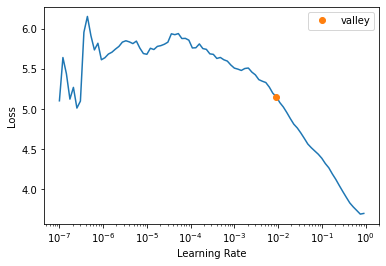

<Figure size 720x720 with 0 Axes>

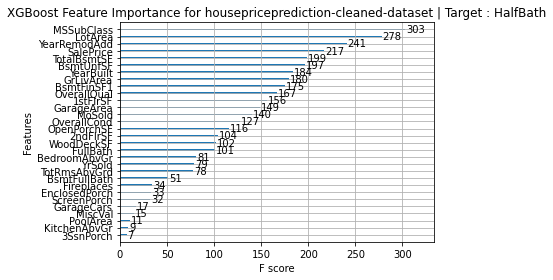

Target Variable: FullBath
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
31
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',

  5%|▍         | 2/42 [00:00<00:07,  5.48it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.31350816555513805, 'Adjusted R-Squared': 0.23460105814768262, 'RMSE': 0.4322965426904878, 'Time taken': 0.2635009288787842}
{'Model': 'BaggingRegressor', 'R-Squared': 0.631398905691267, 'Adjusted R-Squared': 0.5890309638167, 'RMSE': 0.31676878910875145, 'Time taken': 0.12283205986022949}
{'Model': 'BayesianRidge', 'R-Squared': 0.5906259248890895, 'Adjusted R-Squared': 0.5435714334970307, 'RMSE': 0.3338291390615773, 'Time taken': 0.02103877067565918}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.43388910430399374, 'Adjusted R-Squared': 0.36881888640790106, 'RMSE': 0.39256794194266026, 'Time taken': 0.050824880599975586}


 14%|█▍        | 6/42 [00:00<00:02, 15.16it/s]

{'Model': 'DummyRegressor', 'R-Squared': -0.0002692688811340993, 'Adjusted R-Squared': -0.11524274806287371, 'RMSE': 0.5218221832004558, 'Time taken': 0.02524590492248535}
{'Model': 'ElasticNet', 'R-Squared': -0.00026928296889772163, 'Adjusted R-Squared': -0.11524276376992049, 'RMSE': 0.5218222, 'Time taken': 0.025691986083984375}


 19%|█▉        | 8/42 [00:00<00:03,  8.92it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.5938625673699283, 'Adjusted R-Squared': 0.5471801038492303, 'RMSE': 0.33250684, 'Time taken': 0.3386805057525635}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.24518547240532496, 'Adjusted R-Squared': 0.15842518187720134, 'RMSE': 0.45329841391162456, 'Time taken': 0.04405951499938965}


 24%|██▍       | 10/42 [00:01<00:04,  6.70it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.717995002369566, 'Adjusted R-Squared': 0.685580634825838, 'RMSE': 0.2770718961144171, 'Time taken': 0.4146440029144287}
{'Model': 'GammaRegressor', 'R-Squared': 0.5377424586466665, 'Adjusted R-Squared': 0.48460940791639817, 'RMSE': 0.35473666345361193, 'Time taken': 0.028539657592773438}


 26%|██▌       | 11/42 [00:01<00:05,  5.87it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -15.970005482142756, 'Adjusted R-Squared': -17.92058082491779, 'RMSE': 2.1493397253567035, 'Time taken': 0.2518148422241211}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.5570184260932923, 'Adjusted R-Squared': 0.506101003805165, 'RMSE': 0.34726171462152516, 'Time taken': 0.03174877166748047}


 31%|███       | 13/42 [00:02<00:06,  4.73it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.7314526161973673, 'Adjusted R-Squared': 0.7005851008177544, 'RMSE': 0.2703799835280375, 'Time taken': 0.5323481559753418}


 33%|███▎      | 14/42 [00:02<00:08,  3.15it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6895713137064625, 'Adjusted R-Squared': 0.653889855511803, 'RMSE': 0.29069997728980823, 'Time taken': 0.7354729175567627}


 38%|███▊      | 16/42 [00:03<00:06,  3.89it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.5932721598211527, 'Adjusted R-Squared': 0.5465218333638139, 'RMSE': 0.33274843733117826, 'Time taken': 0.23442649841308594}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.6029675584852009, 'Adjusted R-Squared': 0.5573316456674078, 'RMSE': 0.328758561532353, 'Time taken': 0.11314511299133301}


 40%|████      | 17/42 [00:03<00:05,  4.45it/s]

{'Model': 'KernelRidge', 'R-Squared': -22.95260091972425, 'Adjusted R-Squared': -25.705773439232786, 'RMSE': 2.5535269, 'Time taken': 0.12607693672180176}
{'Model': 'Lars', 'R-Squared': -0.5760782634932216, 'Adjusted R-Squared': -0.7572366845843965, 'RMSE': 0.6550175919492968, 'Time taken': 0.06568694114685059}


 45%|████▌     | 19/42 [00:03<00:04,  5.38it/s]

{'Model': 'LarsCV', 'R-Squared': -0.05555123676746465, 'Adjusted R-Squared': -0.17687896513154122, 'RMSE': 0.5360480664226859, 'Time taken': 0.19840764999389648}
{'Model': 'Lasso', 'R-Squared': -0.00026928296889772163, 'Adjusted R-Squared': -0.11524276376992049, 'RMSE': 0.5218222, 'Time taken': 0.05604267120361328}


 55%|█████▍    | 23/42 [00:04<00:03,  5.76it/s]

{'Model': 'LassoCV', 'R-Squared': 0.5937092694817901, 'Adjusted R-Squared': 0.5470091855141798, 'RMSE': 0.3325696, 'Time taken': 0.4616243839263916}
{'Model': 'LassoLars', 'R-Squared': -0.0002692690865699898, 'Adjusted R-Squared': -0.11524274829192294, 'RMSE': 0.5218221832540418, 'Time taken': 0.044527292251586914}
{'Model': 'LassoLarsCV', 'R-Squared': 0.5937396734555708, 'Adjusted R-Squared': 0.5470430841975904, 'RMSE': 0.3325571433686845, 'Time taken': 0.14728999137878418}


 60%|█████▉    | 25/42 [00:04<00:02,  7.18it/s]

{'Model': 'LassoLarsIC', 'R-Squared': 0.5919306360337985, 'Adjusted R-Squared': 0.5450261114399821, 'RMSE': 0.33329674312679713, 'Time taken': 0.07487297058105469}
{'Model': 'LinearRegression', 'R-Squared': 0.5853936205781827, 'Adjusted R-Squared': 0.537737714897514, 'RMSE': 0.33595574, 'Time taken': 0.04636645317077637}


 62%|██████▏   | 26/42 [00:04<00:02,  6.67it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.5848322071482079, 'Adjusted R-Squared': 0.5371117711882318, 'RMSE': 0.3361831188727774, 'Time taken': 0.1910860538482666}


 64%|██████▍   | 27/42 [00:07<00:10,  1.39it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.26495032051250855, 'Adjusted R-Squared': 0.18046185160590023, 'RMSE': 0.44732422750962003, 'Time taken': 2.7859439849853516}


 76%|███████▌  | 32/42 [00:07<00:02,  3.50it/s]

{'Model': 'NuSVR', 'R-Squared': 0.6635005749290445, 'Adjusted R-Squared': 0.6248224800933024, 'RMSE': 0.3026608431624265, 'Time taken': 0.3276972770690918}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.4797829053440652, 'Adjusted R-Squared': 0.4199878369928083, 'RMSE': 0.37631920620959813, 'Time taken': 0.020236968994140625}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.5337938148221262, 'Adjusted R-Squared': 0.48020689698558894, 'RMSE': 0.35624853728162686, 'Time taken': 0.043170928955078125}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.033053298187877056, 'Adjusted R-Squared': -0.1517950566002768, 'RMSE': 0.5303046541190451, 'Time taken': 0.029179811477661133}
{'Model': 'PoissonRegressor', 'R-Squared': 0.5640061962723983, 'Adjusted R-Squared': 0.5138919659588809, 'RMSE': 0.34451190412236854, 'Time taken': 0.03560781478881836}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped becau

 88%|████████▊ | 37/42 [00:09<00:01,  3.84it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.6965846882943432, 'Adjusted R-Squared': 0.661709365109785, 'RMSE': 0.28739739086145616, 'Time taken': 1.0790894031524658}
{'Model': 'Ridge', 'R-Squared': 0.5859045084630079, 'Adjusted R-Squared': 0.5383073255277214, 'RMSE': 0.33574867, 'Time taken': 0.0362393856048584}
{'Model': 'RidgeCV', 'R-Squared': 0.588605002230979, 'Adjusted R-Squared': 0.5413182208782179, 'RMSE': 0.33465211778402487, 'Time taken': 0.05887460708618164}
{'Model': 'SGDRegressor', 'R-Squared': 0.5849562678465114, 'Adjusted R-Squared': 0.537250091736915, 'RMSE': 0.3361328858954062, 'Time taken': 0.048940420150756836}


 93%|█████████▎| 39/42 [00:09<00:00,  4.61it/s]

{'Model': 'SVR', 'R-Squared': 0.6542630615464476, 'Adjusted R-Squared': 0.6145231835632807, 'RMSE': 0.30678700899443795, 'Time taken': 0.17236661911010742}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.5853936205781827, 'Adjusted R-Squared': 0.537737714897514, 'RMSE': 0.33595574, 'Time taken': 0.01918792724609375}
{'Model': 'TweedieRegressor', 'R-Squared': 0.5570184260932923, 'Adjusted R-Squared': 0.506101003805165, 'RMSE': 0.34726171462152516, 'Time taken': 0.03338003158569336}


 98%|█████████▊| 41/42 [00:09<00:00,  4.96it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.6661594520172047, 'Adjusted R-Squared': 0.6277869752375731, 'RMSE': 0.3014627, 'Time taken': 0.28389573097229004}


100%|██████████| 42/42 [00:10<00:00,  4.13it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.7096070415091599, 'Adjusted R-Squared': 0.6762285405332011, 'RMSE': 0.2811623179043072, 'Time taken': 0.2076268196105957}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: FullBath
FullBath
Target Standard Deviation: 0.5577225919624271
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.70       0.73  0.27        0.53
ExtraTreesRegressor                          0.69       0.72  0.28        0.41
LGBMRegressor                                0.68       0.71  0.28        0.21
RandomForestRegressor                        0.66       0.70  0.29        1.08
HistGradientBoostingRegressor                0.65       0.69  0.29        0.74
XGBRegressor                                 0.63       0.67  0.30        0.28
NuSVR                                        0.62

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3.931858,2.375977,1.541420,00:00
1,2.667236,1.095236,1.046535,00:00
2,1.771752,1.145997,1.070512,00:00


Better model found at epoch 0 with _rmse value: 1.5414204597473145.
Better model found at epoch 1 with _rmse value: 1.0465350151062012.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       3       3.07
1       2       1.94
2       2       1.94
3       2       1.98
4       2       2.15
XGBoost RMSE:  0.29900151


<Figure size 432x288 with 0 Axes>

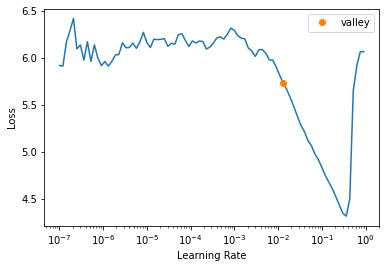

<Figure size 720x720 with 0 Axes>

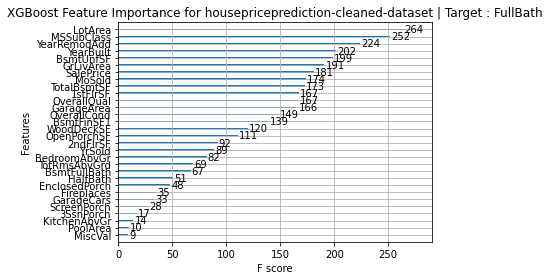

Target Variable: BsmtFullBath
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
31
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplac

  5%|▍         | 2/42 [00:00<00:07,  5.38it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.13827088181912717, 'Adjusted R-Squared': 0.03922155789029114, 'RMSE': 0.48716863725991705, 'Time taken': 0.29975271224975586}
{'Model': 'BaggingRegressor', 'R-Squared': 0.5085874888217008, 'Adjusted R-Squared': 0.4521032921345399, 'RMSE': 0.36788920309438905, 'Time taken': 0.10431981086730957}
{'Model': 'BayesianRidge', 'R-Squared': 0.5469439614186133, 'Adjusted R-Squared': 0.4948685546851206, 'RMSE': 0.35324001883617073, 'Time taken': 0.04201841354370117}


 10%|▉         | 4/42 [00:00<00:03,  9.61it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.04450027679598034, 'Adjusted R-Squared': -0.16455777987597808, 'RMSE': 0.5363499164507368, 'Time taken': 0.06704998016357422}
{'Model': 'DummyRegressor', 'R-Squared': -0.005152663629008236, 'Adjusted R-Squared': -0.12068745255188285, 'RMSE': 0.5261504564961269, 'Time taken': 0.022715330123901367}
{'Model': 'ElasticNet', 'R-Squared': -0.0051526921787272695, 'Adjusted R-Squared': -0.12068748438317867, 'RMSE': 0.52615047, 'Time taken': 0.02250504493713379}


 17%|█▋        | 7/42 [00:00<00:03,  9.99it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.5391219988791804, 'Adjusted R-Squared': 0.4861475159917299, 'RMSE': 0.3562763, 'Time taken': 0.24040532112121582}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.14201762977473043, 'Adjusted R-Squared': 0.0433989665304465, 'RMSE': 0.4861083931213425, 'Time taken': 0.030702590942382812}


 21%|██▏       | 9/42 [00:01<00:04,  6.62it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.561011455095175, 'Adjusted R-Squared': 0.5105530016578388, 'RMSE': 0.3477126825254453, 'Time taken': 0.45257067680358887}
{'Model': 'GammaRegressor', 'R-Squared': 0.4399726453595103, 'Adjusted R-Squared': 0.37560168505600566, 'RMSE': 0.39273405160573666, 'Time taken': 0.03169846534729004}


 26%|██▌       | 11/42 [00:01<00:04,  6.74it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -5.23432448678812, 'Adjusted R-Squared': -5.95091350825802, 'RMSE': 1.310354000821572, 'Time taken': 0.2529139518737793}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.45312670308354375, 'Adjusted R-Squared': 0.390267703437974, 'RMSE': 0.38809432886940654, 'Time taken': 0.031958580017089844}


 31%|███       | 13/42 [00:02<00:05,  5.17it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.5600241745196914, 'Adjusted R-Squared': 0.5094522405564376, 'RMSE': 0.3481034639981614, 'Time taken': 0.5361135005950928}


 36%|███▌      | 15/42 [00:02<00:06,  3.93it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.5335230399073627, 'Adjusted R-Squared': 0.4799049985174044, 'RMSE': 0.3584338661953164, 'Time taken': 0.6491596698760986}
{'Model': 'HuberRegressor', 'R-Squared': 0.5626583372227876, 'Adjusted R-Squared': 0.5123891805817287, 'RMSE': 0.3470598410211698, 'Time taken': 0.16176271438598633}


 43%|████▎     | 18/42 [00:03<00:04,  5.97it/s]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.42005365583613663, 'Adjusted R-Squared': 0.3533931565069569, 'RMSE': 0.39965738751743385, 'Time taken': 0.12005186080932617}
{'Model': 'KernelRidge', 'R-Squared': -7.259124124313608, 'Adjusted R-Squared': -8.208448736303678, 'RMSE': 1.5082068, 'Time taken': 0.09529757499694824}
{'Model': 'Lars', 'R-Squared': 0.5289225322298476, 'Adjusted R-Squared': 0.47477569685396803, 'RMSE': 0.36019701010808797, 'Time taken': 0.05852627754211426}


 45%|████▌     | 19/42 [00:03<00:03,  6.26it/s]

{'Model': 'LarsCV', 'R-Squared': 0.5149055360103987, 'Adjusted R-Squared': 0.45914755164377785, 'RMSE': 0.3655165928420325, 'Time taken': 0.12691211700439453}
{'Model': 'Lasso', 'R-Squared': -0.0051526921787272695, 'Adjusted R-Squared': -0.12068748438317867, 'RMSE': 0.52615047, 'Time taken': 0.02161264419555664}


 50%|█████     | 21/42 [00:03<00:03,  5.86it/s]

{'Model': 'LassoCV', 'R-Squared': 0.5412194555454397, 'Adjusted R-Squared': 0.48848605963112235, 'RMSE': 0.35546467, 'Time taken': 0.3478233814239502}
{'Model': 'LassoLars', 'R-Squared': -0.005152675690560882, 'Adjusted R-Squared': -0.12068746599982094, 'RMSE': 0.5261504596529565, 'Time taken': 0.04656076431274414}


 60%|█████▉    | 25/42 [00:04<00:02,  7.51it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.5373298099587762, 'Adjusted R-Squared': 0.48414932834484237, 'RMSE': 0.35696833777334425, 'Time taken': 0.24270915985107422}
{'Model': 'LassoLarsIC', 'R-Squared': 0.547450795626973, 'Adjusted R-Squared': 0.4954336456990388, 'RMSE': 0.3530423785781291, 'Time taken': 0.08916854858398438}
{'Model': 'LinearRegression', 'R-Squared': 0.5528825025630397, 'Adjusted R-Squared': 0.501489686765688, 'RMSE': 0.3509173, 'Time taken': 0.05998063087463379}


 62%|██████▏   | 26/42 [00:04<00:02,  6.41it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.54614786736611, 'Adjusted R-Squared': 0.49398095556911115, 'RMSE': 0.3535502330574948, 'Time taken': 0.243574857711792}


 64%|██████▍   | 27/42 [00:07<00:11,  1.36it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.3781463341978315, 'Adjusted R-Squared': 0.3066689013470075, 'RMSE': 0.41384530923407353, 'Time taken': 2.8211469650268555}


 74%|███████▍  | 31/42 [00:07<00:03,  3.02it/s]

{'Model': 'NuSVR', 'R-Squared': 0.4915199914843692, 'Adjusted R-Squared': 0.4330740134940668, 'RMSE': 0.3742233472449939, 'Time taken': 0.2697582244873047}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.47954460026158674, 'Adjusted R-Squared': 0.4197221405215392, 'RMSE': 0.37860443495213997, 'Time taken': 0.01819920539855957}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.4916691565064294, 'Adjusted R-Squared': 0.43324032392096146, 'RMSE': 0.3741684531219663, 'Time taken': 0.06366634368896484}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.16621385364981123, 'Adjusted R-Squared': 0.07037636556358251, 'RMSE': 0.4792049274401235, 'Time taken': 0.03339123725891113}
{'Model': 'PoissonRegressor', 'R-Squared': 0.46952990749208323, 'Adjusted R-Squared': 0.4085563336405985, 'RMSE': 0.3822296647148792, 'Time taken': 0.046094417572021484}


 79%|███████▊  | 33/42 [00:07<00:02,  3.80it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 83%|████████▎ | 35/42 [00:08<00:02,  3.00it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.5684448153983732, 'Adjusted R-Squared': 0.5188407711912897, 'RMSE': 0.3447562172246767, 'Time taken': 0.9517700672149658}
{'Model': 'Ridge', 'R-Squared': 0.552621297383195, 'Adjusted R-Squared': 0.5011984580019531, 'RMSE': 0.35101977, 'Time taken': 0.018507957458496094}
{'Model': 'RidgeCV', 'R-Squared': 0.5506749360641396, 'Adjusted R-Squared': 0.4990283769910522, 'RMSE': 0.35178252351383016, 'Time taken': 0.03104543685913086}
{'Model': 'SGDRegressor', 'R-Squared': 0.5403059321764547, 'Adjusted R-Squared': 0.4874675335760472, 'RMSE': 0.35581838757033407, 'Time taken': 0.030248165130615234}


 90%|█████████ | 38/42 [00:09<00:00,  4.27it/s]

{'Model': 'SVR', 'R-Squared': 0.49273285912855624, 'Adjusted R-Squared': 0.43442629121229825, 'RMSE': 0.37377676688284384, 'Time taken': 0.19583487510681152}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.5528825025630397, 'Adjusted R-Squared': 0.501489686765688, 'RMSE': 0.3509173, 'Time taken': 0.017248868942260742}
{'Model': 'TweedieRegressor', 'R-Squared': 0.45312670308354375, 'Adjusted R-Squared': 0.390267703437974, 'RMSE': 0.38809432886940654, 'Time taken': 0.04849076271057129}


 98%|█████████▊| 41/42 [00:09<00:00,  5.24it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.5220521438559316, 'Adjusted R-Squared': 0.4671156086669581, 'RMSE': 0.36281413, 'Time taken': 0.28112244606018066}


100%|██████████| 42/42 [00:09<00:00,  4.31it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.5258782226859003, 'Adjusted R-Squared': 0.47138146667278535, 'RMSE': 0.3613590114486284, 'Time taken': 0.21953463554382324}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: BsmtFullBath
BsmtFullBath
Target Standard Deviation: 0.516930472989403
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.52       0.57  0.34        0.95
HuberRegressor                               0.51       0.56  0.35        0.16
ExtraTreesRegressor                          0.51       0.56  0.35        0.45
GradientBoostingRegressor                    0.51       0.56  0.35        0.54
LinearRegression                             0.50       0.55  0.35        0.06
TransformedTargetRegressor                   0.50       0.55  0.35        0.02
Ridge                                   

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3.520632,0.745655,0.863513,00:00
1,2.346946,0.716608,0.846527,00:00
2,1.652431,0.771982,0.878625,00:00


Better model found at epoch 0 with _rmse value: 0.8635134100914001.
Better model found at epoch 1 with _rmse value: 0.846527099609375.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       1.58
1       1       1.02
2       1       1.63
3       2       1.49
4       2       1.20
XGBoost RMSE:  0.36354288


<Figure size 432x288 with 0 Axes>

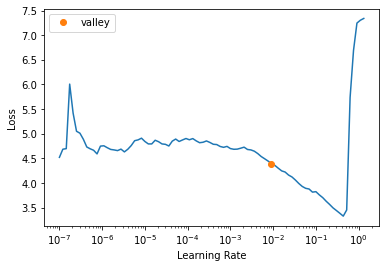

<Figure size 720x720 with 0 Axes>

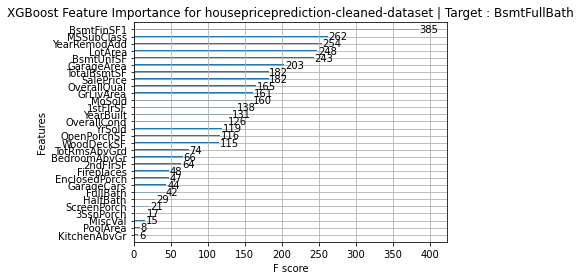

Target Variable: GrLivArea
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
30
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch

  5%|▍         | 2/42 [00:00<00:07,  5.66it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8766898252859685, 'Adjusted R-Squared': 0.8625162419855051, 'RMSE': 178.5302669956125, 'Time taken': 0.24712824821472168}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9727717467381822, 'Adjusted R-Squared': 0.9696420624552147, 'RMSE': 83.89233621340192, 'Time taken': 0.12600207328796387}
{'Model': 'BayesianRidge', 'R-Squared': 0.990722829604288, 'Adjusted R-Squared': 0.9896564881794936, 'RMSE': 48.96887927466119, 'Time taken': 0.038993120193481445}


 10%|▉         | 4/42 [00:00<00:04,  8.88it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9595665823245715, 'Adjusted R-Squared': 0.9549190630515337, 'RMSE': 102.23100352726554, 'Time taken': 0.10866236686706543}
{'Model': 'DummyRegressor', 'R-Squared': -0.0033155991344964164, 'Adjusted R-Squared': -0.11863923121892128, 'RMSE': 509.25015, 'Time taken': 0.012268781661987305}
{'Model': 'ElasticNet', 'R-Squared': 0.9018256218164454, 'Adjusted R-Squared': 0.8905412105309793, 'RMSE': 159.29842, 'Time taken': 0.017955541610717773}


 17%|█▋        | 7/42 [00:00<00:03, 10.06it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9086039552907694, 'Adjusted R-Squared': 0.8980986627954556, 'RMSE': 153.70079, 'Time taken': 0.23450231552124023}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.891585336446566, 'Adjusted R-Squared': 0.8791238808657116, 'RMSE': 167.400369060656, 'Time taken': 0.03565263748168945}


 21%|██▏       | 9/42 [00:01<00:06,  4.98it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9705714854531076, 'Adjusted R-Squared': 0.9671888975741544, 'RMSE': 87.21608107422166, 'Time taken': 0.7312219142913818}
{'Model': 'GammaRegressor', 'R-Squared': 0.8421004896261599, 'Adjusted R-Squared': 0.8239511206176725, 'RMSE': 202.02391806790772, 'Time taken': 0.02778148651123047}


 26%|██▌       | 11/42 [00:01<00:05,  5.60it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -6.758109817206659, 'Adjusted R-Squared': -7.649846577805127, 'RMSE': 1416.0883807591217, 'Time taken': 0.2397139072418213}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.8587323393826451, 'Adjusted R-Squared': 0.8424946772427193, 'RMSE': 191.08815824200275, 'Time taken': 0.03577709197998047}


 31%|███       | 13/42 [00:02<00:06,  4.78it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9790592993055365, 'Adjusted R-Squared': 0.9766523222142188, 'RMSE': 73.57122759725739, 'Time taken': 0.5045132637023926}


 33%|███▎      | 14/42 [00:03<00:08,  3.49it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9680582303383646, 'Adjusted R-Squared': 0.9643867625611651, 'RMSE': 90.86400698455292, 'Time taken': 0.6202847957611084}


 38%|███▊      | 16/42 [00:04<00:09,  2.86it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9901470397363005, 'Adjusted R-Squared': 0.9890145155680592, 'RMSE': 50.46563747738186, 'Time taken': 0.9154436588287354}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7683897346245645, 'Adjusted R-Squared': 0.7417678650411811, 'RMSE': 244.67596, 'Time taken': 0.11660552024841309}


 45%|████▌     | 19/42 [00:04<00:04,  4.67it/s]

{'Model': 'KernelRidge', 'R-Squared': -7.841701195601301, 'Adjusted R-Squared': -8.857988689348577, 'RMSE': 1511.7512, 'Time taken': 0.1414165496826172}
{'Model': 'Lars', 'R-Squared': 0.9883109235010861, 'Adjusted R-Squared': 0.9869673514897167, 'RMSE': 54.96705869784946, 'Time taken': 0.05290865898132324}
{'Model': 'LarsCV', 'R-Squared': 0.9902317566455495, 'Adjusted R-Squared': 0.989108970053084, 'RMSE': 50.248214372827114, 'Time taken': 0.12194299697875977}
{'Model': 'Lasso', 'R-Squared': 0.9908677806665139, 'Adjusted R-Squared': 0.9898181002833546, 'RMSE': 48.584816, 'Time taken': 0.02940058708190918}


 55%|█████▍    | 23/42 [00:04<00:02,  6.60it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9908879186182102, 'Adjusted R-Squared': 0.9898405529421425, 'RMSE': 48.531216, 'Time taken': 0.21446585655212402}
{'Model': 'LassoLars', 'R-Squared': 0.978933914753274, 'Adjusted R-Squared': 0.9765125256444549, 'RMSE': 73.79115644070323, 'Time taken': 0.04647541046142578}
{'Model': 'LassoLarsCV', 'R-Squared': 0.9908643849001803, 'Adjusted R-Squared': 0.9898143141990515, 'RMSE': 48.59384843370697, 'Time taken': 0.1432790756225586}


 62%|██████▏   | 26/42 [00:04<00:01,  9.37it/s]

{'Model': 'LassoLarsIC', 'R-Squared': 0.9902826811323809, 'Adjusted R-Squared': 0.9891657479292063, 'RMSE': 50.11706447348181, 'Time taken': 0.04244685173034668}
{'Model': 'LinearRegression', 'R-Squared': 0.990712689734779, 'Adjusted R-Squared': 0.989645182807742, 'RMSE': 48.995632, 'Time taken': 0.044344425201416016}
{'Model': 'LinearSVR', 'R-Squared': 0.007758806241980554, 'Adjusted R-Squared': -0.10629190568422864, 'RMSE': 506.431865686519, 'Time taken': 0.046631813049316406}


 67%|██████▋   | 28/42 [00:07<00:06,  2.06it/s]

{'Model': 'MLPRegressor', 'R-Squared': -1.609185991654063, 'Adjusted R-Squared': -1.9090924274763692, 'RMSE': 821.2302099302428, 'Time taken': 2.6613361835479736}
{'Model': 'NuSVR', 'R-Squared': 0.09010797336439114, 'Adjusted R-Squared': -0.014477317053495087, 'RMSE': 484.9615729087104, 'Time taken': 0.16894197463989258}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8339398227524901, 'Adjusted R-Squared': 0.8148524460573741, 'RMSE': 207.1787204484859, 'Time taken': 0.01894092559814453}


 79%|███████▊  | 33/42 [00:08<00:02,  4.06it/s]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9910198555537856, 'Adjusted R-Squared': 0.9899876550427265, 'RMSE': 48.17858704774706, 'Time taken': 0.05781722068786621}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9901488615626234, 'Adjusted R-Squared': 0.9890165467997065, 'RMSE': 50.46097167773222, 'Time taken': 0.03361773490905762}
{'Model': 'PoissonRegressor', 'R-Squared': 0.9463297010640458, 'Adjusted R-Squared': 0.9401607011863499, 'RMSE': 117.78213030448421, 'Time taken': 0.07076597213745117}
{'Model': 'RANSACRegressor', 'R-Squared': 0.9903076050262758, 'Adjusted R-Squared': 0.9891935366384914, 'RMSE': 50.05275, 'Time taken': 0.0429842472076416}


 83%|████████▎ | 35/42 [00:09<00:02,  2.93it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9762953975569044, 'Adjusted R-Squared': 0.9735707306094221, 'RMSE': 78.27602007534375, 'Time taken': 1.156944751739502}
{'Model': 'Ridge', 'R-Squared': 0.990755338204857, 'Adjusted R-Squared': 0.9896927334008175, 'RMSE': 48.88301, 'Time taken': 0.017691850662231445}
{'Model': 'RidgeCV', 'R-Squared': 0.9907178788606673, 'Adjusted R-Squared': 0.989650968384882, 'RMSE': 48.98194360470902, 'Time taken': 0.028749465942382812}
{'Model': 'SGDRegressor', 'R-Squared': 0.9908123880014675, 'Adjusted R-Squared': 0.9897563406453144, 'RMSE': 48.73194227062861, 'Time taken': 0.04765653610229492}


 90%|█████████ | 38/42 [00:09<00:00,  4.06it/s]

{'Model': 'SVR', 'R-Squared': 0.1183706690013463, 'Adjusted R-Squared': 0.017033964288857284, 'RMSE': 477.3703193337244, 'Time taken': 0.17264103889465332}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.990712689734779, 'Adjusted R-Squared': 0.989645182807742, 'RMSE': 48.995632, 'Time taken': 0.02234172821044922}
{'Model': 'TweedieRegressor', 'R-Squared': 0.8587323393826451, 'Adjusted R-Squared': 0.8424946772427193, 'RMSE': 191.08815824200275, 'Time taken': 0.036620140075683594}


 98%|█████████▊| 41/42 [00:09<00:00,  4.99it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9786536230313192, 'Adjusted R-Squared': 0.976200016483195, 'RMSE': 74.28044, 'Time taken': 0.2813591957092285}


100%|██████████| 42/42 [00:10<00:00,  4.19it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9685358808931823, 'Adjusted R-Squared': 0.9649193154786055, 'RMSE': 90.18206729081119, 'Time taken': 0.2106950283050537}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: GrLivArea
GrLivArea
Target Standard Deviation: 529.27734375
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
OrthogonalMatchingPursuitCV                  0.99       0.99   48.18   
LassoCV                                      0.99       0.99   48.53   
Lasso                                        0.99       0.99   48.58   
LassoLarsCV                                  0.99       0.99   48.59   
SGDRegressor                                 0.99       0.99   48.73   
Ridge                                        0.99       0.99   48.88   
BayesianRidge                                0.99       0.99   48.97   
RidgeCV                               

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,2536554.500000,2606801.250000,1614.559204,00:00
1,2458308.500000,2367661.250000,1538.720581,00:00
2,2025506.875000,424971.843750,651.898621,00:01
3,1307393.250000,9450520.000000,3074.169922,00:00


Better model found at epoch 0 with _rmse value: 1614.5592041015625.
Better model found at epoch 1 with _rmse value: 1538.7205810546875.
Better model found at epoch 2 with _rmse value: 651.8986206054688.
No improvement since epoch 2: early stopping


,MSSubClass,OverallQual,OverallCond,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,LotArea,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,GrLivArea,GrLivArea_pred
0,1.00,6.00,6.00,15.00,1.00,2.00,2.00,4.00,2.00,5.00,1.00,3.00,1.00,1.00,1.00,2.00,4.00,-0.04,-0.24,-0.54,0.96,1.04,0.94,-0.80,0.01,-0.76,-0.70,-0.36,2.78,-0.17,1516.00,1417.15
1,6.00,8.00,5.00,49.00,2.00,3.00,2.00,4.00,2.00,6.00,2.00,4.00,1.00,1.00,1.00,6.00,1.00,-0.10,0.85,1.37,-0.55,0.77,0.65,1.46,1.83,-0.76,0.35,-0.36,-0.25,2.12,2392.00,1500.16
2,12.00,9.00,5.00,59.00,2.00,2.00,2.00,2.00,2.00,6.00,2.00,4.00,1.00,1.00,1.00,10.00,3.00,-0.17,1.21,2.38,-0.92,1.47,1.42,-0.80,2.67,-0.76,0.38,-0.36,4.22,2.36,1702.00,1435.70
3,8.00,6.00,6.00,45.00,1.00,3.00,1.00,6.00,2.00,9.00,1.00,3.00,1.00,1.00,1.00,7.00,4.00,0.15,-1.82,-0.97,0.66,-0.48,0.75,0.78,-0.14,-0.76,0.20,4.06,-0.25,0.43,2134.00,719.74
4,2.00,5.00,8.00,1.00,1.00,2.00,1.00,3.00,2.00,3.00,1.00,1.00,1.00,1.00,1.00,7.00,4.00,-0.65,-1.62,-0.97,0.70,-0.43,-0.76,-0.80,-2.16,-0.76,0.74,-0.36,-0.25,-1.02,864.00,778.68
5,8.00,4.00,5.00,1.00,2.00,2.00,1.00,6.00,2.00,9.00,1.00,2.00,1.00,1.00,1.00,3.00,1.00,-0.43,-1.95,-0.97,0.54,-0.59,-0.53,1.02,-0.14,-0.76,2.12,-0.36,-0.25,-0.79,2230.00,859.14
6,6.00,8.00,5.00,57.00,1.00,3.00,2.00,4.00,2.00,7.00,2.00,4.00,1.00,1.00,1.00,8.00,1.00,0.03,1.15,-0.97,1.24,0.09,-0.16,1.13,2.68,0.77,0.07,-0.36,-0.25,1.08,1939.00,901.43
7,1.00,7.00,5.00,57.00,1.00,3.00,1.00,4.00,2.00,6.00,1.00,4.00,1.00,1.00,1.00,7.00,1.00,-0.03,1.11,-0.92,2.24,1.13,1.03,-0.80,1.43,0.38,-0.40,-0.36,-0.25,0.41,1552.00,1578.91
8,1.00,5.00,5.00,7.00,2.00,2.00,1.00,4.00,2.00,5.00,1.00,2.00,1.00,1.00,1.00,6.00,2.00,-0.02,-0.50,0.31,-0.23,-0.01,-0.28,-0.80,-0.85,-0.76,-0.40,-0.36,3.58,-0.58,1048.00,785.39


<Figure size 432x288 with 0 Axes>

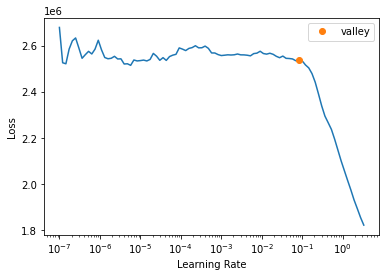

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  864.00     848.50
1 1792.00    1759.48
2 1680.00    1640.69
3 2520.00    2547.94
4 1768.00    1752.62
XGBoost RMSE:  74.48601


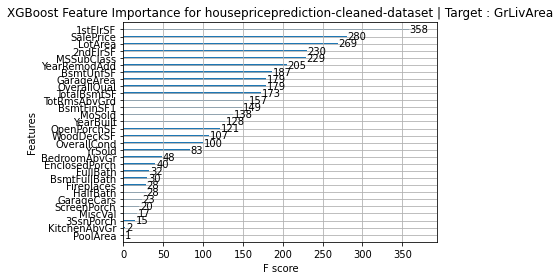

Target Variable: 2ndFlrSF
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
30
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorc

  7%|▋         | 3/42 [00:00<00:04,  8.89it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8909448401802715, 'Adjusted R-Squared': 0.8784097643389235, 'RMSE': 140.48481112017268, 'Time taken': 0.24342679977416992}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9762310412080084, 'Adjusted R-Squared': 0.9734989769790439, 'RMSE': 65.58602972066954, 'Time taken': 0.09606719017028809}
{'Model': 'BayesianRidge', 'R-Squared': 0.9911346895988328, 'Adjusted R-Squared': 0.9901156884032963, 'RMSE': 40.05467716279075, 'Time taken': 0.03595566749572754}


 12%|█▏        | 5/42 [00:00<00:03, 11.88it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.970898984034168, 'Adjusted R-Squared': 0.9675540396702792, 'RMSE': 72.57053724971539, 'Time taken': 0.08585715293884277}
{'Model': 'DummyRegressor', 'R-Squared': -0.004416027525356858, 'Adjusted R-Squared': -0.11986614563171982, 'RMSE': 426.34686, 'Time taken': 0.02427363395690918}
{'Model': 'ElasticNet', 'R-Squared': 0.8045160087407647, 'Adjusted R-Squared': 0.7820465844580939, 'RMSE': 188.08833, 'Time taken': 0.027503490447998047}


 17%|█▋        | 7/42 [00:00<00:03,  9.89it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8498079083090178, 'Adjusted R-Squared': 0.8325444494939623, 'RMSE': 164.86551, 'Time taken': 0.218491792678833}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.8402418066152118, 'Adjusted R-Squared': 0.8218787958813281, 'RMSE': 170.03480707325295, 'Time taken': 0.0311892032623291}


 21%|██▏       | 9/42 [00:01<00:05,  6.20it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9472088918750536, 'Adjusted R-Squared': 0.9411409484124161, 'RMSE': 97.74322217681822, 'Time taken': 0.4889242649078369}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:01<00:04,  7.01it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.161294018711035, 'Adjusted R-Squared': -0.294776089827246, 'RMSE': 458.4345672656031, 'Time taken': 0.20479512214660645}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7232174743108388, 'Adjusted R-Squared': 0.6914033908982915, 'RMSE': 223.8079950271328, 'Time taken': 0.03626513481140137}


 31%|███       | 13/42 [00:02<00:05,  5.32it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9715323156778716, 'Adjusted R-Squared': 0.9682601680546384, 'RMSE': 71.7765092618868, 'Time taken': 0.5184600353240967}


 33%|███▎      | 14/42 [00:02<00:07,  3.73it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9781492466085657, 'Adjusted R-Squared': 0.9756376657589756, 'RMSE': 62.883900293531696, 'Time taken': 0.6043910980224609}


 38%|███▊      | 16/42 [00:03<00:08,  3.20it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9921317904213931, 'Adjusted R-Squared': 0.9912273985158061, 'RMSE': 37.734988527808724, 'Time taken': 0.7750339508056641}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7942274370324125, 'Adjusted R-Squared': 0.7705754183005059, 'RMSE': 192.97453, 'Time taken': 0.09853720664978027}
{'Model': 'KernelRidge', 'R-Squared': 0.3016656455453183, 'Adjusted R-Squared': 0.2213973289413318, 'RMSE': 355.49866, 'Time taken': 0.04638242721557617}
{'Model': 'Lars', 'R-Squared': 0.9910764895526353, 'Adjusted R-Squared': 0.9900507986966164, 'RMSE': 40.18593994179557, 'Time taken': 0.02919316291809082}


 45%|████▌     | 19/42 [00:03<00:04,  5.03it/s]

{'Model': 'LarsCV', 'R-Squared': 0.9879909488268903, 'Adjusted R-Squared': 0.9866105981173374, 'RMSE': 46.61874848220429, 'Time taken': 0.17222142219543457}
{'Model': 'Lasso', 'R-Squared': 0.991343038890377, 'Adjusted R-Squared': 0.9903479858892709, 'RMSE': 39.581203, 'Time taken': 0.0476531982421875}


 50%|█████     | 21/42 [00:04<00:04,  5.21it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9913015589389051, 'Adjusted R-Squared': 0.9903017381272851, 'RMSE': 39.67592, 'Time taken': 0.30404138565063477}
{'Model': 'LassoLars', 'R-Squared': 0.9548794225574987, 'Adjusted R-Squared': 0.9496931492882457, 'RMSE': 90.36361303840606, 'Time taken': 0.039565324783325195}


 60%|█████▉    | 25/42 [00:04<00:02,  6.95it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9912743307591901, 'Adjusted R-Squared': 0.9902713802717408, 'RMSE': 39.737966181603944, 'Time taken': 0.21247625350952148}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9888799535126037, 'Adjusted R-Squared': 0.9876017872496846, 'RMSE': 44.86003045050483, 'Time taken': 0.07903218269348145}
{'Model': 'LinearRegression', 'R-Squared': 0.9911566092218076, 'Adjusted R-Squared': 0.9901401275231648, 'RMSE': 40.00513, 'Time taken': 0.07203149795532227}
{'Model': 'LinearSVR', 'R-Squared': 0.9031690114554582, 'Adjusted R-Squared': 0.8920390127721776, 'RMSE': 132.37727761283247, 'Time taken': 0.04076552391052246}


 67%|██████▋   | 28/42 [00:07<00:06,  2.16it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.801875094083984, 'Adjusted R-Squared': 0.7791021163924879, 'RMSE': 189.3545735670442, 'Time taken': 2.7215235233306885}
{'Model': 'NuSVR', 'R-Squared': 0.05388391518462354, 'Adjusted R-Squared': -0.05486506008151171, 'RMSE': 413.78855621923594, 'Time taken': 0.1735091209411621}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9917066029721455, 'Adjusted R-Squared': 0.9907533389459553, 'RMSE': 38.741148461442144, 'Time taken': 0.019876480102539062}


 74%|███████▍  | 31/42 [00:07<00:03,  3.62it/s]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9917066029721455, 'Adjusted R-Squared': 0.9907533389459553, 'RMSE': 38.741148461442144, 'Time taken': 0.04578399658203125}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9922254024215335, 'Adjusted R-Squared': 0.9913317705159626, 'RMSE': 37.5098408936018, 'Time taken': 0.03387260437011719}
{'Model': 'PoissonRegressor', 'R-Squared': 0.7579072993426729, 'Adjusted R-Squared': 0.7300805521406812, 'RMSE': 209.31343758546174, 'Time taken': 0.09552669525146484}


 79%|███████▊  | 33/42 [00:07<00:02,  4.18it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 37/42 [00:08<00:01,  4.28it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9802987934909344, 'Adjusted R-Squared': 0.9780342869956395, 'RMSE': 59.710770362307954, 'Time taken': 0.8486733436584473}
{'Model': 'Ridge', 'R-Squared': 0.9910172506970975, 'Adjusted R-Squared': 0.9899847507772236, 'RMSE': 40.319107, 'Time taken': 0.018149375915527344}
{'Model': 'RidgeCV', 'R-Squared': 0.9911442854668852, 'Adjusted R-Squared': 0.990126387244688, 'RMSE': 40.0329935756334, 'Time taken': 0.05871295928955078}
{'Model': 'SGDRegressor', 'R-Squared': 0.9909388713158755, 'Adjusted R-Squared': 0.9898973622717233, 'RMSE': 40.49462781506974, 'Time taken': 0.10502862930297852}


 90%|█████████ | 38/42 [00:09<00:00,  4.57it/s]

{'Model': 'SVR', 'R-Squared': -0.37852442941135345, 'Adjusted R-Squared': -0.5369755132517391, 'RMSE': 499.4747015382085, 'Time taken': 0.14881587028503418}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9911566092218076, 'Adjusted R-Squared': 0.9901401275231648, 'RMSE': 40.00513, 'Time taken': 0.020309925079345703}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7232174743108388, 'Adjusted R-Squared': 0.6914033908982915, 'RMSE': 223.8079950271328, 'Time taken': 0.05392313003540039}


 98%|█████████▊| 41/42 [00:09<00:00,  5.68it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9808381418149271, 'Adjusted R-Squared': 0.9786356293798613, 'RMSE': 58.887768, 'Time taken': 0.2811286449432373}


100%|██████████| 42/42 [00:09<00:00,  4.34it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9769940954472952, 'Adjusted R-Squared': 0.9743497386021567, 'RMSE': 64.52468892197668, 'Time taken': 0.21329116821289062}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: 2ndFlrSF
2ndFlrSF
Target Standard Deviation: 438.8966369628906
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
PassiveAggressiveRegressor                   0.99       0.99  37.51   
HuberRegressor                               0.99       0.99  37.73   
OrthogonalMatchingPursuitCV                  0.99       0.99  38.74   
OrthogonalMatchingPursuit                    0.99       0.99  38.74   
Lasso                                        0.99       0.99  39.58   
LassoCV                                      0.99       0.99  39.68   
LassoLarsCV                                  0.99       0.99  39.74   
TransformedTargetRegressor                 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,314997.562500,281512.781250,530.577759,00:00
1,296482.468750,210169.171875,458.442108,00:00
2,239010.437500,2654697.250000,1629.323975,00:00


Better model found at epoch 0 with _rmse value: 530.5777587890625.
Better model found at epoch 1 with _rmse value: 458.4421081542969.
No improvement since epoch 1: early stopping


,MSSubClass,OverallQual,OverallCond,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,LotArea,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,2ndFlrSF,2ndFlrSF_pred
0,1.00,6.00,7.00,55.00,1.00,2.00,1.00,3.00,1.00,5.00,2.00,3.00,1.00,1.00,1.00,7.00,1.00,0.32,-0.50,-0.30,-0.77,0.05,1.70,0.56,0.00,-0.75,-0.70,4.28,-0.27,0.63,0.00,153.30
1,1.00,9.00,5.00,60.00,1.00,3.00,1.00,4.00,1.00,9.00,2.00,4.00,1.00,1.00,1.00,5.00,5.00,0.24,1.22,-0.95,3.25,2.16,2.24,0.95,1.29,0.40,0.46,-0.36,-0.27,2.48,0.00,211.11
2,13.00,7.00,5.00,50.00,2.00,3.00,2.00,4.00,1.00,5.00,1.00,3.00,1.00,1.00,1.00,5.00,5.00,-0.75,0.93,0.37,-1.08,-0.81,-1.20,-0.19,0.07,-0.75,-0.03,-0.36,-0.27,-0.31,720.00,118.50
3,9.00,6.00,6.00,28.00,2.00,2.00,1.00,4.00,1.00,5.00,2.00,2.00,1.00,0.00,1.00,7.00,3.00,-0.07,0.20,0.19,0.01,0.10,-0.10,-0.75,-0.52,0.87,-0.70,-0.36,-0.27,-0.11,0.00,116.30
4,6.00,6.00,5.00,45.00,1.00,3.00,2.00,4.00,1.00,6.00,1.00,3.00,1.00,1.00,1.00,7.00,2.00,-0.20,0.76,0.83,-1.03,-0.28,-0.58,0.39,0.01,1.64,0.63,-0.36,-0.27,0.26,785.00,126.28
5,1.00,5.00,6.00,38.00,2.00,2.00,2.00,4.00,1.00,5.00,2.00,3.00,1.00,1.00,1.00,11.00,1.00,0.33,-0.50,1.21,-0.84,0.31,0.73,-0.15,0.50,1.67,-0.70,-0.36,-0.27,-0.15,0.00,121.43
6,1.00,5.00,6.00,10.00,2.00,2.00,1.00,4.00,1.00,5.00,1.00,2.00,1.00,1.00,1.00,5.00,1.00,-0.25,-0.40,-0.56,-0.24,0.22,-0.02,-0.69,-0.79,-0.75,-0.70,-0.36,-0.27,-0.48,0.00,118.40
7,1.00,5.00,6.00,12.00,2.00,2.00,1.00,4.00,1.00,5.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,0.00,-0.34,1.05,-0.99,-0.00,-0.28,-0.88,-0.47,-0.75,4.18,-0.36,-0.27,-0.54,0.00,122.19
8,1.00,7.00,5.00,55.00,1.00,3.00,1.00,4.00,1.00,6.00,1.00,3.00,1.00,1.00,1.00,11.00,2.00,-0.20,1.09,-0.95,1.94,0.84,0.69,-0.18,0.73,0.78,0.22,-0.36,-0.27,-0.00,0.00,118.22


<Figure size 432x288 with 0 Axes>

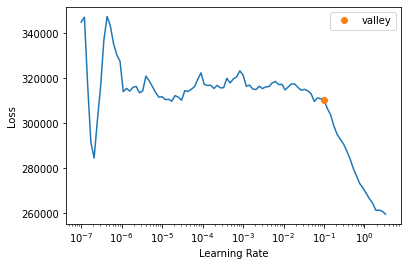

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  448.00     421.13
1 1281.00    1261.74
2  787.00     798.75
3  600.00     563.72
4 1208.00    1105.59
XGBoost RMSE:  59.07816


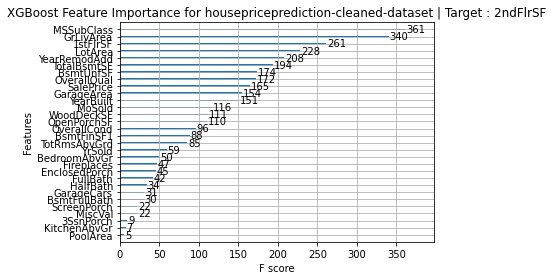

Target Variable: 1stFlrSF
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
30
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorc

  5%|▍         | 2/42 [00:00<00:07,  5.63it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8754551828972059, 'Adjusted R-Squared': 0.8611396866784939, 'RMSE': 138.47909289259698, 'Time taken': 0.2390460968017578}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9078947001400489, 'Adjusted R-Squared': 0.8973078840641925, 'RMSE': 119.08681793330216, 'Time taken': 0.13333821296691895}
{'Model': 'BayesianRidge', 'R-Squared': 0.9871839800784591, 'Adjusted R-Squared': 0.985710874340351, 'RMSE': 44.42198563479047, 'Time taken': 0.044362783432006836}


 10%|▉         | 4/42 [00:00<00:03,  9.63it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.8013387856755885, 'Adjusted R-Squared': 0.7785041633394492, 'RMSE': 174.8952132462131, 'Time taken': 0.07305526733398438}
{'Model': 'DummyRegressor', 'R-Squared': -0.007349151945066357, 'Adjusted R-Squared': -0.12313641078932691, 'RMSE': 393.83237, 'Time taken': 0.041432857513427734}
{'Model': 'ElasticNet', 'R-Squared': 0.8213196762297084, 'Adjusted R-Squared': 0.8007817079802495, 'RMSE': 165.86691, 'Time taken': 0.01686692237854004}


 17%|█▋        | 7/42 [00:00<00:03,  9.64it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8568385670655221, 'Adjusted R-Squared': 0.8403832299466165, 'RMSE': 148.46854, 'Time taken': 0.23817157745361328}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.900297884240209, 'Adjusted R-Squared': 0.8888378709344859, 'RMSE': 123.90064512751215, 'Time taken': 0.04193282127380371}


 21%|██▏       | 9/42 [00:01<00:07,  4.69it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.932413606563168, 'Adjusted R-Squared': 0.9246450555934171, 'RMSE': 102.01194227866536, 'Time taken': 0.7845349311828613}
{'Model': 'GammaRegressor', 'R-Squared': 0.7527212268961941, 'Adjusted R-Squared': 0.724298379412998, 'RMSE': 195.12584601437806, 'Time taken': 0.029581785202026367}


 26%|██▌       | 11/42 [00:01<00:05,  5.27it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -6.571324696938169, 'Adjusted R-Squared': -7.441591903482786, 'RMSE': 1079.7104782832796, 'Time taken': 0.2541348934173584}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7548826509560215, 'Adjusted R-Squared': 0.726708243019932, 'RMSE': 194.27119246984677, 'Time taken': 0.07149028778076172}


 31%|███       | 13/42 [00:02<00:06,  4.51it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9293417933396818, 'Adjusted R-Squared': 0.9212201603902199, 'RMSE': 104.30441358293389, 'Time taken': 0.5027036666870117}


 33%|███▎      | 14/42 [00:03<00:09,  2.81it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9370053567559712, 'Adjusted R-Squared': 0.9297645931647035, 'RMSE': 98.4857033423931, 'Time taken': 0.9364719390869141}


 38%|███▊      | 16/42 [00:04<00:08,  3.05it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9855158854357267, 'Adjusted R-Squared': 0.9838510446812124, 'RMSE': 47.22449865565375, 'Time taken': 0.5358011722564697}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7139654782806544, 'Adjusted R-Squared': 0.6810879470485456, 'RMSE': 209.86044, 'Time taken': 0.09886002540588379}


 40%|████      | 17/42 [00:04<00:06,  3.68it/s]

{'Model': 'KernelRidge', 'R-Squared': -7.675219594064295, 'Adjusted R-Squared': -8.67237127154295, 'RMSE': 1155.7439, 'Time taken': 0.0952141284942627}
{'Model': 'Lars', 'R-Squared': 0.9867373852548224, 'Adjusted R-Squared': 0.9852129467783651, 'RMSE': 45.18933575316129, 'Time taken': 0.07433915138244629}


 45%|████▌     | 19/42 [00:04<00:05,  4.59it/s]

{'Model': 'LarsCV', 'R-Squared': 0.98690481896825, 'Adjusted R-Squared': 0.9853996257462098, 'RMSE': 44.90318365264998, 'Time taken': 0.20348858833312988}
{'Model': 'Lasso', 'R-Squared': 0.9872849418892938, 'Adjusted R-Squared': 0.9858234409570288, 'RMSE': 44.246666, 'Time taken': 0.03557991981506348}


 50%|█████     | 21/42 [00:04<00:04,  5.19it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9872973642566063, 'Adjusted R-Squared': 0.985837291182653, 'RMSE': 44.225048, 'Time taken': 0.2594568729400635}
{'Model': 'LassoLars', 'R-Squared': 0.917574849938727, 'Adjusted R-Squared': 0.9081006947592702, 'RMSE': 112.65520278708969, 'Time taken': 0.07017183303833008}


 62%|██████▏   | 26/42 [00:05<00:01,  8.28it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9873036596664225, 'Adjusted R-Squared': 0.985844310202793, 'RMSE': 44.21408666219481, 'Time taken': 0.20244359970092773}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9840076299561137, 'Adjusted R-Squared': 0.9821694265027934, 'RMSE': 49.62240346828077, 'Time taken': 0.03438401222229004}
{'Model': 'LinearRegression', 'R-Squared': 0.9871847918152934, 'Adjusted R-Squared': 0.9857117793802697, 'RMSE': 44.420578, 'Time taken': 0.05124330520629883}
{'Model': 'LinearSVR', 'R-Squared': 0.60530235525146, 'Adjusted R-Squared': 0.5599348098780645, 'RMSE': 246.52084509521688, 'Time taken': 0.05618739128112793}


 67%|██████▋   | 28/42 [00:08<00:07,  1.92it/s]

{'Model': 'MLPRegressor', 'R-Squared': -1.270148470298845, 'Adjusted R-Squared': -1.5310850760803216, 'RMSE': 591.2191751161606, 'Time taken': 2.8338491916656494}
{'Model': 'NuSVR', 'R-Squared': 0.08847556658454891, 'Adjusted R-Squared': -0.016297356796537432, 'RMSE': 374.6325752051837, 'Time taken': 0.172837495803833}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9869033431120602, 'Adjusted R-Squared': 0.9853979802513775, 'RMSE': 44.90571392597228, 'Time taken': 0.02423262596130371}


 76%|███████▌  | 32/42 [00:08<00:02,  3.43it/s]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9873694738255405, 'Adjusted R-Squared': 0.9859176892077866, 'RMSE': 44.09934124339762, 'Time taken': 0.09311890602111816}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9857609319800865, 'Adjusted R-Squared': 0.984124257495039, 'RMSE': 46.82331554918295, 'Time taken': 0.05999755859375}
{'Model': 'PoissonRegressor', 'R-Squared': 0.8753270851632446, 'Adjusted R-Squared': 0.8609968650670659, 'RMSE': 138.55028934834962, 'Time taken': 0.06341695785522461}
{'Model': 'RANSACRegressor', 'R-Squared': 0.9858307755285868, 'Adjusted R-Squared': 0.9842021290376197, 'RMSE': 46.70834, 'Time taken': 0.032741546630859375}


 88%|████████▊ | 37/42 [00:09<00:01,  3.87it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9148478393762736, 'Adjusted R-Squared': 0.9050602347068797, 'RMSE': 114.50361986262197, 'Time taken': 1.2636034488677979}
{'Model': 'Ridge', 'R-Squared': 0.9871557559133509, 'Adjusted R-Squared': 0.9856794060183338, 'RMSE': 44.470875, 'Time taken': 0.027151107788085938}
{'Model': 'RidgeCV', 'R-Squared': 0.9871843994629748, 'Adjusted R-Squared': 0.9857113419299833, 'RMSE': 44.421258808308664, 'Time taken': 0.030710935592651367}
{'Model': 'SGDRegressor', 'R-Squared': 0.9871671950384813, 'Adjusted R-Squared': 0.9856921599854331, 'RMSE': 44.451065678140566, 'Time taken': 0.05914139747619629}


 93%|█████████▎| 39/42 [00:10<00:00,  4.66it/s]

{'Model': 'SVR', 'R-Squared': 0.07275123995774324, 'Adjusted R-Squared': -0.03382907728849327, 'RMSE': 377.85007351310264, 'Time taken': 0.16773748397827148}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9871847918152934, 'Adjusted R-Squared': 0.9857117793802697, 'RMSE': 44.420578, 'Time taken': 0.020990610122680664}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7548826509560215, 'Adjusted R-Squared': 0.726708243019932, 'RMSE': 194.27119246984677, 'Time taken': 0.035263776779174805}


 98%|█████████▊| 41/42 [00:10<00:00,  5.02it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9305700575922105, 'Adjusted R-Squared': 0.9225896044418898, 'RMSE': 103.39386, 'Time taken': 0.2819075584411621}


100%|██████████| 42/42 [00:10<00:00,  3.97it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9356879580028565, 'Adjusted R-Squared': 0.9282957692675526, 'RMSE': 99.51018417887767, 'Time taken': 0.20612692832946777}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: 1stFlrSF
1stFlrSF
Target Standard Deviation: 384.6625061035156
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
OrthogonalMatchingPursuitCV                  0.99       0.99   44.10   
LassoLarsCV                                  0.99       0.99   44.21   
LassoCV                                      0.99       0.99   44.23   
Lasso                                        0.99       0.99   44.25   
LinearRegression                             0.99       0.99   44.42   
TransformedTargetRegressor                   0.99       0.99   44.42   
RidgeCV                                      0.99       0.99   44.42   
BayesianRidge                     

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1471241.250000,1552179.500000,1245.864990,00:00
1,1410648.125000,1337581.250000,1156.538452,00:00
2,1098466.875000,169184.281250,411.320160,00:00
3,704246.187500,251752.625000,501.749573,00:00


Better model found at epoch 0 with _rmse value: 1245.864990234375.
Better model found at epoch 1 with _rmse value: 1156.5384521484375.
Better model found at epoch 2 with _rmse value: 411.3201599121094.
No improvement since epoch 2: early stopping


,MSSubClass,OverallQual,OverallCond,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,LotArea,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,1stFlrSF,1stFlrSF_pred
0,2.00,5.00,7.00,43.00,2.00,2.00,1.00,3.00,2.00,2.00,3.00,2.00,1.00,1.00,1.00,2.00,5.00,-0.32,-1.01,0.17,-0.66,-0.59,-0.82,-1.35,-1.10,-0.75,-0.70,2.16,-0.27,-0.78,804.00,842.09
1,6.00,7.00,5.00,53.00,1.00,3.00,2.00,4.00,2.00,5.00,2.00,3.00,1.00,1.00,1.00,2.00,1.00,0.31,1.02,-0.95,0.84,-0.25,1.08,0.48,0.01,0.38,0.69,-0.35,-0.27,0.14,936.00,1106.90
2,13.00,7.00,5.00,50.00,2.00,3.00,2.00,4.00,2.00,4.00,1.00,3.00,1.00,1.00,1.00,5.00,5.00,-0.74,0.93,0.38,-1.08,-0.80,0.81,-0.20,0.06,-0.75,-0.06,-0.35,-0.27,-0.33,696.00,903.84
3,1.00,1.00,3.00,1.00,1.00,2.00,1.00,2.00,2.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,-0.52,-0.81,-0.95,-1.29,-2.37,-0.82,-2.24,-2.23,-0.75,-0.70,-0.35,-0.27,-1.78,334.00,898.59
4,11.00,5.00,4.00,18.00,1.00,3.00,1.00,5.00,3.00,6.00,1.00,3.00,1.00,1.00,1.00,6.00,2.00,1.33,-0.12,-0.95,2.42,1.32,-0.82,0.20,0.49,-0.75,-0.70,-0.35,-0.27,-0.48,1632.00,899.57
5,1.00,5.00,6.00,23.00,2.00,2.00,1.00,4.00,2.00,3.00,2.00,2.00,1.00,1.00,1.00,8.00,4.00,0.45,0.04,0.06,-0.37,-0.42,-0.82,-1.24,-0.63,-0.75,-0.70,-0.35,-0.27,-0.60,864.00,817.57
6,13.00,7.00,5.00,55.00,1.00,3.00,2.00,3.00,2.00,2.00,1.00,3.00,1.00,1.00,1.00,3.00,2.00,-0.51,1.09,-0.42,-0.58,-1.12,0.43,-0.79,0.04,-0.75,0.17,-0.35,-0.27,-0.41,551.00,848.07
7,1.00,8.00,6.00,27.00,2.00,3.00,1.00,3.00,2.00,8.00,2.00,3.00,1.00,1.00,1.00,5.00,3.00,0.45,0.17,1.62,-1.29,1.17,-0.82,2.59,0.92,-0.75,0.34,2.49,-0.27,1.33,2898.00,1159.21
8,5.00,4.00,7.00,46.00,1.00,2.00,1.00,4.00,2.00,4.00,1.00,2.00,1.00,1.00,1.00,7.00,4.00,-0.42,-1.17,-0.95,0.72,-0.37,0.50,0.09,-1.10,-0.75,-0.70,0.53,1.87,-0.60,989.00,820.96


<Figure size 432x288 with 0 Axes>

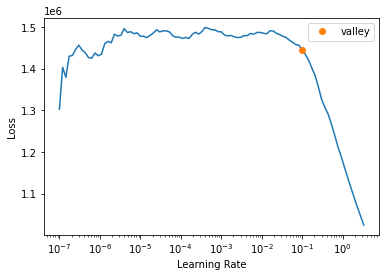

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0 1362.00    1344.87
1 1506.00    1480.05
2 1078.00    1090.86
3 1625.00    1642.01
4  691.00     692.60
XGBoost RMSE:  103.394455


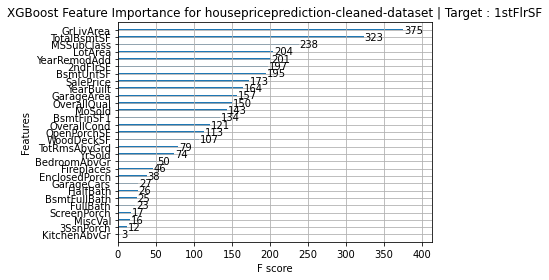

Target Variable: TotalBsmtSF
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
30
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch',

  5%|▍         | 2/42 [00:00<00:07,  5.70it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.812269958015202, 'Adjusted R-Squared': 0.7906917922698229, 'RMSE': 181.36088497638843, 'Time taken': 0.2244124412536621}
{'Model': 'BaggingRegressor', 'R-Squared': 0.8578520829071968, 'Adjusted R-Squared': 0.841513241862047, 'RMSE': 157.81453057828304, 'Time taken': 0.13988089561462402}


 10%|▉         | 4/42 [00:00<00:04,  8.34it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.8798140983674282, 'Adjusted R-Squared': 0.8659996269154084, 'RMSE': 145.11205774936113, 'Time taken': 0.06607484817504883}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.6941620140510367, 'Adjusted R-Squared': 0.6590082225626501, 'RMSE': 231.48478455279096, 'Time taken': 0.10628223419189453}
{'Model': 'DummyRegressor', 'R-Squared': -0.003328923990376209, 'Adjusted R-Squared': -0.11865408766743113, 'RMSE': 419.27444, 'Time taken': 0.011577367782592773}
{'Model': 'ElasticNet', 'R-Squared': 0.8447109277805318, 'Adjusted R-Squared': 0.8268616091346159, 'RMSE': 164.94804, 'Time taken': 0.01765608787536621}


 17%|█▋        | 7/42 [00:00<00:03, 11.34it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8616840049967562, 'Adjusted R-Squared': 0.8457856147664984, 'RMSE': 155.67287, 'Time taken': 0.1627945899963379}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.8340993388459202, 'Adjusted R-Squared': 0.815030297333957, 'RMSE': 170.49074011732552, 'Time taken': 0.03682374954223633}


 21%|██▏       | 9/42 [00:01<00:06,  5.06it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9361699933919592, 'Adjusted R-Squared': 0.9288332110232188, 'RMSE': 105.75214434983832, 'Time taken': 0.7537691593170166}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:01<00:05,  5.99it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -4.89054272370838, 'Adjusted R-Squared': -5.5676165999967, 'RMSE': 1015.9080292875977, 'Time taken': 0.20043730735778809}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7902295897049083, 'Adjusted R-Squared': 0.7661180482916794, 'RMSE': 191.71180294526164, 'Time taken': 0.03637385368347168}


 31%|███       | 13/42 [00:02<00:05,  4.96it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9247222414572059, 'Adjusted R-Squared': 0.9160696255327468, 'RMSE': 114.84446719748475, 'Time taken': 0.5066063404083252}


 33%|███▎      | 14/42 [00:02<00:07,  3.54it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.887887399703116, 'Adjusted R-Squared': 0.875000893921865, 'RMSE': 140.1535008897546, 'Time taken': 0.6287050247192383}


 38%|███▊      | 16/42 [00:03<00:09,  2.88it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.7766026547054445, 'Adjusted R-Squared': 0.7509247989244612, 'RMSE': 197.84074632039128, 'Time taken': 0.9367008209228516}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7563138670793822, 'Adjusted R-Squared': 0.728303966743679, 'RMSE': 206.62941, 'Time taken': 0.09807991981506348}


 45%|████▌     | 19/42 [00:04<00:04,  4.73it/s]

{'Model': 'KernelRidge', 'R-Squared': -5.54164059261744, 'Adjusted R-Squared': -6.293553304412548, 'RMSE': 1070.5823, 'Time taken': 0.13472294807434082}
{'Model': 'Lars', 'R-Squared': 0.7308048991655469, 'Adjusted R-Squared': 0.6998629335523914, 'RMSE': 217.1752417224479, 'Time taken': 0.07986903190612793}
{'Model': 'LarsCV', 'R-Squared': 0.8211563581220263, 'Adjusted R-Squared': 0.8005996176762822, 'RMSE': 177.0163942892621, 'Time taken': 0.10045051574707031}
{'Model': 'Lasso', 'R-Squared': 0.878065769254779, 'Adjusted R-Squared': 0.8640503404334892, 'RMSE': 146.1637, 'Time taken': 0.05698728561401367}


 50%|█████     | 21/42 [00:04<00:04,  5.00it/s]

{'Model': 'LassoCV', 'R-Squared': 0.8764981829661797, 'Adjusted R-Squared': 0.862302571812867, 'RMSE': 147.10025, 'Time taken': 0.2935364246368408}
{'Model': 'LassoLars', 'R-Squared': 0.8648737756670769, 'Adjusted R-Squared': 0.8493420257437524, 'RMSE': 153.86737994322968, 'Time taken': 0.05593252182006836}


 62%|██████▏   | 26/42 [00:04<00:01,  9.07it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8766600142015238, 'Adjusted R-Squared': 0.86248300433963, 'RMSE': 147.00384179173503, 'Time taken': 0.1496131420135498}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8772326145894321, 'Adjusted R-Squared': 0.8631214208640795, 'RMSE': 146.66221544177287, 'Time taken': 0.05456137657165527}
{'Model': 'LinearRegression', 'R-Squared': 0.878783959690871, 'Adjusted R-Squared': 0.8648510814944194, 'RMSE': 145.73262, 'Time taken': 0.021186351776123047}
{'Model': 'LinearSVR', 'R-Squared': 0.6774228675119822, 'Adjusted R-Squared': 0.6403450361915204, 'RMSE': 237.7352199010902, 'Time taken': 0.026076555252075195}


 67%|██████▋   | 28/42 [00:07<00:06,  2.14it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.5630035560691864, 'Adjusted R-Squared': -0.7426591372265643, 'RMSE': 523.3072128365977, 'Time taken': 2.522596597671509}
{'Model': 'NuSVR', 'R-Squared': 0.09948070198387948, 'Adjusted R-Squared': -0.004027263305329765, 'RMSE': 397.21281350261364, 'Time taken': 0.16572308540344238}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8612995479001693, 'Adjusted R-Squared': 0.8453569671990393, 'RMSE': 155.88907354425558, 'Time taken': 0.018526792526245117}


 76%|███████▌  | 32/42 [00:07<00:02,  3.61it/s]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8729491156392826, 'Adjusted R-Squared': 0.8583455657127633, 'RMSE': 149.19888717059328, 'Time taken': 0.043602943420410156}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7930512766821496, 'Adjusted R-Squared': 0.7692640671053852, 'RMSE': 190.41805002840795, 'Time taken': 0.03321266174316406}
{'Model': 'PoissonRegressor', 'R-Squared': 0.8017344187149065, 'Adjusted R-Squared': 0.7789452714407578, 'RMSE': 186.3804695443085, 'Time taken': 0.0872504711151123}
{'Model': 'RANSACRegressor', 'R-Squared': 0.7888230957378365, 'Adjusted R-Squared': 0.7645498883513809, 'RMSE': 192.35344, 'Time taken': 0.11770009994506836}


 86%|████████▌ | 36/42 [00:09<00:01,  3.33it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.862121687665387, 'Adjusted R-Squared': 0.8462736057878453, 'RMSE': 155.4263746537688, 'Time taken': 1.3253514766693115}
{'Model': 'Ridge', 'R-Squared': 0.8792384927492136, 'Adjusted R-Squared': 0.8653578597318818, 'RMSE': 145.45914, 'Time taken': 0.031109333038330078}
{'Model': 'RidgeCV', 'R-Squared': 0.8792382438636916, 'Adjusted R-Squared': 0.8653575822388286, 'RMSE': 145.4592847295102, 'Time taken': 0.07797479629516602}


 90%|█████████ | 38/42 [00:09<00:01,  3.98it/s]

{'Model': 'SGDRegressor', 'R-Squared': 0.8786488360354922, 'Adjusted R-Squared': 0.8647004263843993, 'RMSE': 145.81382778105203, 'Time taken': 0.09583568572998047}
{'Model': 'SVR', 'R-Squared': 0.09738052032973621, 'Adjusted R-Squared': -0.006368845149604452, 'RMSE': 397.6757315337209, 'Time taken': 0.13877224922180176}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.878783959690871, 'Adjusted R-Squared': 0.8648510814944194, 'RMSE': 145.73262, 'Time taken': 0.020508766174316406}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7902295897049083, 'Adjusted R-Squared': 0.7661180482916794, 'RMSE': 191.71180294526164, 'Time taken': 0.07279658317565918}


 98%|█████████▊| 41/42 [00:09<00:00,  4.94it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.8841141539472895, 'Adjusted R-Squared': 0.8707939417573228, 'RMSE': 142.49248, 'Time taken': 0.2570013999938965}


100%|██████████| 42/42 [00:11<00:00,  3.76it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.8987583326416475, 'Adjusted R-Squared': 0.8871213593820667, 'RMSE': 133.1853272577642, 'Time taken': 1.1784031391143799}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: TotalBsmtSF
TotalBsmtSF
Target Standard Deviation: 443.2770690917969
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
ExtraTreesRegressor                          0.93       0.94  105.75   
GradientBoostingRegressor                    0.92       0.92  114.84   
LGBMRegressor                                0.89       0.90  133.19   
HistGradientBoostingRegressor                0.88       0.89  140.15   
XGBRegressor                                 0.87       0.88  142.49   
BayesianRidge                                0.87       0.88  145.11   
Ridge                                        0.87       0.88  145.46   
RidgeCV                      

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1287464.500000,1316983.250000,1147.598999,00:01
1,1238749.500000,1126196.875000,1061.224243,00:00
2,976798.187500,228950.359375,478.487579,00:00
3,652786.000000,615927.250000,784.810303,00:00


Better model found at epoch 0 with _rmse value: 1147.5989990234375.
Better model found at epoch 1 with _rmse value: 1061.2242431640625.
Better model found at epoch 2 with _rmse value: 478.4875793457031.
No improvement since epoch 2: early stopping


,MSSubClass,OverallQual,OverallCond,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,LotArea,YearBuilt,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,TotalBsmtSF,TotalBsmtSF_pred
0,6.00,7.00,5.00,55.00,1.00,3.00,2.00,4.00,1.00,5.00,1.00,3.00,1.00,1.00,1.00,9.00,3.00,-0.22,1.10,0.08,-0.65,-1.00,1.08,0.14,0.24,-0.74,-0.01,-0.36,-0.27,0.07,770.00,709.46
1,6.00,7.00,5.00,53.00,1.00,3.00,2.00,4.00,1.00,6.00,2.00,3.00,1.00,1.00,1.00,2.00,1.00,0.31,1.03,-0.98,0.89,-0.57,1.14,0.51,0.02,0.41,0.74,-0.36,-0.27,0.16,936.00,927.20
2,1.00,8.00,6.00,32.00,1.00,3.00,2.00,3.00,1.00,5.00,2.00,3.00,1.00,1.00,1.00,1.00,1.00,0.55,0.32,-0.98,2.65,1.42,-0.80,0.38,0.20,3.86,0.27,-0.36,-0.27,0.62,1686.00,2333.01
3,2.00,5.00,5.00,1.00,1.00,2.00,1.00,4.00,1.00,5.00,2.00,3.00,1.00,1.00,1.00,5.00,2.00,-0.18,-1.72,0.41,-0.67,0.03,-0.80,-0.65,0.12,-0.74,-0.68,3.16,1.92,-0.47,915.00,994.42
4,1.00,3.00,8.00,56.00,2.00,2.00,1.00,4.00,1.00,5.00,1.00,2.00,1.00,1.00,1.00,7.00,1.00,-0.45,-0.55,-0.43,0.82,0.02,-0.80,-0.66,-1.17,0.40,0.77,-0.36,-0.27,-0.70,1162.00,924.13
5,6.00,7.00,5.00,60.00,2.00,3.00,2.00,4.00,1.00,6.00,2.00,3.00,1.00,1.00,1.00,7.00,4.00,-0.19,1.26,0.80,-1.12,-0.58,1.33,0.66,0.82,0.60,0.92,-0.36,-0.27,0.94,900.00,776.92
6,12.00,8.00,5.00,35.00,2.00,2.00,1.00,2.00,1.00,3.00,2.00,3.00,1.00,1.00,1.00,8.00,4.00,-0.45,0.42,1.26,-0.87,0.53,-0.80,-0.28,0.45,-0.24,-0.68,-0.36,-0.27,0.09,1220.00,878.32
7,1.00,4.00,4.00,22.00,1.00,2.00,1.00,4.00,1.00,4.00,1.00,1.00,1.00,1.00,1.00,6.00,1.00,-0.23,-0.01,0.35,-0.73,-0.77,-0.80,-1.24,-2.20,-0.74,-0.68,-0.36,-0.27,-1.19,858.00,730.21
8,5.00,5.00,7.00,1.00,2.00,2.00,2.00,3.00,1.00,6.00,3.00,2.00,1.00,1.00,1.00,6.00,4.00,-0.10,-1.05,-0.06,-0.60,-0.47,-0.03,-0.38,-1.00,-0.74,0.36,-0.36,-0.27,-0.26,728.00,710.10


<Figure size 432x288 with 0 Axes>

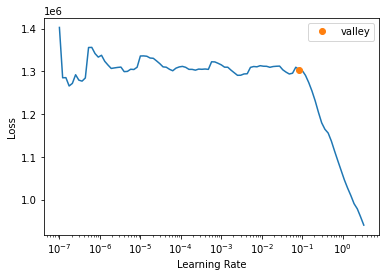

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  965.00     831.12
1 1215.00    1163.83
2  602.00     531.89
3 1566.00    1516.00
4 1276.00    1251.77
XGBoost RMSE:  142.46727


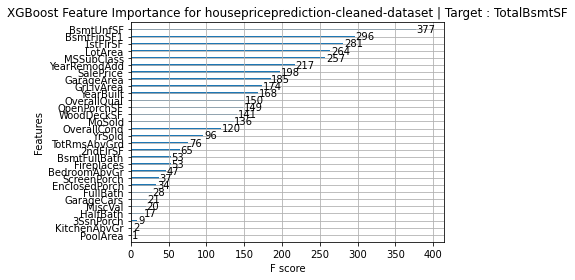

Target Variable: BsmtUnfSF
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
30
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch

  5%|▍         | 2/42 [00:00<00:07,  5.65it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.740216848166007, 'Adjusted R-Squared': 0.7103567157712951, 'RMSE': 227.14492317755546, 'Time taken': 0.24165034294128418}
{'Model': 'BaggingRegressor', 'R-Squared': 0.8898207461449557, 'Adjusted R-Squared': 0.8771564640926517, 'RMSE': 147.92700254582252, 'Time taken': 0.13030076026916504}
{'Model': 'BayesianRidge', 'R-Squared': 0.8684816198622776, 'Adjusted R-Squared': 0.8533645646740335, 'RMSE': 161.6183874667905, 'Time taken': 0.03885936737060547}


 10%|▉         | 4/42 [00:00<00:04,  8.91it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.7916359518746829, 'Adjusted R-Squared': 0.767686061285566, 'RMSE': 203.42716040155773, 'Time taken': 0.10707592964172363}
{'Model': 'DummyRegressor', 'R-Squared': -2.363735818855517e-06, 'Adjusted R-Squared': -0.11494516416522349, 'RMSE': 445.65427, 'Time taken': 0.011569738388061523}
{'Model': 'ElasticNet', 'R-Squared': 0.692369694898844, 'Adjusted R-Squared': 0.6570098897148031, 'RMSE': 247.17929, 'Time taken': 0.027642250061035156}


 17%|█▋        | 7/42 [00:00<00:03, 10.21it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.788501849859099, 'Adjusted R-Squared': 0.7641917176589954, 'RMSE': 204.95139, 'Time taken': 0.22103428840637207}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.702261686107992, 'Adjusted R-Squared': 0.6680388914077612, 'RMSE': 243.1727499153017, 'Time taken': 0.03640437126159668}


 21%|██▏       | 9/42 [00:01<00:06,  4.98it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9033582008748341, 'Adjusted R-Squared': 0.8922499481018265, 'RMSE': 138.541551499111, 'Time taken': 0.737191915512085}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:01<00:05,  5.92it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.7844668110002242, 'Adjusted R-Squared': -0.9895779387013994, 'RMSE': 595.3217931643096, 'Time taken': 0.19942784309387207}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.579643828621219, 'Adjusted R-Squared': 0.531327027313313, 'RMSE': 288.93906136852706, 'Time taken': 0.07107114791870117}


 31%|███       | 13/42 [00:02<00:06,  4.81it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8987681639570736, 'Adjusted R-Squared': 0.8871323207337487, 'RMSE': 141.79342748946664, 'Time taken': 0.5035886764526367}


 33%|███▎      | 14/42 [00:03<00:08,  3.33it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.8937562937963135, 'Adjusted R-Squared': 0.8815443735430162, 'RMSE': 145.26104021708815, 'Time taken': 0.6963231563568115}


 38%|███▊      | 16/42 [00:03<00:08,  3.17it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.8324685702558087, 'Adjusted R-Squared': 0.8132120840783155, 'RMSE': 182.40876004074164, 'Time taken': 0.6663134098052979}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.6511172327804421, 'Adjusted R-Squared': 0.6110157652839412, 'RMSE': 263.23114, 'Time taken': 0.09791254997253418}
{'Model': 'KernelRidge', 'R-Squared': -0.6851899318751205, 'Adjusted R-Squared': -0.8788899240446746, 'RMSE': 578.5248, 'Time taken': 0.07314729690551758}


 45%|████▌     | 19/42 [00:04<00:04,  5.12it/s]

{'Model': 'Lars', 'R-Squared': 0.8594911214881836, 'Adjusted R-Squared': 0.8433406756822277, 'RMSE': 167.05113373479645, 'Time taken': 0.07466268539428711}
{'Model': 'LarsCV', 'R-Squared': 0.8686577827938753, 'Adjusted R-Squared': 0.8535609762184586, 'RMSE': 161.51011093062027, 'Time taken': 0.10050487518310547}
{'Model': 'Lasso', 'R-Squared': 0.8687406491538427, 'Adjusted R-Squared': 0.8536533674473878, 'RMSE': 161.45915, 'Time taken': 0.043946027755737305}


 50%|█████     | 21/42 [00:04<00:03,  5.54it/s]

{'Model': 'LassoCV', 'R-Squared': 0.8691226838438982, 'Adjusted R-Squared': 0.8540793141707831, 'RMSE': 161.22403, 'Time taken': 0.26450395584106445}
{'Model': 'LassoLars', 'R-Squared': 0.8426317819082478, 'Adjusted R-Squared': 0.8245434809781613, 'RMSE': 176.78933302467146, 'Time taken': 0.05841255187988281}


 60%|█████▉    | 25/42 [00:04<00:02,  7.73it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.869145681574898, 'Adjusted R-Squared': 0.8541049553191391, 'RMSE': 161.20984988518623, 'Time taken': 0.18007683753967285}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8639044324982446, 'Adjusted R-Squared': 0.8482612638198819, 'RMSE': 164.4067083191196, 'Time taken': 0.08883404731750488}
{'Model': 'LinearRegression', 'R-Squared': 0.8683233898420765, 'Adjusted R-Squared': 0.8531881472951887, 'RMSE': 161.71558, 'Time taken': 0.05145120620727539}
{'Model': 'LinearSVR', 'R-Squared': 0.7250889091187048, 'Adjusted R-Squared': 0.6934899331553375, 'RMSE': 233.66500470653696, 'Time taken': 0.040266990661621094}


 67%|██████▋   | 28/42 [00:07<00:06,  2.19it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.5113928494975941, 'Adjusted R-Squared': 0.4552311080605359, 'RMSE': 311.5139164273412, 'Time taken': 2.6202170848846436}
{'Model': 'NuSVR', 'R-Squared': 0.04115686581038547, 'Adjusted R-Squared': -0.06905498869416804, 'RMSE': 436.3865183804571, 'Time taken': 0.17354774475097656}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8645804994750147, 'Adjusted R-Squared': 0.8490150396445566, 'RMSE': 163.9978473655264, 'Time taken': 0.021414756774902344}


 74%|███████▍  | 31/42 [00:07<00:02,  3.72it/s]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8644884634472221, 'Adjusted R-Squared': 0.8489124247629947, 'RMSE': 164.0535673567085, 'Time taken': 0.04868769645690918}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8355333672397615, 'Adjusted R-Squared': 0.8166291565776651, 'RMSE': 180.73257828525595, 'Time taken': 0.033525943756103516}
{'Model': 'PoissonRegressor', 'R-Squared': 0.8103841443528569, 'Adjusted R-Squared': 0.7885892184164036, 'RMSE': 194.05948245107166, 'Time taken': 0.07567477226257324}


 79%|███████▊  | 33/42 [00:07<00:01,  4.53it/s]

{'Model': 'RANSACRegressor', 'R-Squared': 0.8351104293144163, 'Adjusted R-Squared': 0.8161576050976824, 'RMSE': 180.96483, 'Time taken': 0.13001465797424316}


 88%|████████▊ | 37/42 [00:09<00:01,  3.82it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.8959940064004491, 'Adjusted R-Squared': 0.8840392944924548, 'RMSE': 143.7231500809041, 'Time taken': 1.2335352897644043}
{'Model': 'Ridge', 'R-Squared': 0.8684207939136274, 'Adjusted R-Squared': 0.8532967472370327, 'RMSE': 161.65576, 'Time taken': 0.021661043167114258}
{'Model': 'RidgeCV', 'R-Squared': 0.8684207700396434, 'Adjusted R-Squared': 0.8532967206189127, 'RMSE': 161.65577126415135, 'Time taken': 0.055658578872680664}
{'Model': 'SGDRegressor', 'R-Squared': 0.8685656589374473, 'Adjusted R-Squared': 0.8534582634130159, 'RMSE': 161.56674285929066, 'Time taken': 0.07825064659118652}


 93%|█████████▎| 39/42 [00:09<00:00,  4.73it/s]

{'Model': 'SVR', 'R-Squared': 0.028671733907594255, 'Adjusted R-Squared': -0.082975193229464, 'RMSE': 439.218432077843, 'Time taken': 0.15853261947631836}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8683233898420765, 'Adjusted R-Squared': 0.8531881472951887, 'RMSE': 161.71558, 'Time taken': 0.024729251861572266}
{'Model': 'TweedieRegressor', 'R-Squared': 0.579643828621219, 'Adjusted R-Squared': 0.531327027313313, 'RMSE': 288.93906136852706, 'Time taken': 0.06194138526916504}


 98%|█████████▊| 41/42 [00:09<00:00,  5.02it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.8809303592466609, 'Adjusted R-Squared': 0.8672441936428288, 'RMSE': 153.77936, 'Time taken': 0.2756195068359375}


100%|██████████| 42/42 [00:10<00:00,  4.16it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.8991167293492559, 'Adjusted R-Squared': 0.8875209511135382, 'RMSE': 141.549102670806, 'Time taken': 0.20147466659545898}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: BsmtUnfSF
BsmtUnfSF
Target Standard Deviation: 440.7254943847656
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreesRegressor                          0.89       0.90 138.54   
LGBMRegressor                                0.89       0.90 141.55   
GradientBoostingRegressor                    0.89       0.90 141.79   
RandomForestRegressor                        0.88       0.90 143.72   
HistGradientBoostingRegressor                0.88       0.89 145.26   
BaggingRegressor                             0.88       0.89 147.93   
XGBRegressor                                 0.87       0.88 153.78   
LassoLarsCV                               

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,507014.093750,512292.593750,715.746155,00:00
1,474464.812500,421016.562500,648.857910,00:00
2,370656.843750,427999.500000,654.216736,00:00


Better model found at epoch 0 with _rmse value: 715.7461547851562.
Better model found at epoch 1 with _rmse value: 648.85791015625.
No improvement since epoch 1: early stopping


,MSSubClass,OverallQual,OverallCond,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,LotArea,YearBuilt,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,BsmtUnfSF,BsmtUnfSF_pred
0,6.00,6.00,5.00,51.00,2.00,3.00,2.00,4.00,2.00,6.00,2.00,3.00,1.00,1.00,1.00,7.00,4.00,0.16,0.96,0.53,-0.16,-0.37,1.54,1.00,-0.39,-0.56,0.01,-0.35,-0.27,0.81,297.00,78.01
1,10.00,4.00,5.00,23.00,2.00,3.00,1.00,4.00,2.00,5.00,1.00,3.00,1.00,1.00,1.00,4.00,3.00,-0.06,0.04,1.02,0.18,0.04,-0.81,-0.65,0.52,-0.75,-0.70,2.59,-0.27,-0.56,38.00,81.50
2,12.00,6.00,5.00,45.00,2.00,3.00,1.00,3.00,2.00,4.00,2.00,3.00,1.00,1.00,1.00,7.00,3.00,-0.26,0.73,-0.61,1.23,1.17,-0.81,0.17,0.27,-0.75,0.32,-0.35,-0.27,0.15,598.00,115.01
3,1.00,7.00,5.00,52.00,1.00,3.00,1.00,4.00,2.00,5.00,2.00,3.00,1.00,1.00,1.00,10.00,4.00,-0.08,0.96,-0.97,1.29,1.20,-0.81,0.20,-0.11,-0.17,2.73,-0.35,-0.27,0.41,1630.00,137.54
4,12.00,9.00,5.00,51.00,2.00,3.00,1.00,3.00,2.00,4.00,2.00,3.00,1.00,1.00,1.00,1.00,3.00,-0.55,0.92,1.71,1.45,1.40,-0.81,0.34,0.14,0.02,0.26,-0.35,-0.27,1.89,460.00,119.22
5,1.00,5.00,5.00,7.00,2.00,2.00,1.00,4.00,2.00,5.00,1.00,2.00,1.00,1.00,1.00,6.00,2.00,-0.04,-0.49,0.30,-0.03,-0.30,-0.81,-0.90,-0.87,-0.75,-0.40,-0.35,3.09,-0.59,462.00,84.80
6,1.00,8.00,6.00,21.00,2.00,3.00,1.00,5.00,2.00,7.00,2.00,3.00,1.00,1.00,1.00,10.00,2.00,0.53,-0.03,-0.21,2.62,2.72,-0.81,1.30,0.67,-0.11,2.34,-0.35,3.65,1.11,1043.00,251.80
7,1.00,5.00,7.00,57.00,2.00,2.00,1.00,3.00,2.00,5.00,1.00,2.00,1.00,1.00,1.00,5.00,2.00,-0.17,-0.59,0.42,-0.12,-0.40,-0.81,-0.98,-1.08,-0.75,-0.43,-0.35,-0.27,-0.60,365.00,78.86
8,6.00,8.00,5.00,54.00,2.00,4.00,2.00,5.00,2.00,11.00,2.00,4.00,1.00,1.00,1.00,6.00,5.00,4.30,1.05,2.09,1.34,1.36,2.81,3.31,1.68,3.20,-0.17,-0.35,3.40,4.56,234.00,145.63


<Figure size 432x288 with 0 Axes>

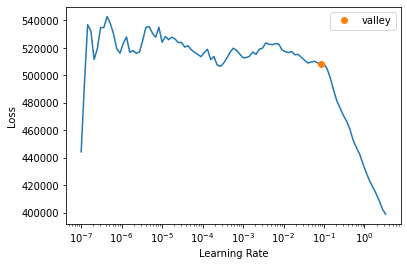

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0 1228.00    1256.23
1  396.00     358.92
2  600.00     610.96
3  896.00     899.61
4  416.00     474.25
XGBoost RMSE:  153.5357


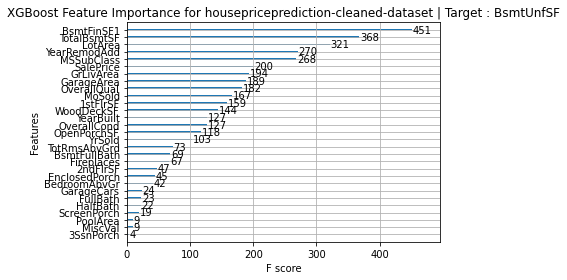

Target Variable: BsmtFinSF1
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
30
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch'

  5%|▍         | 2/42 [00:00<00:06,  5.76it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.617527840187833, 'Adjusted R-Squared': 0.5735655229680436, 'RMSE': 328.0349193365015, 'Time taken': 0.23643016815185547}
{'Model': 'BaggingRegressor', 'R-Squared': 0.7021047829868913, 'Adjusted R-Squared': 0.6678639534451546, 'RMSE': 289.50223962272787, 'Time taken': 0.1281578540802002}
{'Model': 'BayesianRidge', 'R-Squared': 0.8827713035457849, 'Adjusted R-Squared': 0.8692967407349557, 'RMSE': 181.60890111834007, 'Time taken': 0.026352882385253906}


 12%|█▏        | 5/42 [00:00<00:02, 12.59it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.5990323421359531, 'Adjusted R-Squared': 0.5529441055998557, 'RMSE': 335.87279983832104, 'Time taken': 0.05745673179626465}
{'Model': 'DummyRegressor', 'R-Squared': -0.0017122672972762487, 'Adjusted R-Squared': -0.11685160836592878, 'RMSE': 530.8742, 'Time taken': 0.04092884063720703}
{'Model': 'ElasticNet', 'R-Squared': 0.6915736934324748, 'Adjusted R-Squared': 0.6561223938270121, 'RMSE': 294.57498, 'Time taken': 0.023137569427490234}


 17%|█▋        | 7/42 [00:00<00:03, 11.41it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7510452908209542, 'Adjusted R-Squared': 0.7224298070072708, 'RMSE': 264.65515, 'Time taken': 0.17023897171020508}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.6352028497697284, 'Adjusted R-Squared': 0.5932721428467087, 'RMSE': 320.36560343303665, 'Time taken': 0.03551816940307617}


 21%|██▏       | 9/42 [00:01<00:06,  5.42it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.7043910269586827, 'Adjusted R-Squared': 0.6704129840803703, 'RMSE': 288.3891845606824, 'Time taken': 0.6618268489837646}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:01<00:04,  6.36it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.476447960633392, 'Adjusted R-Squared': -0.6461546227751613, 'RMSE': 644.5093688829712, 'Time taken': 0.20000767707824707}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.597885388831658, 'Adjusted R-Squared': 0.5516653185824232, 'RMSE': 336.3528327274764, 'Time taken': 0.03823280334472656}


 31%|███       | 13/42 [00:02<00:05,  5.07it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.7197209670726037, 'Adjusted R-Squared': 0.6875049862763511, 'RMSE': 280.8118740501229, 'Time taken': 0.5128307342529297}


 33%|███▎      | 14/42 [00:02<00:07,  3.61it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.70633762564292, 'Adjusted R-Squared': 0.6725833297398074, 'RMSE': 287.4380881986921, 'Time taken': 0.6133618354797363}


 38%|███▊      | 16/42 [00:03<00:07,  3.46it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.878203326685127, 'Adjusted R-Squared': 0.8642037090627278, 'RMSE': 185.1134077842571, 'Time taken': 0.5714728832244873}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5135645612368003, 'Adjusted R-Squared': 0.4576524418387313, 'RMSE': 369.94125, 'Time taken': 0.11787176132202148}
{'Model': 'KernelRidge', 'R-Squared': 0.18722623272866212, 'Adjusted R-Squared': 0.09380396062850826, 'RMSE': 478.19495, 'Time taken': 0.07600164413452148}


 43%|████▎     | 18/42 [00:03<00:04,  4.91it/s]

{'Model': 'Lars', 'R-Squared': 0.882355163146012, 'Adjusted R-Squared': 0.8688327681053237, 'RMSE': 181.93095473064167, 'Time taken': 0.06954264640808105}


 45%|████▌     | 19/42 [00:03<00:04,  4.94it/s]

{'Model': 'LarsCV', 'R-Squared': 0.8848457820021359, 'Adjusted R-Squared': 0.8716096649908872, 'RMSE': 179.99485357518492, 'Time taken': 0.18342947959899902}
{'Model': 'Lasso', 'R-Squared': 0.8842967806513887, 'Adjusted R-Squared': 0.8709975600366058, 'RMSE': 180.4234, 'Time taken': 0.05527019500732422}


 50%|█████     | 21/42 [00:04<00:04,  5.06it/s]

{'Model': 'LassoCV', 'R-Squared': 0.8846532393776438, 'Adjusted R-Squared': 0.8713949910302465, 'RMSE': 180.14528, 'Time taken': 0.31649112701416016}
{'Model': 'LassoLars', 'R-Squared': 0.855099383450024, 'Adjusted R-Squared': 0.8384441401684175, 'RMSE': 201.90881475160452, 'Time taken': 0.07341647148132324}


 60%|█████▉    | 25/42 [00:04<00:02,  7.78it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8847183115405098, 'Adjusted R-Squared': 0.8714675427520626, 'RMSE': 180.09444906325572, 'Time taken': 0.12965106964111328}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8809262574854677, 'Adjusted R-Squared': 0.8672396204148318, 'RMSE': 183.0324801578771, 'Time taken': 0.04303383827209473}
{'Model': 'LinearRegression', 'R-Squared': 0.8835831654415676, 'Adjusted R-Squared': 0.8702019200900236, 'RMSE': 180.97896, 'Time taken': 0.0693979263305664}
{'Model': 'LinearSVR', 'R-Squared': 0.7680842498025182, 'Adjusted R-Squared': 0.7414272670211984, 'RMSE': 255.43787035516533, 'Time taken': 0.061868906021118164}


 67%|██████▋   | 28/42 [00:07<00:06,  2.26it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.6294352265077519, 'Adjusted R-Squared': 0.5868415743822061, 'RMSE': 322.88824077290184, 'Time taken': 2.4949634075164795}
{'Model': 'NuSVR', 'R-Squared': -0.00034164490121812996, 'Adjusted R-Squared': -0.11532344316572596, 'RMSE': 530.5109315515166, 'Time taken': 0.17332863807678223}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8920847843516033, 'Adjusted R-Squared': 0.8796807365759255, 'RMSE': 174.24547318760918, 'Time taken': 0.01845550537109375}


 76%|███████▌  | 32/42 [00:07<00:02,  4.24it/s]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8903627633594496, 'Adjusted R-Squared': 0.8777607821363979, 'RMSE': 175.6302029160184, 'Time taken': 0.04320931434631348}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8809499106921282, 'Adjusted R-Squared': 0.8672659923808786, 'RMSE': 183.01430016283535, 'Time taken': 0.030957937240600586}
{'Model': 'PoissonRegressor', 'R-Squared': -26299.105657151005, 'Adjusted R-Squared': -29322.106307398248, 'RMSE': 86019.89523855908, 'Time taken': 0.0781564712524414}
{'Model': 'RANSACRegressor', 'R-Squared': 0.8829521465388033, 'Adjusted R-Squared': 0.8694983702788956, 'RMSE': 181.46877, 'Time taken': 0.09184956550598145}


 88%|████████▊ | 37/42 [00:08<00:01,  4.35it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.7031363683285472, 'Adjusted R-Squared': 0.6690141118145871, 'RMSE': 289.0005443203624, 'Time taken': 1.172018051147461}
{'Model': 'Ridge', 'R-Squared': 0.883244037802925, 'Adjusted R-Squared': 0.8698238122630313, 'RMSE': 181.24236, 'Time taken': 0.030117034912109375}
{'Model': 'RidgeCV', 'R-Squared': 0.8832440384152014, 'Adjusted R-Squared': 0.8698238129456843, 'RMSE': 181.24235440246133, 'Time taken': 0.029728412628173828}
{'Model': 'SGDRegressor', 'R-Squared': 0.8829114286501489, 'Adjusted R-Squared': 0.8694529721731545, 'RMSE': 181.5003288313548, 'Time taken': 0.04012799263000488}


 93%|█████████▎| 39/42 [00:09<00:00,  5.05it/s]

{'Model': 'SVR', 'R-Squared': 0.025679185594118192, 'Adjusted R-Squared': -0.0863117126134545, 'RMSE': 523.5656587215816, 'Time taken': 0.18893218040466309}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8835831654415676, 'Adjusted R-Squared': 0.8702019200900236, 'RMSE': 180.97896, 'Time taken': 0.01993274688720703}
{'Model': 'TweedieRegressor', 'R-Squared': 0.597885388831658, 'Adjusted R-Squared': 0.5516653185824232, 'RMSE': 336.3528327274764, 'Time taken': 0.03931307792663574}


 98%|█████████▊| 41/42 [00:09<00:00,  5.31it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.7115893345413473, 'Adjusted R-Squared': 0.6784386833392033, 'RMSE': 284.8563, 'Time taken': 0.28342127799987793}


100%|██████████| 42/42 [00:09<00:00,  4.36it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.7113526030746867, 'Adjusted R-Squared': 0.6781747413591335, 'RMSE': 284.97317780812625, 'Time taken': 0.2720797061920166}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: BsmtFinSF1
BsmtFinSF1
Target Standard Deviation: 435.22515869140625
                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
OrthogonalMatchingPursuit                    0.88       0.89   174.25   
OrthogonalMatchingPursuitCV                  0.88       0.89   175.63   
LarsCV                                       0.87       0.88   179.99   
LassoLarsCV                                  0.87       0.88   180.09   
LassoCV                                      0.87       0.88   180.15   
Lasso                                        0.87       0.88   180.42   
LinearRegression                             0.87       0.88   180.98   
TransformedTargetReg

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,375719.937500,486535.781250,697.521179,00:00
1,354643.875000,397851.937500,630.755127,00:00
2,277143.718750,457854.093750,676.649170,00:00


Better model found at epoch 0 with _rmse value: 697.5211791992188.
Better model found at epoch 1 with _rmse value: 630.755126953125.
No improvement since epoch 1: early stopping


,MSSubClass,OverallQual,OverallCond,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,LotArea,YearBuilt,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,BsmtFinSF1,BsmtFinSF1_pred
0,1.00,5.00,6.00,8.00,2.00,2.00,1.00,3.00,2.00,4.00,1.00,2.00,1.00,1.00,1.00,7.00,1.00,-0.34,-0.49,-1.03,-0.56,-0.90,-0.80,-1.35,-0.77,-0.74,-0.71,-0.36,-0.26,-0.64,708.00,80.48
1,1.00,5.00,6.00,1.00,1.00,2.00,1.00,4.00,2.00,5.00,1.00,2.00,1.00,1.00,1.00,5.00,2.00,-0.33,-0.72,-0.72,-0.41,-0.44,-0.80,-1.01,-0.92,-0.74,0.54,-0.36,-0.26,-0.78,534.00,83.89
2,1.00,5.00,4.00,36.00,2.00,2.00,1.00,4.00,2.00,4.00,1.00,2.00,1.00,1.00,1.00,10.00,3.00,-0.36,0.41,-0.78,-0.41,-0.61,-0.80,-1.14,-0.97,2.12,-0.71,-0.36,-0.26,-0.77,658.00,77.97
3,12.00,6.00,4.00,45.00,2.00,3.00,1.00,3.00,2.00,4.00,2.00,3.00,1.00,1.00,1.00,7.00,3.00,-0.25,0.72,0.08,1.33,1.23,-0.80,0.20,0.29,-0.74,0.37,-0.36,-0.26,0.15,165.00,93.23
4,6.00,10.00,4.00,59.00,3.00,3.00,2.00,4.00,2.00,11.00,4.00,3.00,1.00,0.00,1.00,1.00,3.00,5.45,1.22,-0.22,12.09,9.38,1.37,8.00,4.42,0.95,3.83,-0.36,-0.26,-0.26,5644.00,420.80
5,5.00,5.00,6.00,43.00,1.00,3.00,1.00,4.00,2.00,7.00,2.00,3.00,1.00,1.00,1.00,6.00,3.00,-0.43,-1.39,1.17,0.07,-0.07,0.21,0.12,-0.52,-0.74,-0.71,-0.36,-0.26,-0.23,0.00,80.98
6,6.00,7.00,4.00,38.00,2.00,3.00,2.00,5.00,2.00,7.00,2.00,3.00,1.00,1.00,1.00,8.00,2.00,-0.01,0.48,-1.28,1.08,1.06,1.89,2.36,0.49,0.85,0.79,-0.36,-0.26,1.49,28.00,100.44
7,6.00,7.00,4.00,52.00,1.00,3.00,2.00,4.00,2.00,7.00,2.00,3.00,1.00,1.00,1.00,5.00,5.00,-0.09,0.98,0.73,-0.39,-0.72,1.83,1.01,-0.18,0.39,0.04,-0.36,-0.26,0.51,0.00,89.64
8,5.00,5.00,7.00,47.00,1.00,2.00,1.00,3.00,2.00,5.00,1.00,1.00,1.00,1.00,1.00,5.00,5.00,-0.42,-3.24,0.49,-0.64,-0.99,-0.25,-0.95,-2.21,-0.74,-0.71,2.47,-0.26,-1.09,0.00,76.11


<Figure size 432x288 with 0 Axes>

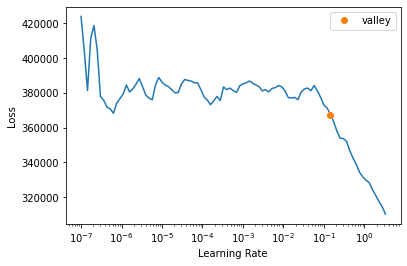

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0  338.00     321.99
1    0.00      -5.52
2  965.00     922.15
3    0.00      17.16
4 1387.00    1365.07
XGBoost RMSE:  284.92123


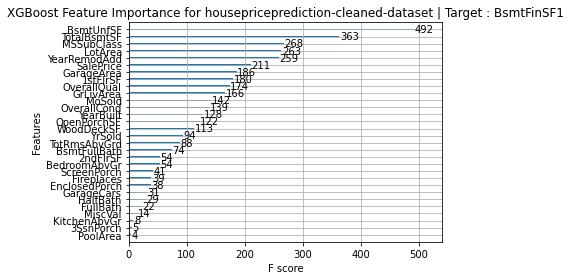

Target Variable: YearRemodAdd
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
31
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplac

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.6356916226448048, 'Adjusted R-Squared': 0.5938170965120237, 'RMSE': 12.1881961127007, 'Time taken': 0.05705857276916504}


  5%|▍         | 2/42 [00:00<00:03, 11.31it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.6252188102643446, 'Adjusted R-Squared': 0.5821405125935795, 'RMSE': 12.362142552694928, 'Time taken': 0.11948156356811523}
{'Model': 'BayesianRidge', 'R-Squared': 0.5452870965519415, 'Adjusted R-Squared': 0.4930212455809003, 'RMSE': 13.61675093261309, 'Time taken': 0.05465126037597656}


 10%|▉         | 4/42 [00:00<00:03, 12.13it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.3318569419807881, 'Adjusted R-Squared': 0.2550588893349016, 'RMSE': 16.505914257606335, 'Time taken': 0.10013437271118164}
{'Model': 'DummyRegressor', 'R-Squared': -0.0022711050753607687, 'Adjusted R-Squared': -0.11747468037137931, 'RMSE': 20.21610383550349, 'Time taken': 0.011736392974853516}
{'Model': 'ElasticNet', 'R-Squared': 0.4842655824429485, 'Adjusted R-Squared': 0.42498576433294255, 'RMSE': 14.501667, 'Time taken': 0.017075538635253906}


 17%|█▋        | 7/42 [00:00<00:02, 12.59it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.541935254067395, 'Adjusted R-Squared': 0.4892841338452564, 'RMSE': 13.666845, 'Time taken': 0.19847512245178223}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.3561037304326756, 'Adjusted R-Squared': 0.28209266496516705, 'RMSE': 16.203648329252342, 'Time taken': 0.0364069938659668}


 21%|██▏       | 9/42 [00:01<00:05,  5.81it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.6627810245246328, 'Adjusted R-Squared': 0.6240202227458549, 'RMSE': 11.72629611377545, 'Time taken': 0.6515622138977051}
{'Model': 'GammaRegressor', 'R-Squared': 0.4353678836710224, 'Adjusted R-Squared': 0.37046764041481806, 'RMSE': 15.173565479434053, 'Time taken': 0.029078006744384766}


 26%|██▌       | 11/42 [00:01<00:05,  6.12it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.6949251484201207, 'Adjusted R-Squared': -2.0046866597327786, 'RMSE': 33.149593570358384, 'Time taken': 0.26131558418273926}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.4537192516556431, 'Adjusted R-Squared': 0.3909283610413491, 'RMSE': 14.924947164837272, 'Time taken': 0.033080339431762695}


 31%|███       | 13/42 [00:02<00:05,  4.96it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.6849826489540484, 'Adjusted R-Squared': 0.6487737580292263, 'RMSE': 11.333709900090936, 'Time taken': 0.5241103172302246}


 33%|███▎      | 14/42 [00:02<00:07,  3.60it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6650607792754654, 'Adjusted R-Squared': 0.6265620182726452, 'RMSE': 11.686591327624873, 'Time taken': 0.6084210872650146}


 40%|████      | 17/42 [00:03<00:05,  4.88it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.5289025701704156, 'Adjusted R-Squared': 0.47475344030494615, 'RMSE': 13.859903993801153, 'Time taken': 0.2978549003601074}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.45535951690272136, 'Adjusted R-Squared': 0.3927571625237237, 'RMSE': 14.902523460120841, 'Time taken': 0.08600425720214844}
{'Model': 'KernelRidge', 'R-Squared': -2.3963213910703787, 'Adjusted R-Squared': -2.786703160158928, 'RMSE': 37.21425, 'Time taken': 0.05803537368774414}


 45%|████▌     | 19/42 [00:03<00:03,  5.91it/s]

{'Model': 'Lars', 'R-Squared': 0.4696758536825044, 'Adjusted R-Squared': 0.408719055255206, 'RMSE': 14.705356425328203, 'Time taken': 0.06393241882324219}
{'Model': 'LarsCV', 'R-Squared': 0.5400764935432107, 'Adjusted R-Squared': 0.48721172268610846, 'RMSE': 13.694546591180092, 'Time taken': 0.13721990585327148}
{'Model': 'Lasso', 'R-Squared': 0.521510845202585, 'Adjusted R-Squared': 0.4665120917775947, 'RMSE': 13.968214, 'Time taken': 0.06610870361328125}


 50%|█████     | 21/42 [00:03<00:03,  5.25it/s]

{'Model': 'LassoCV', 'R-Squared': 0.5423487236227282, 'Adjusted R-Squared': 0.48974512863683484, 'RMSE': 13.660676, 'Time taken': 0.3950173854827881}
{'Model': 'LassoLars', 'R-Squared': -0.002271108528461019, 'Adjusted R-Squared': -0.11747468422138763, 'RMSE': 20.216103870328514, 'Time taken': 0.07399201393127441}


 60%|█████▉    | 25/42 [00:04<00:02,  6.63it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.5400764935432107, 'Adjusted R-Squared': 0.48721172268610846, 'RMSE': 13.694546591180092, 'Time taken': 0.2468249797821045}
{'Model': 'LassoLarsIC', 'R-Squared': 0.5426627330173089, 'Adjusted R-Squared': 0.4900952310652754, 'RMSE': 13.655988758560984, 'Time taken': 0.08474254608154297}
{'Model': 'LinearRegression', 'R-Squared': 0.5376992576070145, 'Adjusted R-Squared': 0.48456124124000466, 'RMSE': 13.729893, 'Time taken': 0.07000255584716797}
{'Model': 'LinearSVR', 'R-Squared': 0.5124127628404991, 'Adjusted R-Squared': 0.45636825282216564, 'RMSE': 14.100386566915825, 'Time taken': 0.06002926826477051}


 67%|██████▋   | 28/42 [00:07<00:06,  2.06it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.5960666707533541, 'Adjusted R-Squared': 0.5496375524491419, 'RMSE': 12.833930971387593, 'Time taken': 2.831376314163208}
{'Model': 'NuSVR', 'R-Squared': 0.45515738352594504, 'Adjusted R-Squared': 0.3925317954254789, 'RMSE': 14.905288603408028, 'Time taken': 0.17010712623596191}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.4831170320755621, 'Adjusted R-Squared': 0.4237051966819485, 'RMSE': 14.517805222463435, 'Time taken': 0.020971059799194336}


 76%|███████▌  | 32/42 [00:07<00:02,  3.86it/s]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.49001514165700333, 'Adjusted R-Squared': 0.4313961924221761, 'RMSE': 14.420605478197864, 'Time taken': 0.04354739189147949}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.0765397416507132, 'Adjusted R-Squared': -0.2002799418404504, 'RMSE': 20.951729961175673, 'Time taken': 0.03067755699157715}
{'Model': 'PoissonRegressor', 'R-Squared': 0.5156970930113433, 'Adjusted R-Squared': 0.46003009220804936, 'RMSE': 14.052817054764374, 'Time taken': 0.0644071102142334}
{'Model': 'RANSACRegressor', 'R-Squared': -1.0536900875341781, 'Adjusted R-Squared': -1.2897464194346586, 'RMSE': 28.938253, 'Time taken': 0.24760150909423828}


 81%|████████  | 34/42 [00:08<00:02,  2.72it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.6670075580591339, 'Adjusted R-Squared': 0.6287325647325976, 'RMSE': 11.652578643420343, 'Time taken': 1.0753107070922852}
{'Model': 'Ridge', 'R-Squared': 0.5399323817501547, 'Adjusted R-Squared': 0.487051046319138, 'RMSE': 13.6966915, 'Time taken': 0.023430347442626953}
{'Model': 'RidgeCV', 'R-Squared': 0.5442119494798268, 'Adjusted R-Squared': 0.4918225183855539, 'RMSE': 13.632839508613085, 'Time taken': 0.028403043746948242}
{'Model': 'SGDRegressor', 'R-Squared': 0.5419654323956871, 'Adjusted R-Squared': 0.48931778094691547, 'RMSE': 13.666395413819336, 'Time taken': 0.03266501426696777}


 90%|█████████ | 38/42 [00:09<00:00,  4.22it/s]

{'Model': 'SVR', 'R-Squared': 0.5399330295549176, 'Adjusted R-Squared': 0.4870517685842185, 'RMSE': 13.696682295332938, 'Time taken': 0.1805586814880371}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.5376992576070145, 'Adjusted R-Squared': 0.48456124124000466, 'RMSE': 13.729893, 'Time taken': 0.022137880325317383}
{'Model': 'TweedieRegressor', 'R-Squared': 0.4537192516556431, 'Adjusted R-Squared': 0.3909283610413491, 'RMSE': 14.924947164837272, 'Time taken': 0.032511234283447266}


 98%|█████████▊| 41/42 [00:09<00:00,  4.98it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.6100652054891718, 'Adjusted R-Squared': 0.565245114166088, 'RMSE': 12.609587, 'Time taken': 0.31134748458862305}


100%|██████████| 42/42 [00:10<00:00,  3.93it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.6623390071228177, 'Adjusted R-Squared': 0.6235273987461301, 'RMSE': 11.733978850991072, 'Time taken': 1.1261682510375977}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: YearRemodAdd
YearRemodAdd
Target Standard Deviation: 20.743666327799538
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.65       0.68 11.33        0.52
RandomForestRegressor                        0.63       0.67 11.65        1.08
HistGradientBoostingRegressor                0.63       0.67 11.69        0.61
ExtraTreesRegressor                          0.62       0.66 11.73        0.65
LGBMRegressor                                0.62       0.66 11.73        1.13
AdaBoostRegressor                            0.59       0.64 12.19        0.06
BaggingRegressor                         

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,1366.601807,1204.807495,34.710335,00:00
1,906.349060,321.426239,17.928364,00:00
2,660.030212,373.320984,19.321516,00:00


Better model found at epoch 0 with _rmse value: 34.71033477783203.
Better model found at epoch 1 with _rmse value: 17.928363800048828.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      29      28.39
1       1       4.08
2      14      22.16
3      56      55.14
4      47      23.52
XGBoost RMSE:  12.623402


<Figure size 432x288 with 0 Axes>

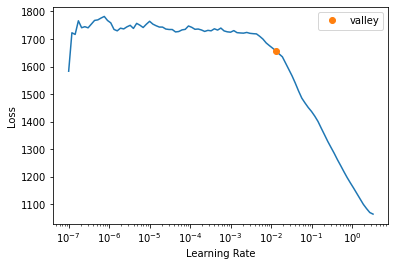

<Figure size 720x720 with 0 Axes>

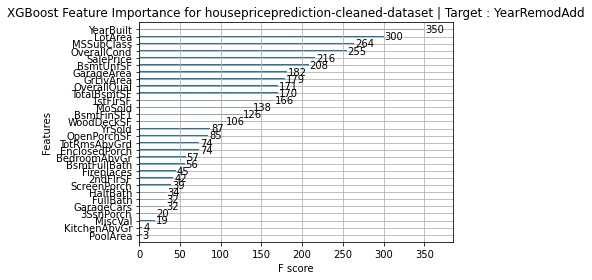

Target Variable: YearBuilt
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
30
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch

  5%|▍         | 2/42 [00:00<00:06,  5.71it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7046922111546288, 'Adjusted R-Squared': 0.6707487871494137, 'RMSE': 16.593923796888234, 'Time taken': 0.24594569206237793}
{'Model': 'BaggingRegressor', 'R-Squared': 0.8490273264688061, 'Adjusted R-Squared': 0.8316741456031516, 'RMSE': 11.864810697044954, 'Time taken': 0.12407994270324707}
{'Model': 'BayesianRidge', 'R-Squared': 0.7266841553602088, 'Adjusted R-Squared': 0.695268541033796, 'RMSE': 15.964085501386169, 'Time taken': 0.02240777015686035}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.6557034146938239, 'Adjusted R-Squared': 0.6161290945436886, 'RMSE': 17.917524137918072, 'Time taken': 0.05181527137756348}


 14%|█▍        | 6/42 [00:00<00:02, 15.59it/s]

{'Model': 'DummyRegressor', 'R-Squared': -0.03373661736357292, 'Adjusted R-Squared': -0.15255691820996065, 'RMSE': 31.046782, 'Time taken': 0.023575782775878906}
{'Model': 'ElasticNet', 'R-Squared': 0.6409131349648363, 'Adjusted R-Squared': 0.5996387826619438, 'RMSE': 18.298326, 'Time taken': 0.024899721145629883}


 19%|█▉        | 8/42 [00:00<00:03, 10.23it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7198819197735569, 'Adjusted R-Squared': 0.6876844392877588, 'RMSE': 16.16152, 'Time taken': 0.27791404724121094}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.6664205608905898, 'Adjusted R-Squared': 0.6280780966251402, 'RMSE': 17.63645430771007, 'Time taken': 0.033707618713378906}


 24%|██▍       | 10/42 [00:01<00:05,  5.59it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8830914829353661, 'Adjusted R-Squared': 0.8696537223532242, 'RMSE': 10.440822590670868, 'Time taken': 0.6478455066680908}
{'Model': 'GammaRegressor', 'R-Squared': 0.6006133982582073, 'Adjusted R-Squared': 0.5547068923108747, 'RMSE': 19.297825999008943, 'Time taken': 0.024633169174194336}


 26%|██▌       | 11/42 [00:01<00:06,  5.04it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -3011.2992108339404, 'Adjusted R-Squared': -3357.540499435543, 'RMSE': 1675.9485979280337, 'Time taken': 0.2727241516113281}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.6003312754751071, 'Adjusted R-Squared': 0.5543923416216712, 'RMSE': 19.304640693385657, 'Time taken': 0.06299114227294922}


 31%|███       | 13/42 [00:02<00:06,  4.29it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8999577037073149, 'Adjusted R-Squared': 0.8884585891909142, 'RMSE': 9.658361719105386, 'Time taken': 0.5240514278411865}


 33%|███▎      | 14/42 [00:03<00:10,  2.65it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9107799611998123, 'Adjusted R-Squared': 0.9005247843262275, 'RMSE': 9.12100816232807, 'Time taken': 0.9413478374481201}


 38%|███▊      | 16/42 [00:03<00:07,  3.38it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.70400598431769, 'Adjusted R-Squared': 0.669983683664551, 'RMSE': 16.6131928250746, 'Time taken': 0.26564645767211914}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.6413320443829462, 'Adjusted R-Squared': 0.6001058425878825, 'RMSE': 18.287651, 'Time taken': 0.11452531814575195}


 40%|████      | 17/42 [00:03<00:06,  3.86it/s]

{'Model': 'KernelRidge', 'R-Squared': -4164.58918111456, 'Adjusted R-Squared': -4643.39253526566, 'RMSE': 1970.8333, 'Time taken': 0.1487898826599121}
{'Model': 'Lars', 'R-Squared': 0.737765120537397, 'Adjusted R-Squared': 0.7076231803692816, 'RMSE': 15.637123583873173, 'Time taken': 0.07975888252258301}


 45%|████▌     | 19/42 [00:04<00:04,  5.08it/s]

{'Model': 'LarsCV', 'R-Squared': 0.7277898097427342, 'Adjusted R-Squared': 0.6965012821269565, 'RMSE': 15.931762735516436, 'Time taken': 0.14200735092163086}
{'Model': 'Lasso', 'R-Squared': 0.6901045241091541, 'Adjusted R-Squared': 0.6544843544665282, 'RMSE': 16.998838, 'Time taken': 0.046713829040527344}


 50%|█████     | 21/42 [00:04<00:04,  4.27it/s]

{'Model': 'LassoCV', 'R-Squared': 0.7317363134546115, 'Adjusted R-Squared': 0.7009014069551416, 'RMSE': 15.815851, 'Time taken': 0.5342469215393066}
{'Model': 'LassoLars', 'R-Squared': -0.03373662994583193, 'Adjusted R-Squared': -0.15255693223845634, 'RMSE': 31.046782075662932, 'Time taken': 0.04325151443481445}


 62%|██████▏   | 26/42 [00:04<00:02,  7.94it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.7346852789133023, 'Adjusted R-Squared': 0.7041893339608083, 'RMSE': 15.728681358395626, 'Time taken': 0.15132784843444824}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7124188613108284, 'Adjusted R-Squared': 0.6793635580132225, 'RMSE': 16.375397086335187, 'Time taken': 0.03185606002807617}
{'Model': 'LinearRegression', 'R-Squared': 0.7346849121515031, 'Adjusted R-Squared': 0.7041889250424804, 'RMSE': 15.728692, 'Time taken': 0.04198575019836426}
{'Model': 'LinearSVR', 'R-Squared': -684.2770593846334, 'Adjusted R-Squared': -763.0445374748211, 'RMSE': 799.3642791180589, 'Time taken': 0.053225040435791016}


 67%|██████▋   | 28/42 [00:08<00:07,  1.90it/s]

{'Model': 'MLPRegressor', 'R-Squared': -1398.2300358565744, 'Adjusted R-Squared': -1559.0610744607784, 'RMSE': 1142.23693708678, 'Time taken': 2.8424201011657715}
{'Model': 'NuSVR', 'R-Squared': 0.5158363352374233, 'Adjusted R-Squared': 0.4601853392877019, 'RMSE': 21.247495078148145, 'Time taken': 0.17104434967041016}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.5699259483941865, 'Adjusted R-Squared': 0.5204921493590355, 'RMSE': 20.02549503002194, 'Time taken': 0.019438982009887695}


 76%|███████▌  | 32/42 [00:08<00:03,  3.25it/s]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6286637690198891, 'Adjusted R-Squared': 0.5859814436198763, 'RMSE': 18.60781171771555, 'Time taken': 0.04412031173706055}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.5583183911820979, 'Adjusted R-Squared': 0.5075503901685459, 'RMSE': 20.293936564637054, 'Time taken': 0.02916240692138672}
{'Model': 'PoissonRegressor', 'R-Squared': 0.7340891455810639, 'Adjusted R-Squared': 0.7035246795558987, 'RMSE': 15.74634176217461, 'Time taken': 0.07381415367126465}
{'Model': 'RANSACRegressor', 'R-Squared': 0.6367300479975565, 'Adjusted R-Squared': 0.5949748811007238, 'RMSE': 18.4046, 'Time taken': 0.23998665809631348}


 88%|████████▊ | 37/42 [00:09<00:01,  3.61it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.881779839031583, 'Adjusted R-Squared': 0.8681913147823397, 'RMSE': 10.499229130215571, 'Time taken': 1.1509432792663574}
{'Model': 'Ridge', 'R-Squared': 0.7331368649781882, 'Adjusted R-Squared': 0.7024629414124627, 'RMSE': 15.774512, 'Time taken': 0.033875226974487305}
{'Model': 'RidgeCV', 'R-Squared': 0.7331365917351799, 'Adjusted R-Squared': 0.702462636762212, 'RMSE': 15.77452005854789, 'Time taken': 0.02954721450805664}
{'Model': 'SGDRegressor', 'R-Squared': 0.7186536473358025, 'Adjusted R-Squared': 0.6863149861100326, 'RMSE': 16.19691433341889, 'Time taken': 0.04045438766479492}


 93%|█████████▎| 39/42 [00:09<00:00,  4.29it/s]

{'Model': 'SVR', 'R-Squared': 0.5364829046251557, 'Adjusted R-Squared': 0.48320507757057585, 'RMSE': 20.789522702547142, 'Time taken': 0.18100214004516602}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7346849121515031, 'Adjusted R-Squared': 0.7041889250424804, 'RMSE': 15.728692, 'Time taken': 0.01559758186340332}
{'Model': 'TweedieRegressor', 'R-Squared': 0.6003312754751071, 'Adjusted R-Squared': 0.5543923416216712, 'RMSE': 19.304640693385657, 'Time taken': 0.0538487434387207}


 98%|█████████▊| 41/42 [00:10<00:00,  4.65it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.8863618586235968, 'Adjusted R-Squared': 0.8733000032929757, 'RMSE': 10.293753, 'Time taken': 0.271970272064209}


100%|██████████| 42/42 [00:10<00:00,  4.03it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9066815785469927, 'Adjusted R-Squared': 0.8959553232075665, 'RMSE': 9.3281459469128, 'Time taken': 0.2070472240447998}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: YearBuilt
YearBuilt
Target Standard Deviation: 30.001422882080078
                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
HistGradientBoostingRegressor                0.90       0.91    9.12   
LGBMRegressor                                0.90       0.91    9.33   
GradientBoostingRegressor                    0.89       0.90    9.66   
XGBRegressor                                 0.87       0.89   10.29   
ExtraTreesRegressor                          0.87       0.88   10.44   
RandomForestRegressor                        0.87       0.88   10.50   
BaggingRegressor                             0.83       0.85   11.86   
Lars                              

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3859155.250000,3838642.750000,1959.245483,00:00
1,3748228.750000,3470329.500000,1862.881958,00:00
2,3100646.500000,1008730.750000,1004.355896,00:00
3,1918819.500000,416625.875000,645.465637,00:00
4,1222187.250000,345101.531250,587.453430,00:01
5,802900.187500,213343.093750,461.890778,00:01
6,537911.750000,106435.375000,326.244354,00:00
7,365022.062500,50577.328125,224.894043,00:00
8,249737.140625,25866.871094,160.831802,00:01
9,171940.203125,13041.791016,114.200653,00:00


Better model found at epoch 0 with _rmse value: 1959.2454833984375.
Better model found at epoch 1 with _rmse value: 1862.8819580078125.
Better model found at epoch 2 with _rmse value: 1004.3558959960938.
Better model found at epoch 3 with _rmse value: 645.4656372070312.
Better model found at epoch 4 with _rmse value: 587.4534301757812.
Better model found at epoch 5 with _rmse value: 461.8907775878906.
Better model found at epoch 6 with _rmse value: 326.2443542480469.
Better model found at epoch 7 with _rmse value: 224.89404296875.
Better model found at epoch 8 with _rmse value: 160.83180236816406.
Better model found at epoch 9 with _rmse value: 114.20065307617188.
Better model found at epoch 10 with _rmse value: 83.84774017333984.
Better model found at epoch 11 with _rmse value: 71.88752746582031.
Better model found at epoch 12 with _rmse value: 52.38268280029297.
Better model found at epoch 13 with _rmse value: 43.64788055419922.
Better model found at epoch 14 with _rmse value: 40.352

,MSSubClass,OverallQual,OverallCond,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,LotArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,YearBuilt,YearBuilt_pred
0,5.00,5.00,7.00,1.00,1.00,2.00,2.00,3.00,2.00,3.00,1.00,2.00,1.00,1.00,1.00,4.00,4.00,-0.68,-0.30,-0.35,-0.76,-1.13,0.48,-0.45,-1.13,-0.75,-0.21,-0.35,-0.26,-0.92,1947.00,1955.49
1,6.00,6.00,5.00,43.00,1.00,3.00,2.00,4.00,2.00,6.00,2.00,3.00,1.00,1.00,4.00,5.00,5.00,0.06,-0.98,1.12,-0.01,-0.28,0.99,0.61,-0.09,4.35,0.80,-0.35,-0.26,0.08,1992.00,1962.24
2,5.00,7.00,5.00,54.00,2.00,2.00,2.00,2.00,2.00,4.00,2.00,3.00,1.00,1.00,1.00,8.00,4.00,0.21,1.96,-1.08,0.84,0.90,0.63,1.18,0.89,0.60,-0.10,-0.35,3.30,0.72,2003.00,1982.71
3,6.00,8.00,5.00,46.00,1.00,3.00,2.00,5.00,2.00,7.00,2.00,4.00,1.00,1.00,1.00,11.00,2.00,0.16,-0.86,1.44,0.58,0.42,1.93,1.90,1.27,1.03,0.71,-0.35,-0.26,1.36,1995.00,1958.67
4,5.00,5.00,6.00,1.00,1.00,2.00,1.00,3.00,2.00,3.00,1.00,2.00,1.00,1.00,1.00,7.00,2.00,-0.05,-0.98,0.39,-0.73,-1.09,-0.13,-0.93,-1.13,-0.75,-0.15,-0.35,-0.26,-0.94,1940.00,1944.43
5,5.00,3.00,2.00,33.00,1.00,2.00,1.00,3.00,2.00,4.00,1.00,1.00,1.00,1.00,1.00,10.00,4.00,-0.21,-0.98,1.02,-0.11,-0.39,-0.80,0.00,-2.26,-0.75,-0.73,2.23,-0.26,-1.24,1915.00,1938.87
6,9.00,7.00,5.00,43.00,1.00,3.00,2.00,4.00,2.00,5.00,2.00,3.00,1.00,1.00,1.00,7.00,2.00,-0.15,-0.98,-0.40,-1.52,-0.90,0.72,-0.08,-0.42,0.05,-0.36,-0.35,-0.26,-0.24,1992.00,1960.56
7,1.00,8.00,5.00,59.00,2.00,3.00,1.00,4.00,2.00,5.00,2.00,4.00,1.00,1.00,1.00,4.00,3.00,-0.11,2.31,-0.99,1.29,1.23,-0.80,0.23,1.50,0.79,-0.08,-0.35,-0.26,1.40,2007.00,1988.29
8,1.00,7.00,5.00,52.00,1.00,3.00,1.00,4.00,2.00,4.00,1.00,3.00,1.00,1.00,1.00,12.00,2.00,-0.21,-0.98,1.78,0.65,0.47,-0.80,-0.33,0.27,0.21,0.08,-0.35,-0.26,-0.05,2000.00,1983.30


<Figure size 432x288 with 0 Axes>

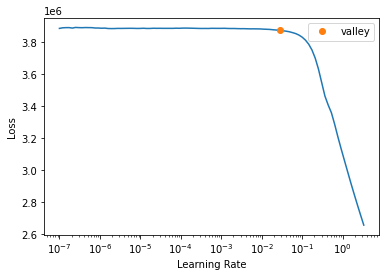

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0 1920.00    1923.75
1 1978.00    1968.77
2 1892.00    1911.70
3 1958.00    1954.16
4 1935.00    1934.89
XGBoost RMSE:  10.25881


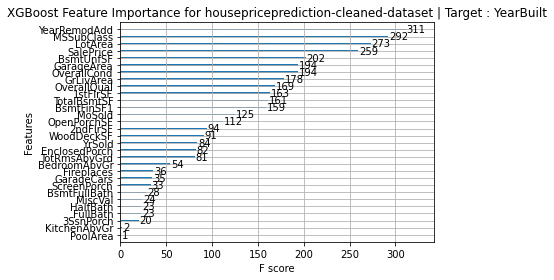

Target Variable: OverallCond
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
31
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplace

  5%|▍         | 2/42 [00:00<00:06,  5.79it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.10927531501069776, 'Adjusted R-Squared': 0.006893167310777937, 'RMSE': 0.9816741888442106, 'Time taken': 0.2413334846496582}
{'Model': 'BaggingRegressor', 'R-Squared': 0.4006985517301188, 'Adjusted R-Squared': 0.331813327791052, 'RMSE': 0.8052269313422795, 'Time taken': 0.12307500839233398}
{'Model': 'BayesianRidge', 'R-Squared': 0.41224993667379173, 'Adjusted R-Squared': 0.3446924581305494, 'RMSE': 0.7974288987643883, 'Time taken': 0.03821372985839844}


 10%|▉         | 4/42 [00:00<00:04,  9.07it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.16802532304223394, 'Adjusted R-Squared': -0.30228110729996205, 'RMSE': 1.124143509582734, 'Time taken': 0.10571146011352539}
{'Model': 'DummyRegressor', 'R-Squared': -0.0010840343422080512, 'Adjusted R-Squared': -0.11615116472637, 'RMSE': 1.040712799019576, 'Time taken': 0.013767719268798828}
{'Model': 'ElasticNet', 'R-Squared': -0.0010840088890189392, 'Adjusted R-Squared': -0.11615113634752694, 'RMSE': 1.0407127, 'Time taken': 0.016544103622436523}


 17%|█▋        | 7/42 [00:01<00:05,  6.82it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.4097006699331579, 'Adjusted R-Squared': 0.34185017222432545, 'RMSE': 0.7991564, 'Time taken': 0.48872876167297363}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.015566733154106283, 'Adjusted R-Squared': -0.0975865159086402, 'RMSE': 1.032021556533915, 'Time taken': 0.032972097396850586}


 21%|██▏       | 9/42 [00:01<00:06,  5.07it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.5198396669846501, 'Adjusted R-Squared': 0.4646488241093225, 'RMSE': 0.7207568320584302, 'Time taken': 0.5447854995727539}
{'Model': 'GammaRegressor', 'R-Squared': 0.20752202903070405, 'Adjusted R-Squared': 0.1164326070802102, 'RMSE': 0.9259536062866273, 'Time taken': 0.027602434158325195}


 26%|██▌       | 11/42 [00:01<00:05,  5.68it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -19.50869719011833, 'Adjusted R-Squared': -21.866018706223887, 'RMSE': 4.710474580449216, 'Time taken': 0.2392716407775879}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.21185463283399852, 'Adjusted R-Squared': 0.12126321132066498, 'RMSE': 0.923418968998049, 'Time taken': 0.030997514724731445}


 31%|███       | 13/42 [00:02<00:06,  4.76it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.5003149562621648, 'Adjusted R-Squared': 0.44287989376356307, 'RMSE': 0.7352648479530917, 'Time taken': 0.5278854370117188}


 33%|███▎      | 14/42 [00:03<00:07,  3.52it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.4529753440019363, 'Adjusted R-Squared': 0.3900989467607795, 'RMSE': 0.7693059279884777, 'Time taken': 0.6038148403167725}


 40%|████      | 17/42 [00:03<00:05,  4.62it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.37837592075210125, 'Adjusted R-Squared': 0.30692487716038874, 'RMSE': 0.8200862731350007, 'Time taken': 0.3041963577270508}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.21080738877807648, 'Adjusted R-Squared': 0.12009559438475181, 'RMSE': 0.9240322594143324, 'Time taken': 0.09068894386291504}
{'Model': 'KernelRidge', 'R-Squared': -28.488595974144502, 'Adjusted R-Squared': -31.878089764276055, 'RMSE': 5.648364, 'Time taken': 0.09727668762207031}


 45%|████▌     | 19/42 [00:03<00:04,  5.51it/s]

{'Model': 'Lars', 'R-Squared': 0.31140671247635654, 'Adjusted R-Squared': 0.23225805873800665, 'RMSE': 0.863131607428922, 'Time taken': 0.0881798267364502}
{'Model': 'LarsCV', 'R-Squared': 0.404867832005804, 'Adjusted R-Squared': 0.33646183568463206, 'RMSE': 0.8024211012156974, 'Time taken': 0.13457202911376953}
{'Model': 'Lasso', 'R-Squared': -0.0010840088890189392, 'Adjusted R-Squared': -0.11615113634752694, 'RMSE': 1.0407127, 'Time taken': 0.08635067939758301}


 50%|█████     | 21/42 [00:04<00:04,  4.40it/s]

{'Model': 'LassoCV', 'R-Squared': 0.4101327641542203, 'Adjusted R-Squared': 0.3423319324478088, 'RMSE': 0.7988638, 'Time taken': 0.5353050231933594}
{'Model': 'LassoLars', 'R-Squared': -0.0010840206958835363, 'Adjusted R-Squared': -0.1161511495115024, 'RMSE': 1.0407127919263128, 'Time taken': 0.0653374195098877}


 60%|█████▉    | 25/42 [00:04<00:02,  6.83it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.408499173082449, 'Adjusted R-Squared': 0.3405105722873282, 'RMSE': 0.7999692733817201, 'Time taken': 0.1488056182861328}
{'Model': 'LassoLarsIC', 'R-Squared': 0.40601358330645254, 'Adjusted R-Squared': 0.3377392825370792, 'RMSE': 0.8016483166204323, 'Time taken': 0.04285097122192383}
{'Model': 'LinearRegression', 'R-Squared': 0.4144522776907117, 'Adjusted R-Squared': 0.3471479417930923, 'RMSE': 0.7959335, 'Time taken': 0.06097269058227539}
{'Model': 'LinearSVR', 'R-Squared': 0.29023629910024307, 'Adjusted R-Squared': 0.2086542645140641, 'RMSE': 0.8762994123440919, 'Time taken': 0.19086718559265137}


 64%|██████▍   | 27/42 [00:07<00:07,  1.88it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.011057505164150161, 'Adjusted R-Squared': -0.10261404596640733, 'RMSE': 1.0343824599091134, 'Time taken': 2.5849478244781494}


 76%|███████▌  | 32/42 [00:07<00:02,  3.92it/s]

{'Model': 'NuSVR', 'R-Squared': 0.48801642237247633, 'Adjusted R-Squared': 0.4291677352888529, 'RMSE': 0.7442582261229733, 'Time taken': 0.2232210636138916}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.3505670192993554, 'Adjusted R-Squared': 0.2759195502533043, 'RMSE': 0.838229224232151, 'Time taken': 0.019416093826293945}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.3786510748626555, 'Adjusted R-Squared': 0.30723165818020204, 'RMSE': 0.8199047525887233, 'Time taken': 0.042722463607788086}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.5329048465534079, 'Adjusted R-Squared': -0.7091008059273629, 'RMSE': 1.2878142512243504, 'Time taken': 0.031836509704589844}
{'Model': 'PoissonRegressor', 'R-Squared': 0.35894040572508024, 'Adjusted R-Squared': 0.2852553948888825, 'RMSE': 0.8328078886028915, 'Time taken': 0.07150936126708984}
RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because e

 81%|████████  | 34/42 [00:09<00:02,  2.71it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.5247504379498743, 'Adjusted R-Squared': 0.47012405150733105, 'RMSE': 0.7170616411859401, 'Time taken': 1.1158421039581299}
{'Model': 'Ridge', 'R-Squared': 0.4159373681790677, 'Adjusted R-Squared': 0.3488037323375811, 'RMSE': 0.79492354, 'Time taken': 0.018976926803588867}
{'Model': 'RidgeCV', 'R-Squared': 0.4152206557715258, 'Adjusted R-Squared': 0.3480046391935402, 'RMSE': 0.7954110867897433, 'Time taken': 0.028475284576416016}
{'Model': 'SGDRegressor', 'R-Squared': 0.4113831126710271, 'Adjusted R-Squared': 0.3437259991849382, 'RMSE': 0.7980167131102589, 'Time taken': 0.03202939033508301}


 90%|█████████ | 38/42 [00:09<00:00,  4.20it/s]

{'Model': 'SVR', 'R-Squared': 0.4769538147469342, 'Adjusted R-Squared': 0.41683356356842083, 'RMSE': 0.7522559779158323, 'Time taken': 0.18636107444763184}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.4144522776907117, 'Adjusted R-Squared': 0.3471479417930923, 'RMSE': 0.7959335, 'Time taken': 0.019565343856811523}
{'Model': 'TweedieRegressor', 'R-Squared': 0.21185463283399852, 'Adjusted R-Squared': 0.12126321132066498, 'RMSE': 0.923418968998049, 'Time taken': 0.05321979522705078}


 98%|█████████▊| 41/42 [00:09<00:00,  5.05it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.5022271587474778, 'Adjusted R-Squared': 0.44501188963799243, 'RMSE': 0.7338567, 'Time taken': 0.26067614555358887}


100%|██████████| 42/42 [00:10<00:00,  4.16it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.4752783912256272, 'Adjusted R-Squared': 0.4149655626308717, 'RMSE': 0.753459829239902, 'Time taken': 0.22468829154968262}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: OverallCond
OverallCond
Target Standard Deviation: 1.1296595089306647
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.47       0.52  0.72        1.12
ExtraTreesRegressor                          0.46       0.52  0.72        0.54
XGBRegressor                                 0.45       0.50  0.73        0.26
GradientBoostingRegressor                    0.44       0.50  0.74        0.53
NuSVR                                        0.43       0.49  0.74        0.22
SVR                                          0.42       0.48  0.75        0.19
LGBMRegressor                              

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,11.772720,12.614399,3.551676,00:00
1,7.754890,5.785385,2.405283,00:00
2,5.455719,5.034379,2.243742,00:00
3,3.913327,4.109866,2.027280,00:00
4,2.969130,3.080145,1.755034,00:00
5,2.352373,2.166396,1.471868,00:00
6,1.946668,2.541278,1.594139,00:00


Better model found at epoch 0 with _rmse value: 3.55167555809021.
Better model found at epoch 1 with _rmse value: 2.405282735824585.
Better model found at epoch 2 with _rmse value: 2.243741989135742.
Better model found at epoch 3 with _rmse value: 2.027280330657959.
Better model found at epoch 4 with _rmse value: 1.755034327507019.
Better model found at epoch 5 with _rmse value: 1.4718682765960693.
No improvement since epoch 5: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       5       5.08
1       6       5.91
2       7       5.59
3       5       4.89
4       7       6.42
XGBoost RMSE:  0.7341857


<Figure size 432x288 with 0 Axes>

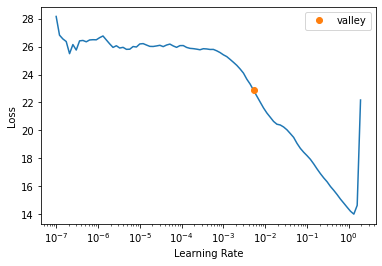

<Figure size 720x720 with 0 Axes>

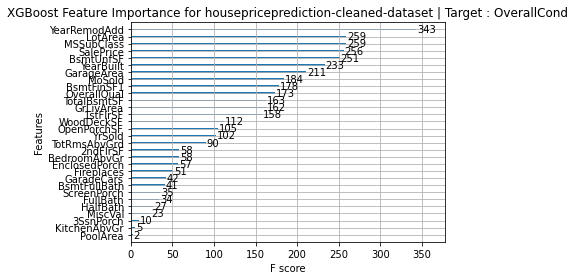

Target Variable: OverallQual
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
31
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplace

  5%|▍         | 2/42 [00:00<00:06,  5.77it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7404458601012718, 'Adjusted R-Squared': 0.7106120509175099, 'RMSE': 0.757587639133978, 'Time taken': 0.2421720027923584}
{'Model': 'BaggingRegressor', 'R-Squared': 0.7339879070754216, 'Adjusted R-Squared': 0.7034118044404125, 'RMSE': 0.7669544824056977, 'Time taken': 0.1237490177154541}
{'Model': 'BayesianRidge', 'R-Squared': 0.7252449704970471, 'Adjusted R-Squared': 0.6936639326231444, 'RMSE': 0.7794562172055147, 'Time taken': 0.038657188415527344}


 10%|▉         | 4/42 [00:00<00:03,  9.95it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.5802906545030233, 'Adjusted R-Squared': 0.5320482009976237, 'RMSE': 0.9633702257080722, 'Time taken': 0.07369279861450195}
{'Model': 'DummyRegressor', 'R-Squared': -6.497295003726755e-05, 'Adjusted R-Squared': -0.11501496984084625, 'RMSE': 1.4870754644115896, 'Time taken': 0.02533721923828125}
{'Model': 'ElasticNet', 'R-Squared': 0.4055080994268593, 'Adjusted R-Squared': 0.33717569706213046, 'RMSE': 1.1465471, 'Time taken': 0.01358485221862793}


 17%|█▋        | 7/42 [00:00<00:03, 11.00it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7256651919441968, 'Adjusted R-Squared': 0.6941324553860584, 'RMSE': 0.7788599, 'Time taken': 0.20618772506713867}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.5152434496658534, 'Adjusted R-Squared': 0.45952430594928484, 'RMSE': 1.0353346358637763, 'Time taken': 0.035151004791259766}


 21%|██▏       | 9/42 [00:01<00:05,  5.94it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.7584510766946007, 'Adjusted R-Squared': 0.7306868326365088, 'RMSE': 0.7308385594644005, 'Time taken': 0.5784876346588135}
{'Model': 'GammaRegressor', 'R-Squared': 0.6653759645012555, 'Adjusted R-Squared': 0.6269134316853078, 'RMSE': 0.8601960939258655, 'Time taken': 0.028716325759887695}


 26%|██▌       | 11/42 [00:01<00:04,  6.34it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -7.962787354995626, 'Adjusted R-Squared': -8.992992798098573, 'RMSE': 4.451849215367994, 'Time taken': 0.24260354042053223}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.6711057010091969, 'Adjusted R-Squared': 0.6333017585964609, 'RMSE': 0.8527997663555789, 'Time taken': 0.030558347702026367}


 31%|███       | 13/42 [00:02<00:05,  5.03it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.7715184667302704, 'Adjusted R-Squared': 0.7452562215268531, 'RMSE': 0.710795144080758, 'Time taken': 0.534442663192749}


 33%|███▎      | 14/42 [00:02<00:07,  3.58it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.7639724826986127, 'Adjusted R-Squared': 0.7368428830087981, 'RMSE': 0.7224373967817281, 'Time taken': 0.6235864162445068}


 38%|███▊      | 16/42 [00:03<00:07,  3.64it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.7221223693144256, 'Adjusted R-Squared': 0.6901824117643596, 'RMSE': 0.7838729780219162, 'Time taken': 0.4911344051361084}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.6628076800678901, 'Adjusted R-Squared': 0.624049942144659, 'RMSE': 0.863490844396259, 'Time taken': 0.1059877872467041}


 40%|████      | 17/42 [00:03<00:05,  4.30it/s]

{'Model': 'KernelRidge', 'R-Squared': -11.088023439965571, 'Adjusted R-Squared': -12.47745142157081, 'RMSE': 5.1700716, 'Time taken': 0.09968733787536621}
{'Model': 'Lars', 'R-Squared': 0.7250349954316075, 'Adjusted R-Squared': 0.6934298224927118, 'RMSE': 0.7797540008583032, 'Time taken': 0.05321240425109863}


 45%|████▌     | 19/42 [00:03<00:04,  5.40it/s]

{'Model': 'LarsCV', 'R-Squared': 0.7261033586723554, 'Adjusted R-Squared': 0.6946209861059595, 'RMSE': 0.7782376782763916, 'Time taken': 0.17801141738891602}
{'Model': 'Lasso', 'R-Squared': 0.08035930883091902, 'Adjusted R-Squared': -0.025346517740239882, 'RMSE': 1.4260277, 'Time taken': 0.022276878356933594}


 55%|█████▍    | 23/42 [00:04<00:02,  7.02it/s]

{'Model': 'LassoCV', 'R-Squared': 0.7259102378328999, 'Adjusted R-Squared': 0.6944056674688653, 'RMSE': 0.77851206, 'Time taken': 0.25490784645080566}
{'Model': 'LassoLars', 'R-Squared': -6.497394144933111e-05, 'Adjusted R-Squared': -0.1150149709462136, 'RMSE': 1.4870754651486942, 'Time taken': 0.030761241912841797}
{'Model': 'LassoLarsCV', 'R-Squared': 0.7261033586723554, 'Adjusted R-Squared': 0.6946209861059595, 'RMSE': 0.7782376782763916, 'Time taken': 0.15022945404052734}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7193678989816724, 'Adjusted R-Squared': 0.6871113356462324, 'RMSE': 0.7877484798780281, 'Time taken': 0.033341407775878906}
{'Model': 'LinearRegression', 'R-Squared': 0.725035167345959, 'Adjusted R-Squared': 0.6934300141673335, 'RMSE': 0.77975374, 'Time taken': 0.051151275634765625}


 62%|██████▏   | 26/42 [00:04<00:01,  8.19it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.7106134537035054, 'Adjusted R-Squared': 0.6773506322901152, 'RMSE': 0.7999412057257705, 'Time taken': 0.19083070755004883}


 64%|██████▍   | 27/42 [00:07<00:09,  1.53it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.29385142657950825, 'Adjusted R-Squared': -0.44256998135876224, 'RMSE': 1.6914575559353895, 'Time taken': 3.2564597129821777}


 76%|███████▌  | 32/42 [00:08<00:02,  3.47it/s]

{'Model': 'NuSVR', 'R-Squared': 0.6910727763303965, 'Adjusted R-Squared': 0.6555639000465341, 'RMSE': 0.8265078649811602, 'Time taken': 0.22455310821533203}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6816589016229089, 'Adjusted R-Squared': 0.6450679707749674, 'RMSE': 0.8390063641680419, 'Time taken': 0.019711732864379883}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7011145534320617, 'Adjusted R-Squared': 0.6667599044012642, 'RMSE': 0.8129639436131926, 'Time taken': 0.04221463203430176}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.5697626076227054, 'Adjusted R-Squared': 0.5203100337862347, 'RMSE': 0.9753780461828159, 'Time taken': 0.032236337661743164}
{'Model': 'PoissonRegressor', 'R-Squared': 0.6928509273180458, 'Adjusted R-Squared': 0.6575464362051775, 'RMSE': 0.8241257882880316, 'Time taken': 0.039131879806518555}
{'Model': 'RANSACRegressor', 'R-Squared': 0.6242879887665765, 'Adjusted R-Squared': 0.5811027001190565, 'RMSE': 0.9114785, 'Time taken': 0

 81%|████████  | 34/42 [00:09<00:03,  2.52it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.7589414087196351, 'Adjusted R-Squared': 0.7312335246644208, 'RMSE': 0.7300964000901918, 'Time taken': 1.1396119594573975}
{'Model': 'Ridge', 'R-Squared': 0.7251344802260341, 'Adjusted R-Squared': 0.6935407423209805, 'RMSE': 0.77961296, 'Time taken': 0.02081012725830078}
{'Model': 'RidgeCV', 'R-Squared': 0.7253135159754751, 'Adjusted R-Squared': 0.6937403568921964, 'RMSE': 0.779358982348465, 'Time taken': 0.030053138732910156}
{'Model': 'SGDRegressor', 'R-Squared': 0.7240974434764149, 'Adjusted R-Squared': 0.6923845059449683, 'RMSE': 0.7810822385610449, 'Time taken': 0.029240131378173828}


 90%|█████████ | 38/42 [00:09<00:01,  3.94it/s]

{'Model': 'SVR', 'R-Squared': 0.7016172940659233, 'Adjusted R-Squared': 0.66732043131488, 'RMSE': 0.8122799323548584, 'Time taken': 0.19874048233032227}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.725035167345959, 'Adjusted R-Squared': 0.6934300141673335, 'RMSE': 0.77975374, 'Time taken': 0.02220630645751953}
{'Model': 'TweedieRegressor', 'R-Squared': 0.6711057010091969, 'Adjusted R-Squared': 0.6333017585964609, 'RMSE': 0.8527997663555789, 'Time taken': 0.030740022659301758}


 98%|█████████▊| 41/42 [00:10<00:00,  4.77it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.7460745458344533, 'Adjusted R-Squared': 0.7168877120223215, 'RMSE': 0.74932814, 'Time taken': 0.2923588752746582}


100%|██████████| 42/42 [00:10<00:00,  4.04it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.7557143393411603, 'Adjusted R-Squared': 0.7276355277711787, 'RMSE': 0.7349670807803915, 'Time taken': 0.24055004119873047}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: OverallQual
OverallQual
Target Standard Deviation: 1.3580300143212356
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.75       0.77  0.71        0.53
HistGradientBoostingRegressor                0.74       0.76  0.72        0.62
RandomForestRegressor                        0.73       0.76  0.73        1.14
ExtraTreesRegressor                          0.73       0.76  0.73        0.58
LGBMRegressor                                0.73       0.76  0.73        0.24
XGBRegressor                                 0.72       0.75  0.75        0.29
AdaBoostRegressor                         

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,19.951267,7.848068,2.801440,00:00
1,13.101569,12.526342,3.539257,00:01


Better model found at epoch 0 with _rmse value: 2.801440477371216.
No improvement since epoch 0: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       5       5.51
1       6       6.51
2       4       3.62
3       5       4.80
4       9       8.41
XGBoost RMSE:  0.74900824


<Figure size 432x288 with 0 Axes>

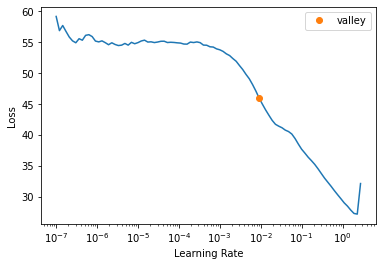

<Figure size 720x720 with 0 Axes>

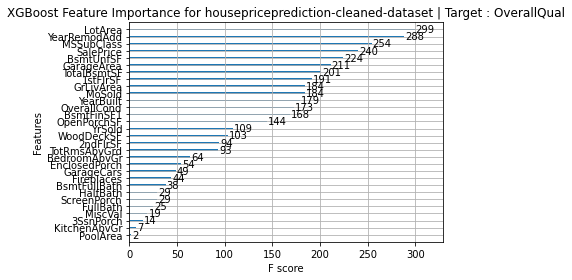

Target Variable: LotArea
CATS=====================
['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
CONTS=====================
['YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
30
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical variables that made the cut : ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPor

  5%|▍         | 2/42 [00:00<00:07,  5.59it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.9787548622878863, 'Adjusted R-Squared': -1.206197949907184, 'RMSE': 6454.984187282536, 'Time taken': 0.2012016773223877}
{'Model': 'BaggingRegressor', 'R-Squared': -0.49893406049940037, 'Adjusted R-Squared': -0.6712253318211707, 'RMSE': 5618.112730667328, 'Time taken': 0.16162395477294922}
{'Model': 'BayesianRidge', 'R-Squared': 0.10393664625389376, 'Adjusted R-Squared': 0.0009408584669848841, 'RMSE': 4343.787221526901, 'Time taken': 0.03091573715209961}


 10%|▉         | 4/42 [00:00<00:04,  8.85it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.2780503659814866, 'Adjusted R-Squared': -0.42495270689889897, 'RMSE': 5187.679889602509, 'Time taken': 0.11478805541992188}
{'Model': 'DummyRegressor', 'R-Squared': -0.026669730418271698, 'Adjusted R-Squared': -0.14467774540887768, 'RMSE': 4649.589, 'Time taken': 0.024302959442138672}
{'Model': 'ElasticNet', 'R-Squared': 0.14832031451930894, 'Adjusted R-Squared': 0.05042609779739038, 'RMSE': 4234.8433, 'Time taken': 0.04274773597717285}


 17%|█▋        | 7/42 [00:00<00:03,  8.96it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.16475773938074378, 'Adjusted R-Squared': 0.06875288183830053, 'RMSE': 4193.778, 'Time taken': 0.2617299556732178}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.07094892696367561, 'Adjusted R-Squared': -0.19404650477559238, 'RMSE': 4748.796566009379, 'Time taken': 0.06713032722473145}


 21%|██▏       | 9/42 [00:01<00:07,  4.32it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.9911242772285882, 'Adjusted R-Squared': -1.2199891366801503, 'RMSE': 6475.128164904649, 'Time taken': 0.8283243179321289}
{'Model': 'GammaRegressor', 'R-Squared': 0.20561219330459557, 'Adjusted R-Squared': 0.11430325000627317, 'RMSE': 4089.9261847673656, 'Time taken': 0.02917003631591797}


 26%|██▌       | 11/42 [00:02<00:06,  4.97it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -3.287668831625889, 'Adjusted R-Squared': -3.7805043295139225, 'RMSE': 9501.8857086581, 'Time taken': 0.2531087398529053}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.16928017625799752, 'Adjusted R-Squared': 0.073795139046273, 'RMSE': 4182.408729392262, 'Time taken': 0.0385286808013916}


 31%|███       | 13/42 [00:02<00:06,  4.46it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.11233030822790002, 'Adjusted R-Squared': 0.010299309173635529, 'RMSE': 4323.394652740941, 'Time taken': 0.5033619403839111}


 36%|███▌      | 15/42 [00:03<00:08,  3.22it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.0611491669800992, 'Adjusted R-Squared': -0.04676472187276293, 'RMSE': 4446.286907431268, 'Time taken': 0.8753147125244141}
{'Model': 'HuberRegressor', 'R-Squared': 0.22042316570681098, 'Adjusted R-Squared': 0.13081663302943292, 'RMSE': 4051.6194547054024, 'Time taken': 0.1742236614227295}


 40%|████      | 17/42 [00:03<00:05,  4.44it/s]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.20290499666980333, 'Adjusted R-Squared': 0.11128488134449332, 'RMSE': 4096.889, 'Time taken': 0.06245279312133789}
{'Model': 'KernelRidge', 'R-Squared': -5.115292861882801, 'Adjusted R-Squared': -5.818200087386572, 'RMSE': 11347.699, 'Time taken': 0.09617161750793457}
{'Model': 'Lars', 'R-Squared': -0.024230162558129598, 'Adjusted R-Squared': -0.14195776744986865, 'RMSE': 4644.061537056222, 'Time taken': 0.07992696762084961}


 48%|████▊     | 20/42 [00:04<00:03,  6.02it/s]

{'Model': 'LarsCV', 'R-Squared': 0.15008464242210584, 'Adjusted R-Squared': 0.05239322201085361, 'RMSE': 4230.454453027145, 'Time taken': 0.10991740226745605}
{'Model': 'Lasso', 'R-Squared': 0.03680831121357386, 'Adjusted R-Squared': -0.07390337715268203, 'RMSE': 4503.556, 'Time taken': 0.10147786140441895}


 50%|█████     | 21/42 [00:04<00:04,  4.38it/s]

{'Model': 'LassoCV', 'R-Squared': 0.0966430091270849, 'Adjusted R-Squared': -0.007191127754859528, 'RMSE': 4361.4297, 'Time taken': 0.43382835388183594}
{'Model': 'LassoLars', 'R-Squared': 0.05274425801444671, 'Adjusted R-Squared': -0.0561357123287205, 'RMSE': 4466.144891813382, 'Time taken': 0.0820622444152832}


 60%|█████▉    | 25/42 [00:04<00:02,  6.58it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.10560052901597428, 'Adjusted R-Squared': 0.0027959921212585837, 'RMSE': 4339.7524002476275, 'Time taken': 0.24194979667663574}
{'Model': 'LassoLarsIC', 'R-Squared': 0.11318231642813215, 'Adjusted R-Squared': 0.011249249350905877, 'RMSE': 4321.319301936847, 'Time taken': 0.06270551681518555}
{'Model': 'LinearRegression', 'R-Squared': 0.034831144616805254, 'Adjusted R-Squared': -0.07610780427781494, 'RMSE': 4508.176, 'Time taken': 0.05415844917297363}
{'Model': 'LinearSVR', 'R-Squared': -3.635379434652555, 'Adjusted R-Squared': -4.168181668520665, 'RMSE': 9879.656156444997, 'Time taken': 0.041352033615112305}


 67%|██████▋   | 28/42 [00:08<00:07,  1.85it/s]

{'Model': 'MLPRegressor', 'R-Squared': -3.633731548860907, 'Adjusted R-Squared': -4.166344370569058, 'RMSE': 9877.899882505162, 'Time taken': 3.083646774291992}
{'Model': 'NuSVR', 'R-Squared': -0.002181363702458583, 'Adjusted R-Squared': -0.11737462389814346, 'RMSE': 4593.802781993536, 'Time taken': 0.16604948043823242}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.04860940470648345, 'Adjusted R-Squared': -0.060745836131851805, 'RMSE': 4475.881832257163, 'Time taken': 0.018659591674804688}


 74%|███████▍  | 31/42 [00:08<00:03,  3.21it/s]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.03283811060944131, 'Adjusted R-Squared': -0.1515551348174231, 'RMSE': 4663.535772770383, 'Time taken': 0.04456973075866699}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.2104547040469128, 'Adjusted R-Squared': 0.11970237117874183, 'RMSE': 4077.4412329692386, 'Time taken': 0.042705535888671875}
{'Model': 'PoissonRegressor', 'R-Squared': 0.06946726236983725, 'Adjusted R-Squared': -0.03749052356466431, 'RMSE': 4426.546325643914, 'Time taken': 0.09182357788085938}


 79%|███████▊  | 33/42 [00:08<00:02,  3.76it/s]

{'Model': 'RANSACRegressor', 'R-Squared': -0.06546626694623026, 'Adjusted R-Squared': -0.18793365395154416, 'RMSE': 4736.6255, 'Time taken': 0.23123979568481445}


 88%|████████▊ | 37/42 [00:10<00:01,  3.17it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.0400021437098208, 'Adjusted R-Squared': -0.1595426199983061, 'RMSE': 4679.681570319284, 'Time taken': 1.5117545127868652}
{'Model': 'Ridge', 'R-Squared': 0.03746290976183686, 'Adjusted R-Squared': -0.07317353739197507, 'RMSE': 4502.0254, 'Time taken': 0.03599858283996582}
{'Model': 'RidgeCV', 'R-Squared': 0.04894319040263906, 'Adjusted R-Squared': -0.06037368426372436, 'RMSE': 4475.096604611937, 'Time taken': 0.0646359920501709}
{'Model': 'SGDRegressor', 'R-Squared': 0.05974659826916762, 'Adjusted R-Squared': -0.048328505378054665, 'RMSE': 4449.606868020011, 'Time taken': 0.07738137245178223}


 90%|█████████ | 38/42 [00:10<00:01,  3.47it/s]

{'Model': 'SVR', 'R-Squared': -0.003712663337986699, 'Adjusted R-Squared': -0.11908193498603126, 'RMSE': 4597.311030957016, 'Time taken': 0.15891599655151367}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.034831144616805254, 'Adjusted R-Squared': -0.07610780427781494, 'RMSE': 4508.176, 'Time taken': 0.022721052169799805}
{'Model': 'TweedieRegressor', 'R-Squared': 0.16928017625799752, 'Adjusted R-Squared': 0.073795139046273, 'RMSE': 4182.408729392262, 'Time taken': 0.06870150566101074}


 98%|█████████▊| 41/42 [00:10<00:00,  4.61it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.0636101380809655, 'Adjusted R-Squared': -0.04402088053041786, 'RMSE': 4440.4556, 'Time taken': 0.2740640640258789}


100%|██████████| 42/42 [00:11<00:00,  3.76it/s]

{'Model': 'LGBMRegressor', 'R-Squared': -0.020706371705524917, 'Adjusted R-Squared': -0.13802894316593006, 'RMSE': 4636.065872690876, 'Time taken': 0.21030759811401367}
Project: housepriceprediction-cleaned-dataset
housepriceprediction-cleaned-dataset
Target: LotArea
LotArea
Target Standard Deviation: 10911.9287109375
                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
HuberRegressor                               0.13       0.22  4051.62   
PassiveAggressiveRegressor                   0.12       0.21  4077.44   
GammaRegressor                               0.11       0.21  4089.93   
KNeighborsRegressor                          0.11       0.20  4096.89   
TweedieRegressor                             0.07       0.17  4182.41   
GeneralizedLinearRegressor                   0.07       0.17  4182.41   
ElasticNetCV                                 0.07       0.16  4193.78   
LarsCV                 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,225538304.000000,119303096.000000,10922.595703,00:00
1,231473552.000000,118004024.000000,10862.965820,00:01
2,226821504.000000,94267560.000000,9709.148438,00:01
3,209597408.000000,31048100.000000,5572.082031,00:00
4,177563920.000000,735649088.000000,27122.851562,00:00


Better model found at epoch 0 with _rmse value: 10922.595703125.
Better model found at epoch 1 with _rmse value: 10862.9658203125.
Better model found at epoch 2 with _rmse value: 9709.1484375.
Better model found at epoch 3 with _rmse value: 5572.08203125.
No improvement since epoch 3: early stopping


,MSSubClass,OverallQual,OverallCond,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,LotArea,LotArea_pred
0,1.00,8.00,4.00,53.00,2.00,3.00,1.00,3.00,2.00,5.00,1.00,3.00,1.00,1.00,1.00,6.00,4.00,0.96,1.19,-0.70,0.44,0.31,-0.80,-0.43,-0.03,0.74,-0.34,-0.36,-0.27,0.45,6853.00,9732.43
1,5.00,6.00,6.00,1.00,1.00,3.00,1.00,4.00,2.00,6.00,2.00,2.00,1.00,1.00,1.00,7.00,4.00,-1.06,-0.96,0.48,-0.64,-0.56,0.44,-0.07,-1.09,1.86,-0.71,-0.36,-0.27,-0.54,9900.00,3732.97
2,1.00,6.00,7.00,54.00,1.00,2.00,1.00,4.00,2.00,5.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,-0.30,0.46,-0.39,-0.02,-0.25,-0.80,-0.85,-0.98,0.74,-0.71,-0.36,-0.27,-0.35,8414.00,5769.79
3,5.00,6.00,4.00,1.00,1.00,2.00,1.00,4.00,2.00,5.00,1.00,2.00,1.00,1.00,1.00,4.00,3.00,-0.73,-0.36,0.42,-0.08,-0.34,-0.30,-0.51,-0.87,-0.76,-0.71,1.26,-0.27,-0.79,9600.00,7623.06
4,1.00,5.00,5.00,8.00,2.00,2.00,1.00,4.00,2.00,4.00,1.00,2.00,1.00,1.00,1.00,6.00,5.00,-0.49,1.01,-0.40,0.55,0.36,-0.80,-0.40,-0.84,1.19,-0.71,-0.36,-0.27,-0.47,8400.00,7681.07
5,2.00,5.00,6.00,58.00,1.00,3.00,1.00,4.00,2.00,6.00,1.00,3.00,1.00,1.00,1.00,8.00,2.00,-1.79,-0.96,0.56,-0.55,0.61,-0.80,-0.21,0.45,-0.76,-0.71,1.53,-0.27,-0.87,25339.00,10580.44
6,1.00,5.00,7.00,54.00,3.00,2.00,1.00,2.00,2.00,4.00,3.00,2.00,1.00,1.00,1.00,6.00,4.00,-0.13,1.87,-1.03,0.82,0.75,-0.80,-0.10,-0.12,-0.76,-0.00,-0.36,0.79,-0.49,25095.00,9239.94
7,6.00,7.00,4.00,52.00,1.00,3.00,2.00,4.00,2.00,6.00,2.00,3.00,0.00,1.00,1.00,5.00,3.00,0.96,-0.19,0.08,-0.23,-0.52,1.09,0.49,0.39,-0.76,0.71,-0.36,-0.27,0.59,12435.00,5980.13
8,2.00,4.00,5.00,1.00,1.00,2.00,1.00,3.00,2.00,3.00,1.00,2.00,1.00,1.00,1.00,6.00,5.00,-0.89,-0.96,0.41,-0.70,-1.05,-0.80,-1.45,-1.18,-0.76,-0.71,-0.36,-0.27,-1.26,4608.00,5046.58


<Figure size 432x288 with 0 Axes>

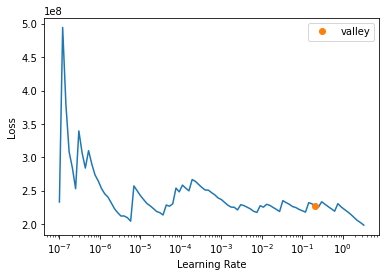

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
    actual  predicted
0 12243.00   13979.49
1  9560.00    9644.14
2  7861.00   10130.47
3  5400.00    7063.73
4 12209.00    9612.71
XGBoost RMSE:  4440.4253


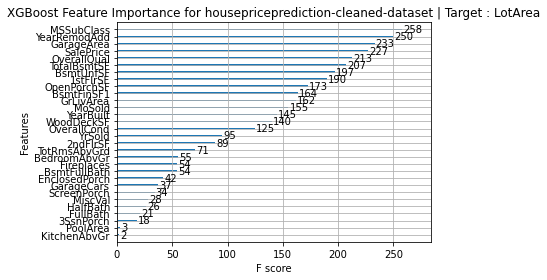

<Figure size 432x288 with 0 Axes>

In [15]:

if SEP_DOLLAR:
    #For every column in df, if the column contains a $, make a new column with the value without the $
    for col in df.columns:
        if '$' in df[col].to_string():
            df[col + '_no_dollar'] = df[col].str.replace('$', '').str.replace(',', '')


if SEP_PERCENT:
    #For every column in df, if the column contains a %, make a new column with the value without the %
    for col in df.columns:
        if '%' in df[col].to_string():
            df[col + '_no_percent'] = df[col].str.replace('%', '').str.replace(',', '')

target = ''
target_str = ''
#The column closest to the end isPARAM_DIR the target variable that can be represented as a float is the target variable
targets = []
#Loop through every possible target column (Continuous)
for i in range(len(df.columns)-1, 0, -1):
    try:
        df[df.columns[i]] = df[df.columns[i]].astype(float)
        target = df.columns[i]
        target_str = target.replace('/', '-')
    except:
        continue
    print(f'Target Variable: {target}')
    #Will be determined by the file name


    #===================================================================================================

    #Create project config files if they don't exist.
    if not os.path.exists(param_dir):
        #create param_dir
        os.makedirs(PARAM_DIR)
    if not os.path.exists(f'{PARAM_DIR}/cats.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/cats.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/conts.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/conts.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/cols_to_delete.txt'):
        with open(f'{PARAM_DIR}/cols_to_delete.txt', 'w') as f:
            f.write('')

    df = df.drop_duplicates()
    if SHUFFLE_DATA:
        df = df.sample(frac=1).reset_index(drop=True)

    # workaround for fastai/pytorch bug where bool is treated as object and thus erroring out.
    for n in df:
        if pd.api.types.is_bool_dtype(df[n]):
            df[n] = df[n].astype('uint8')

    with open(f'{PARAM_DIR}/cols_to_delete.txt', 'r') as f:
        cols_to_delete = f.read().splitlines()
    for col in cols_to_delete:
        try:
            del(df[col])
        except:
            pass
    #try to fill in missing values now, otherwise FastAI will do it for us later
    try:
        df = df.fillna(0)
    except:
        pass
    #print missing values
    #print(df.isna().sum().sort_values(ascending=False))
    #shrink df as much as possible
    df = df_shrink(df)


    #print types inside of df
    #print(df.dtypes)


    #Auto detect categorical and continuous variables
    #==============================================================================
    likely_cat = {}
    for var in df.columns:
        likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.05 #or some other threshold

    cats = [var for var in df.columns if likely_cat[var]]
    conts = [var for var in df.columns if not likely_cat[var]]

    #remove target from lists
    try:
        conts.remove(target)
        cats.remove(target)
    except:
        pass
    #Convert target to float
    df[target] = df[target].astype(float)

    print('CATS=====================')
    print(cats)
    print('CONTS=====================')
    print(conts)

    #Populate categorical and continuous lists
    #==============================================================================

    if VARIABLE_FILES == True:
        with open(f'{PARAM_DIR}/cats.txt', 'r') as f:
            cats = f.read().splitlines()

        with open(f'{PARAM_DIR}/conts.txt', 'r') as f:
            conts = f.read().splitlines()

    #==============================================================================

    #==============================================================================
    procs = [Categorify, FillMissing, Normalize]
    #print(df.describe().T)
    df = df[0:SAMPLE_COUNT]
    splits = RandomSplitter()(range_of(df))

    print((len(cats)) + len(conts))
    #conts = []

    #Convert cont variables to floats
    #==============================================================================

    #Convert cont variables to floats
    #==============================================================================

    for var in conts:
        try:
            df[var] = df[var].astype(float)
        except:
            print(f'Could not convert {var} to float.')
            pass

    #==============================================================================

    #Experimental logic to add columns one-by-one to find a breakpoint
    #==============================================================================
    if ENABLE_BREAKPOINT == True:
        temp_procs = [Categorify, FillMissing]
        print('Looping through continuous variables to find breakpoint')
        cont_list = []
        for cont in conts:
            focus_cont = cont
            cont_list.append(cont)
            #print(focus_cont)
            try:
                to = TabularPandas(df, procs=procs, cat_names=cats, cont_names=cont_list, y_names=target, y_block=RegressionBlock(), splits=splits)
                del(to)
            except:
                print('Error with ', focus_cont)
                #remove focus_cont from list
                cont_list.remove(focus_cont)
                #traceback.print_exc()
                continue
        #convert all continuous variables to floats
        for var in cont_list:
            try:
                df[var] = df[var].astype(float)
            except:
                print(f'Could not convert {var} to float.')
                cont_list.remove(var)
                if CONVERT_TO_CAT == True:
                    cats.append(var)
                pass
        print(f'Continuous variables that made the cut : {cont_list}')
        print(f'Categorical variables that made the cut : {cats}')
        #shrink df as much as possible
        df = df_shrink(df)
        #print(df.dtypes)

    #==============================================================================

    #Creating tabular object + quick preprocessing
    #==============================================================================
    to = None
    if REGRESSOR == True:
        try:
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
    else:
        try:
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)

    #print(dir(to))
    #print(to.xs)
    dls = to.dataloaders()
    print(f'Tabular Object size: {len(to)}')
    try:
        dls.one_batch()
    except:
        print(f'problem with getting one batch of {PROJECT_NAME}')
    #==============================================================================

    #Extracting train and test sets from tabular object
    #==============================================================================

    X_train, y_train = to.train.xs, to.train.ys.values.ravel()
    X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

    #Make sure target isn't in independent columns
    if target in X_train and target in X_test:
        del(X_train[target])
        del(X_test[target])
    #create dataframe from X_train and y_train
    #export tabular object to csv
    pd.DataFrame(X_train).to_csv(f'{PARAM_DIR}/X_train_{target_str}.csv', index=False)
    pd.DataFrame(X_test).to_csv(f'{PARAM_DIR}/X_test_{target_str}.csv', index=False)
    pd.DataFrame(y_train).to_csv(f'{PARAM_DIR}/y_train_{target_str}.csv', index=False)
    pd.DataFrame(y_test).to_csv(f'{PARAM_DIR}/y_test_{target_str}.csv', index=False)

    #==============================================================================

    #==============================================================================

    #Ready for model selection!

    if REGRESSOR == True:
        try:
            reg = LazyRegressor(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = reg.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            target_std = y_train.std()
            print(f'Target Standard Deviation: {target_std}')
            print(models)
            models['project'] = PROJECT_NAME
            models['target'] = target
            models['target_std'] = target_std
            #rename index of 
            models.to_csv(f'{PARAM_DIR}/regression_results_{target_str}.csv', mode='a', header=True, index=True)
        except:
            print('Issue during lazypredict analysis')
    else:
        #TODO: remove this
        try:
            clf = LazyClassifier(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            print(f'Target Standard Deviation: {y_train.std()}')
            print(models)
            models.to_csv(f'{PARAM_DIR}/classification_results.csv', mode='a', header=False)
        except:
            print('Issue during lazypredict analysis')

    model_name = 'tabnet'

    # FastAI + pre-trained TabNet
    #==============================================================================
    learn = None
    i = 0
    while True:
        try:
            del learn
        except:
            pass
        try:
            learn = 0
            model = TabNetModel(get_emb_sz(to), len(to.cont_names), dls.c, n_d=64, n_a=64, n_steps=5, virtual_batch_size=256)
            # save the best model so far, determined by early stopping
            cbs = [SaveModelCallback(monitor='_rmse', comp=np.less, fname=f'{model_name}_{PROJECT_NAME}_{target_str}_best'), EarlyStoppingCallback()]
            learn = Learner(dls, model, loss_func=MSELossFlat(), metrics=rmse, cbs=cbs)
            #learn = get_learner(to)
            if(learn != 0):
                break
            if i > 50:
                break
        except:
            i += 1
            print('Error in FastAI TabNet')
            traceback.print_exc()
            continue
    try:
        #display learning rate finder results
        x = learn.lr_find()
    except:
        pass
    if AUTO_ADJUST_LEARNING_RATE == True:
        FASTAI_LEARNING_RATE = x.valley
    print(f'LEARNING RATE: {FASTAI_LEARNING_RATE}')
    try:
        if i < 50:
            learn.fit_one_cycle(20, FASTAI_LEARNING_RATE)
            plt.figure(figsize=(10, 10))
            try:
                ax = learn.show_results()
                plt.show(block=True)
            except:
                print('Could not show results')
                pass
    except:
        print('Could not fit model')
        traceback.print_exc()
        pass

    #==============================================================================

    #fit an xgboost model
    #==============================================================================
    if REGRESSOR == True:
        xgb = XGBRegressor()
    else:
        xgb = XGBClassifier()
    try:
        xgb = XGBRegressor()
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        print('XGBoost Predictions vs Actual==========')
        print(pd.DataFrame({'actual': y_test, 'predicted': y_pred}).head())
        print('XGBoost RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
        #save feature importance plot to file
        plot_importance(xgb)
        plt.title(f'XGBoost Feature Importance for {PROJECT_NAME} | Target : {target}', wrap=True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.png')
        fi_df = pd.DataFrame([xgb.get_booster().get_score()]).T
        fi_df.columns = ['importance']
        #create a column based off the index called feature
        fi_df['feature'] = fi_df.index
        #create a dataframe of feature importance
        fi_df = fi_df[['feature', 'importance']]
        fi_df.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv', index=False)
        #xgb_fi = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['importance'])
        #xgb_fi.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv')
        #print('XGBoost AUC: ', roc_auc_score(y_test, y_pred))
    except:
        traceback.print_exc()
        print('XGBoost failed')

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Overall Feature Importance**</div>

         feature  importance
0      SalePrice         259
1   YearRemodAdd         311
2    OverallCond         194
3  EnclosedPorch          82
4     GarageArea         194


<AxesSubplot:title={'center':'XGBoost Overall Feature Importance'}, xlabel='feature'>

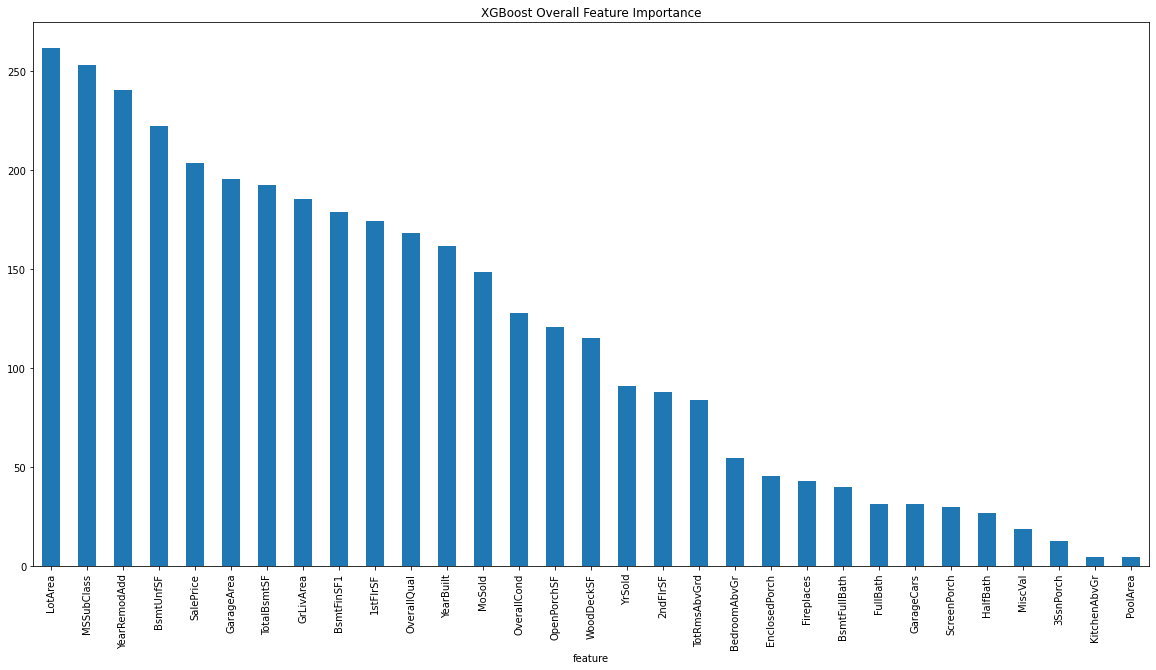

In [16]:
out_dir = f'./{PROJECT_NAME}'
xgb_feature_importance_csvs = []

for file in os.listdir(out_dir):
    if 'xgb_feature_importance' in file and '.csv' in file:
        xgb_feature_importance_csvs.append(pd.read_csv(os.path.join(out_dir, file)))

xgb_feature_importance = pd.concat(xgb_feature_importance_csvs,axis=0)
xgb_feature_importance.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)
print(xgb_feature_importance.head())
xgb_feature_importance.groupby('feature')['importance'].mean().sort_values(ascending=False).plot(kind='bar', title='XGBoost Overall Feature Importance', figsize=(20, 10))

In [17]:
df.isna().sum()

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

# **To Be Continued...**